In [5]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

from fastf1 import utils
from matplotlib import pyplot as plt

# FORMULA 1 QATAR AIRWAYS QATAR GRAND PRIX 2025
The Qatar Grand Prix (Arabic: جائزة قطر الكبرى) is a Formula One motor racing event which is held in Qatar. It was held for the first time on 21 November as part of the 2021 championship at the Lusail International Circuit, and after not taking place during the 2022 season due to the 2022 FIFA World Cup taking place in Qatar, it rejoined the calendar in 2023 under a 10-year contract. The race was established as the fourth full-night race (as opposed to day or day-to-night races) on the Formula One calendar, following the Singapore, Bahrain and Sakhir Grands Prix.
Source: Wikipedia
Analyzed by Franccy del Piero Sambrano Ganoza

## Obtain session information

In [6]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='QAT')

meeting_key  session_key location                 date_start  \
0         1275         9840   Lusail  2025-11-28T13:30:00+00:00   

                    date_end session_type session_name  country_key  \
0  2025-11-28T14:30:00+00:00     Practice   Practice 1          149   

  country_code country_name  circuit_key circuit_short_name gmt_offset  year  
0          QAT        Qatar          150             Lusail   03:00:00  2025

core           INFO 	Loading data for Qatar Grand Prix - Practice 1 [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver  2: Position data is incomplete!
_api        WARNING 	Driver  3: Position data is incomplete!

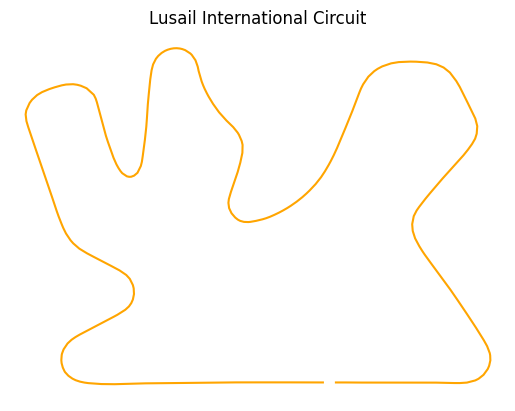

In [102]:
session = ff1.get_session(2025,23, 'FP1')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()
libraryDataF1.draw_track(circuit_info,pos,"Lusail International Circuit")

## Free Practice 1
### Obtain setup

In [7]:
practice = libraryDataF1.obtain_information('laps',session_key=9840)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9840)
drivers = libraryDataF1.obtain_information('drivers',session_key=9840)

In [8]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

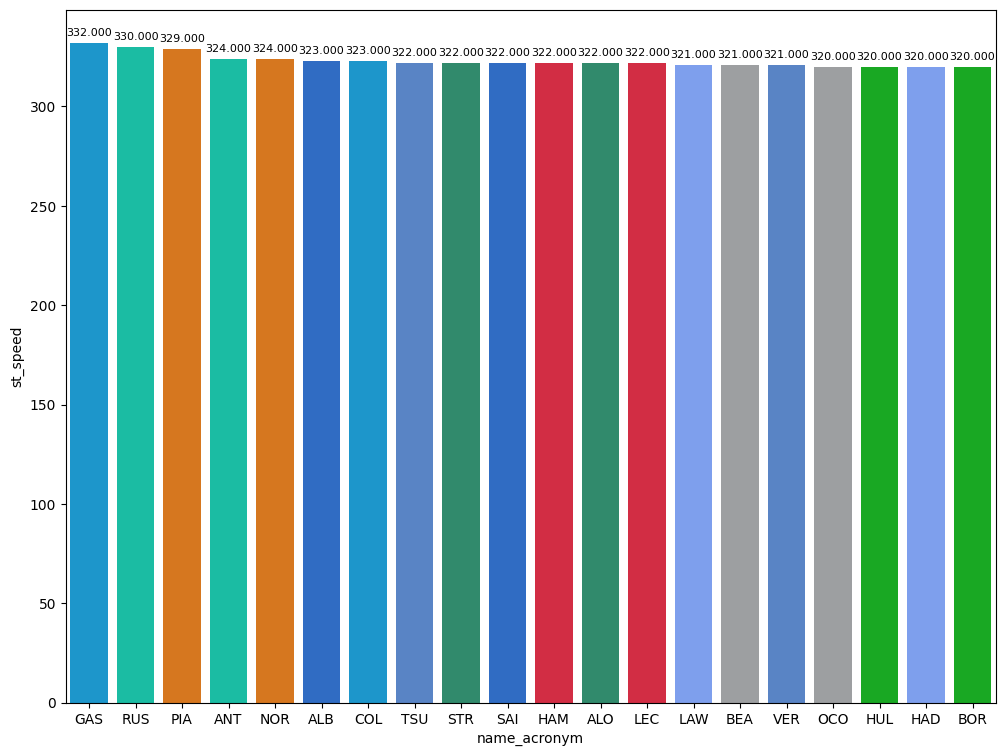

In [9]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

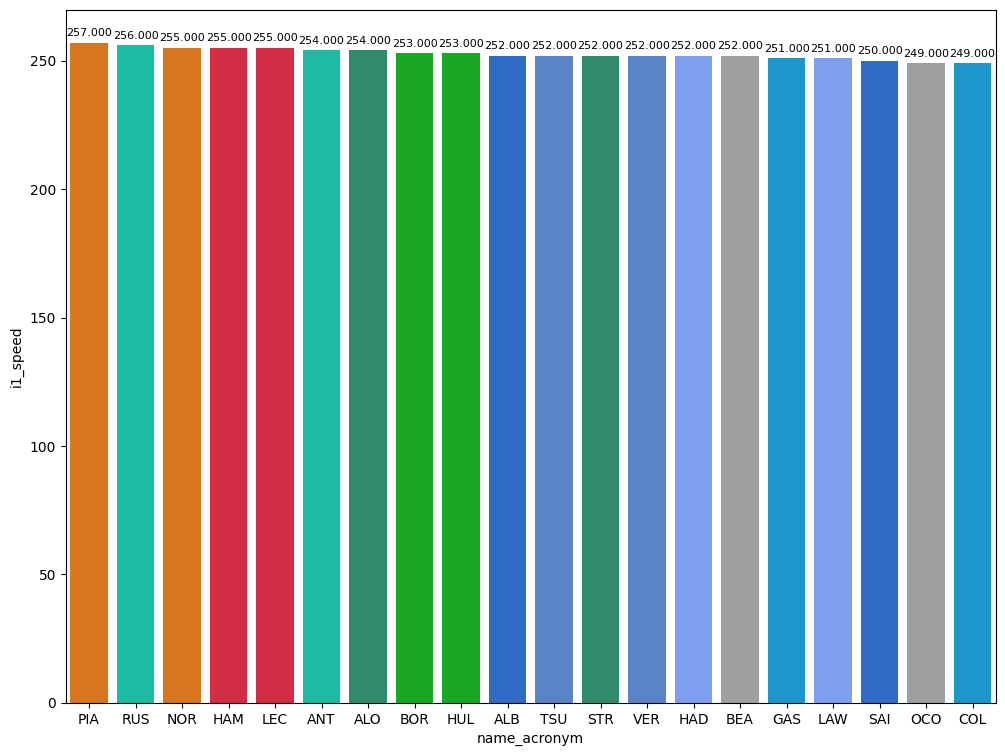

In [10]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

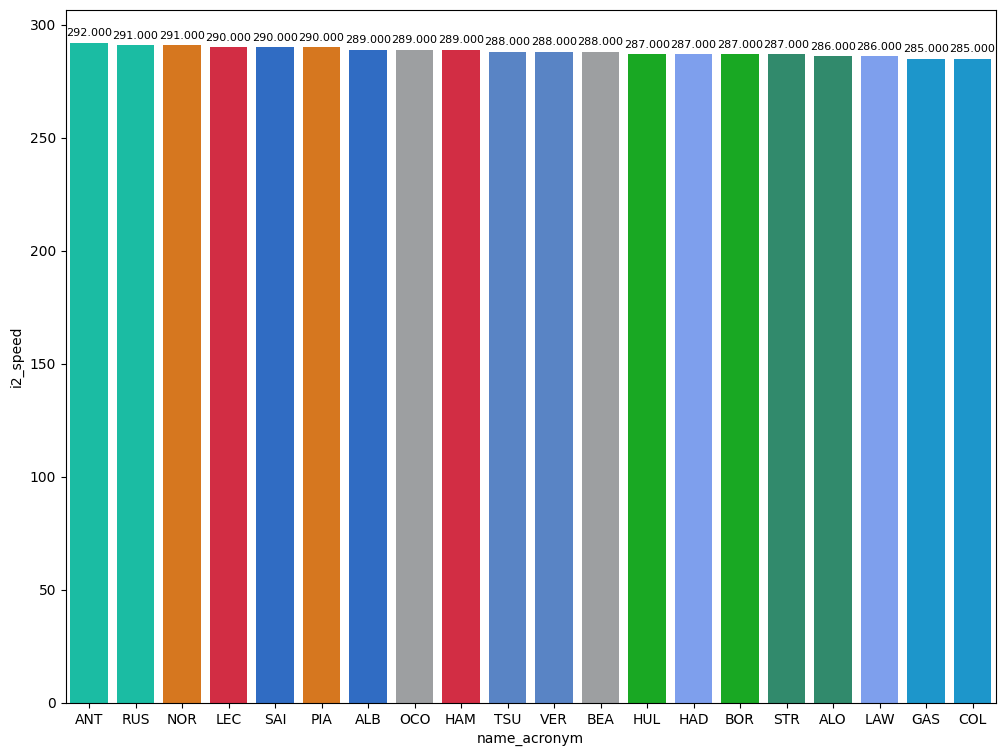

In [11]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [12]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
174  George RUSSELL     HARD             29.963             28.218   
468   Oscar PIASTRI     SOFT             29.577             27.697   

     duration_sector_3  lap_duration  
174             23.984        82.165  
468             23.650        80.924

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.
Track evolution is quite high and it seems that two attemps are possible but it is important to take care of the gravel trap. McLaren and WIlliams seem that they are competitive. Mercedes, Ferrari and Alpine could suffer here.

In [13]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


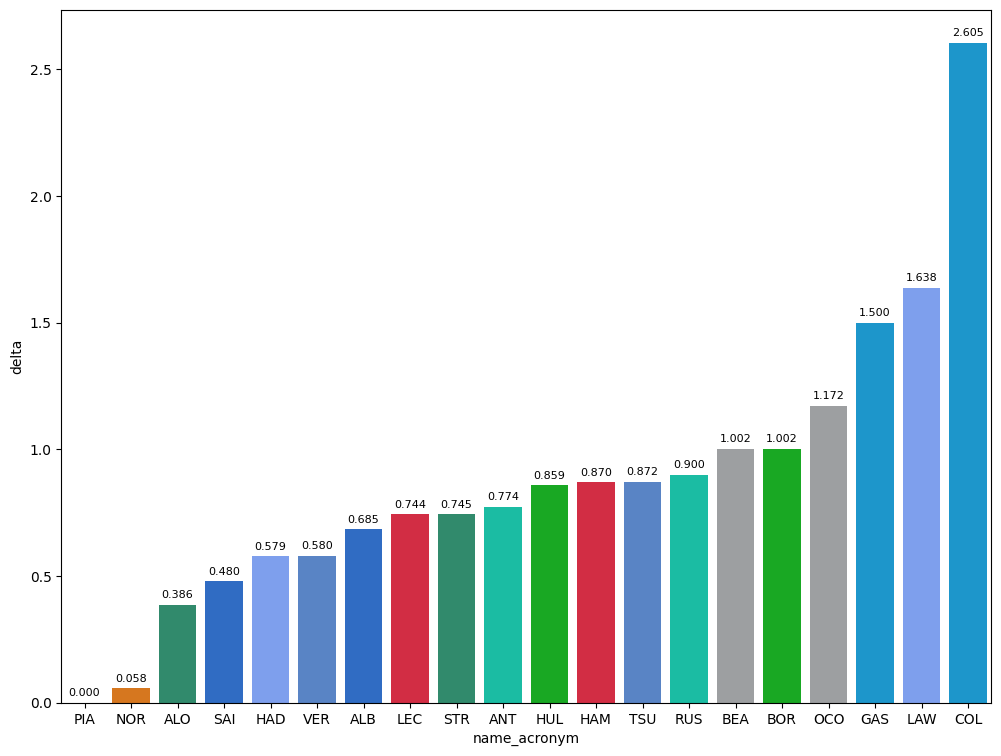

In [14]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.
S1:McLaren is quick here and Sauber has to take advantage of this sector. Even though Max made one attemp, his sector is not fast.
S2: Williams stand out in this sector, followed by McLaren and Sauber. Red Bull, Mercedes and Ferrari's pace is very poor
S3:McLaren dominated here and Aston is very competitive. Sauber lost all the advantage and Williams is in the midfield, maybe due to they push in the second sector. Red Bull's performance is good and this indicates that they doesn't suffer for tyre degradation.

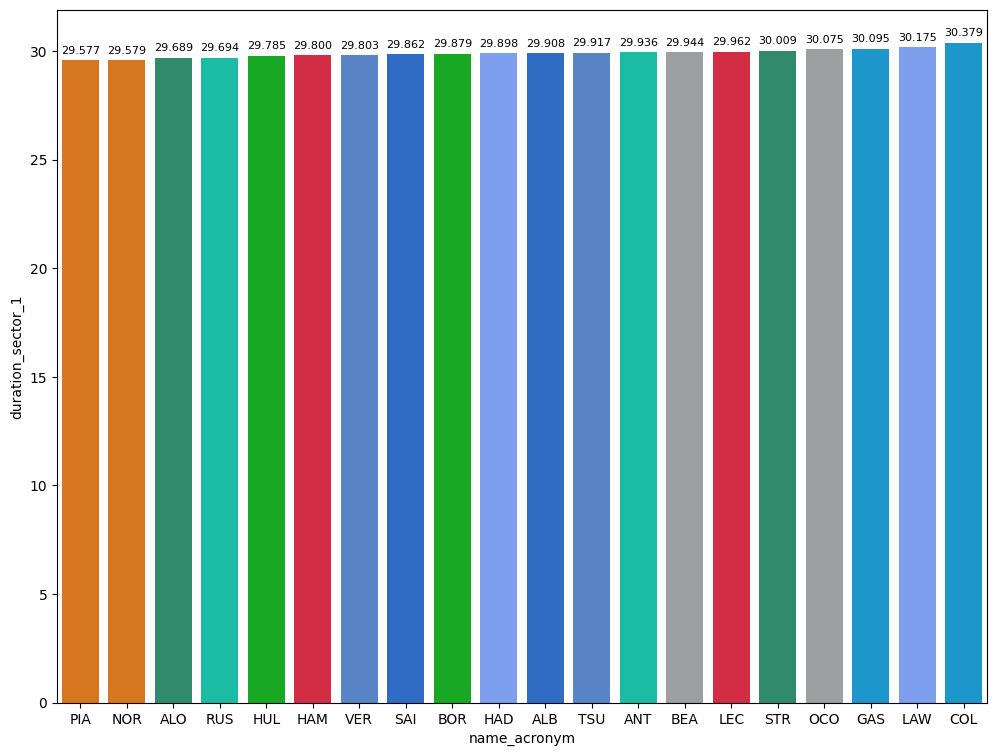

In [15]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

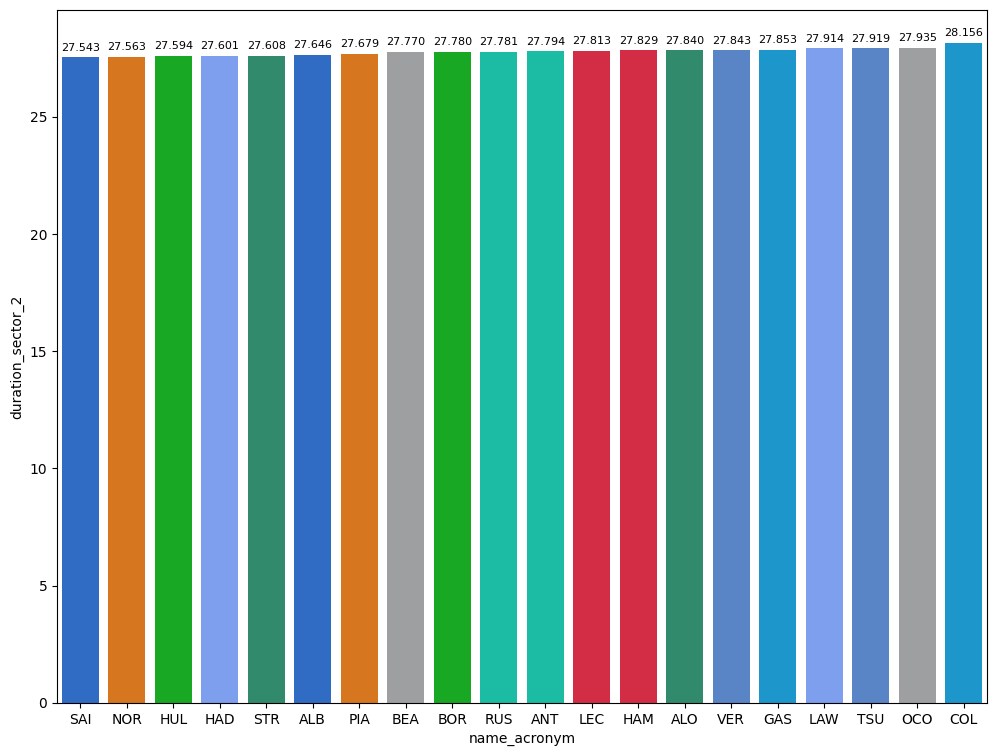

In [16]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

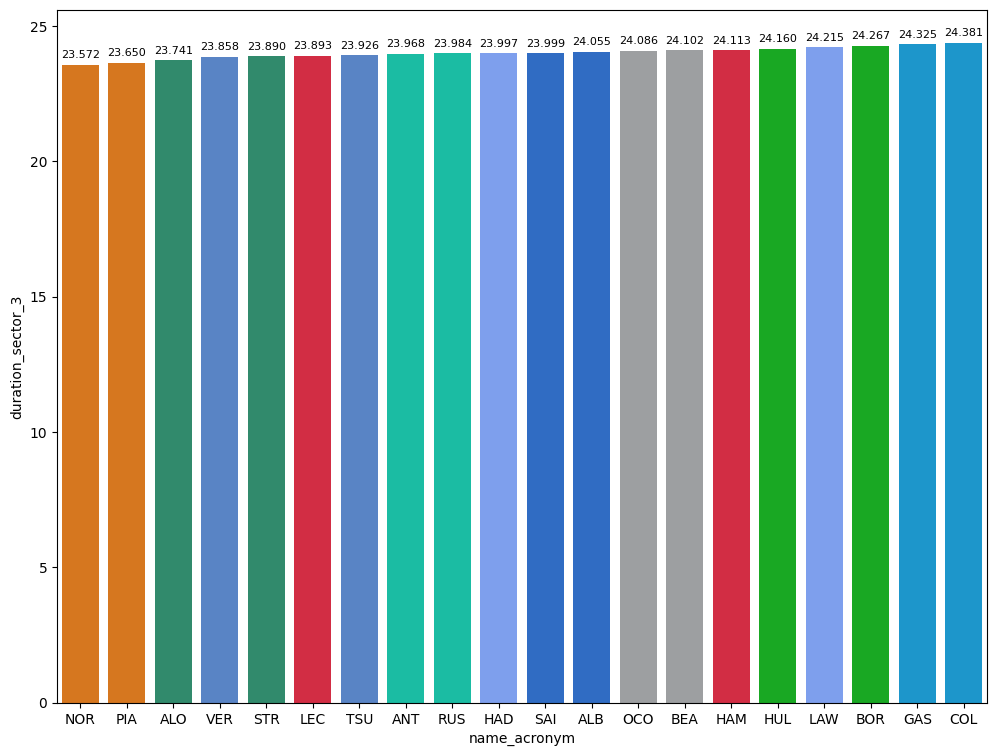

In [17]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [18]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 85 and lap_duration <=88").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         85.807000
HARD         85.843427

### Long runs

In [19]:
MINIMUN_SECONDS = 85
MAXIMUM_SECONDS = 88

#### Red Bull Racing

In [20]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
16         1275         9840             1              1          1       10   
21         1275         9840             1             22          1       12   
43         1275         9840             2              1         11       21   
53         1275         9840             2             22         13       21   
60         1275         9840             3              1         22       24   
67         1275         9840             4              1         25       27   
76         1275         9840             3             22         22       28   

   compound  tyre_age_at_start  
16     HARD                  0  
21     HARD                  0  
43     HARD                 10  
53     HARD                 12  
60     SOFT                  0  
67     SOFT                  0  
76     SOFT                  0

In [21]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
23   Max VERSTAPPEN     HARD  2025-11-28T13:32:15.939000+00:00           2   
242  Max VERSTAPPEN     HARD  2025-11-28T13:58:07.652000+00:00          12   
253  Max VERSTAPPEN     HARD  2025-11-28T13:59:34.244000+00:00          13   
268  Max VERSTAPPEN     HARD  2025-11-28T14:01:00.594000+00:00          14   
283  Max VERSTAPPEN     HARD  2025-11-28T14:02:26.730000+00:00          15   
300  Max VERSTAPPEN     HARD  2025-11-28T14:03:52.527000+00:00          16   
318  Max VERSTAPPEN     HARD  2025-11-28T14:05:17.512000+00:00          17   
334  Max VERSTAPPEN     HARD  2025-11-28T14:06:42.606000+00:00          18   
362  Max VERSTAPPEN     HARD  2025-11-28T14:09:32.790000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
23              31.355             28.800             24.892        85.047  
242             31.817             29.391             25.302        86.510  
253             31.797             29.355             25.144        86.296  
268             31.658             29.378             25.195        86.231  
283             31.446             29.253             25.108        85.807  
300             31.222             29.175             24.636        85.033  
318             31.169             29.118             24.720        85.007  
334             31.283             29.310             24.754        85.347  
362             31.376             29.399             24.516        85.291

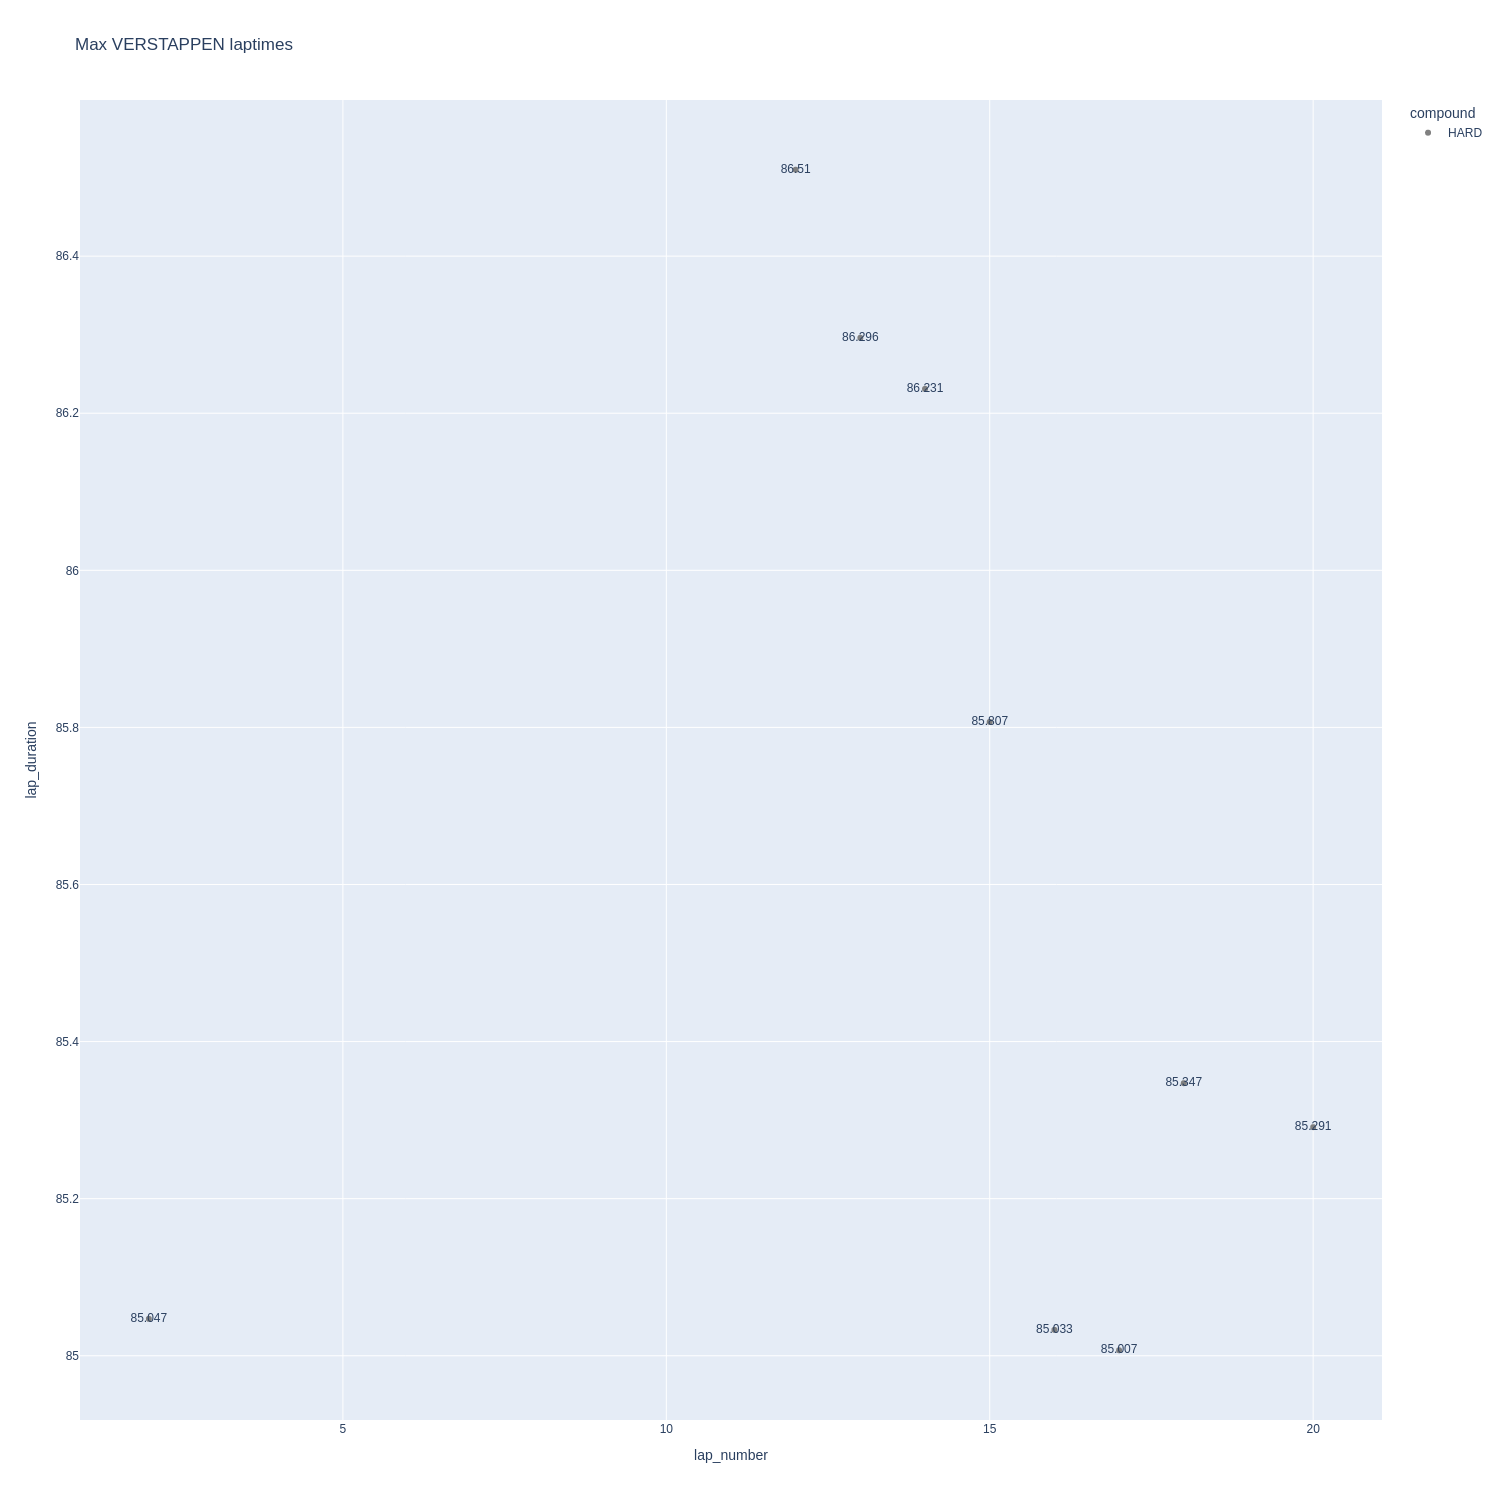

In [22]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

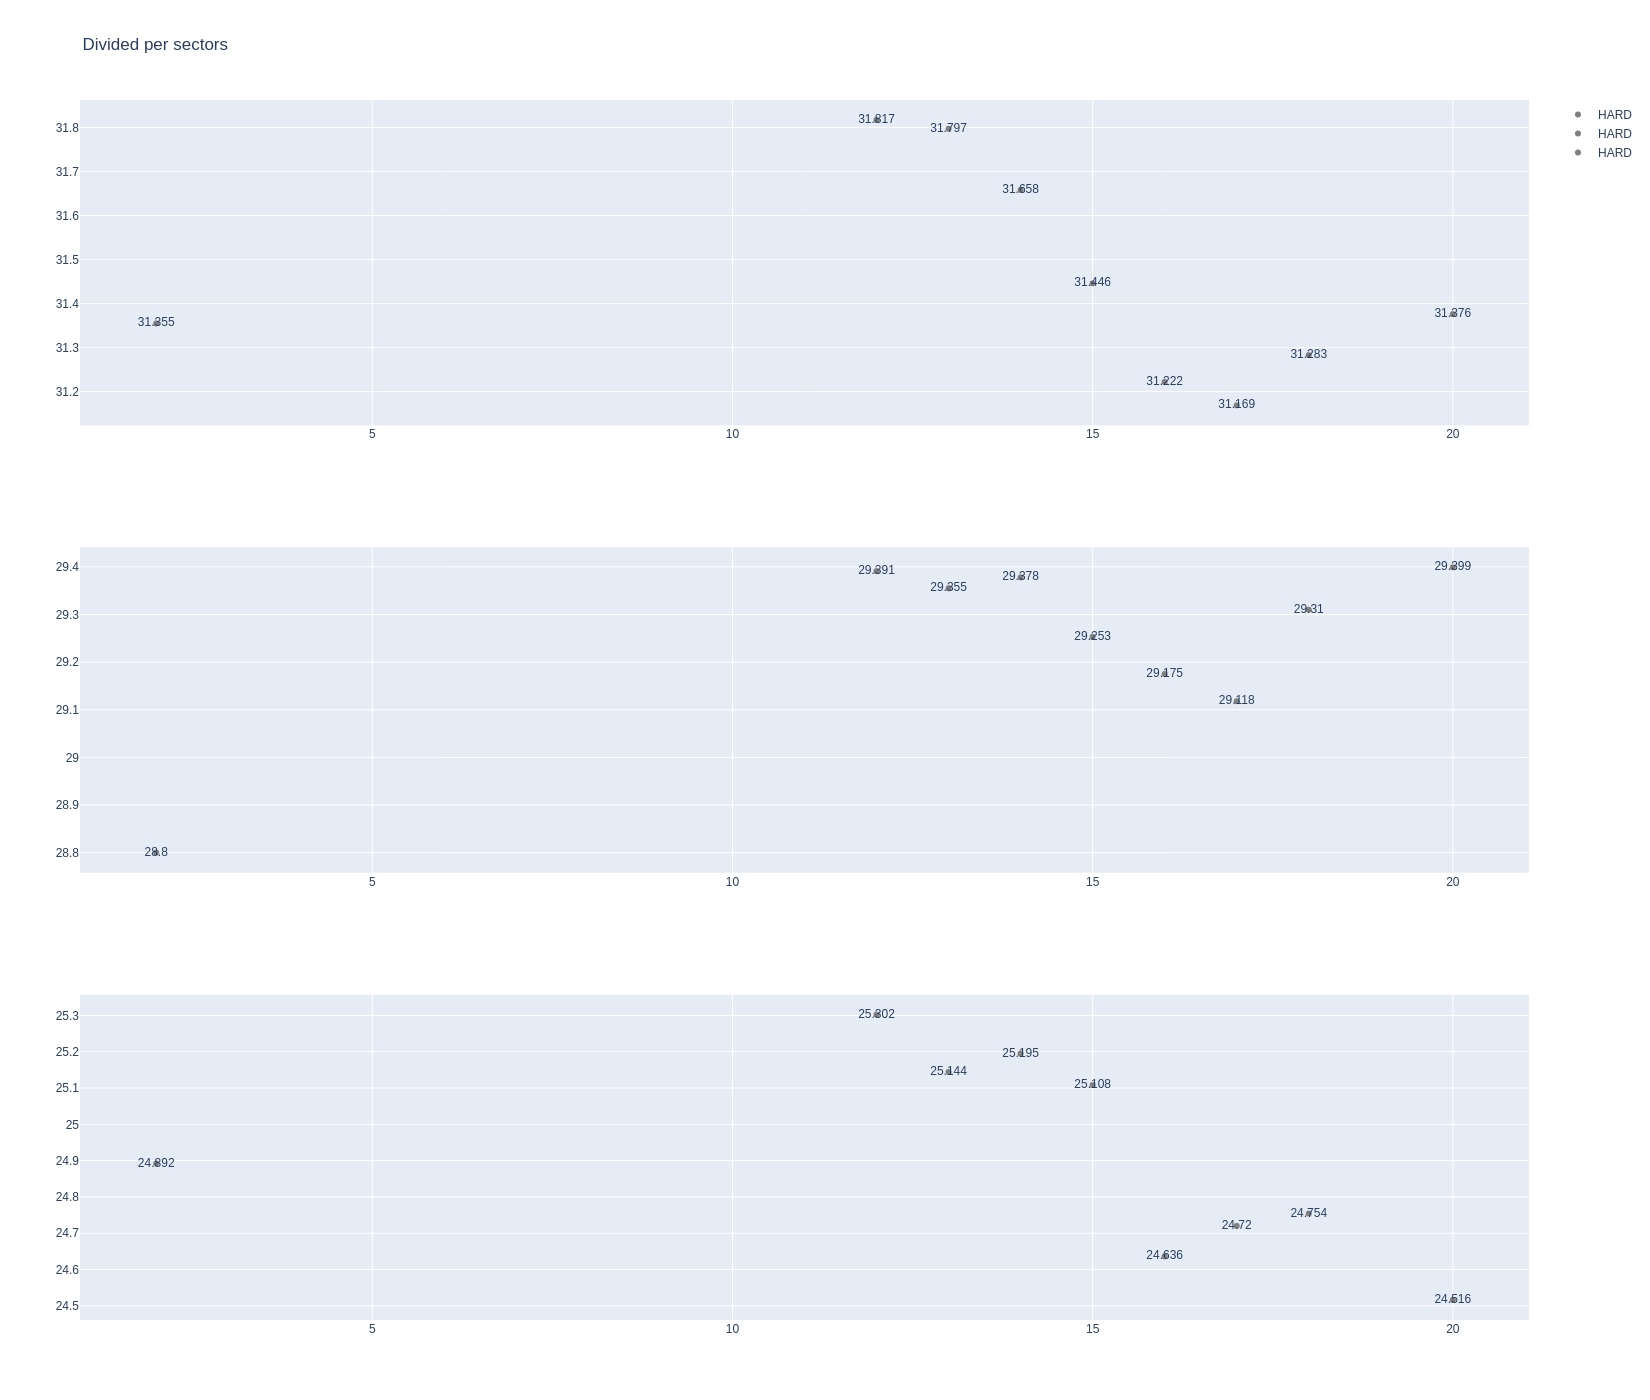

In [23]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [24]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
26   Yuki TSUNODA     HARD  2025-11-28T13:32:40.379000+00:00           2   
137  Yuki TSUNODA     HARD  2025-11-28T13:42:29.544000+00:00           7   
272  Yuki TSUNODA     HARD  2025-11-28T14:01:24.391000+00:00          14   
285  Yuki TSUNODA     HARD  2025-11-28T14:02:52.355000+00:00          15   
303  Yuki TSUNODA     HARD  2025-11-28T14:04:19.152000+00:00          16   
320  Yuki TSUNODA     HARD  2025-11-28T14:05:45.637000+00:00          17   
336  Yuki TSUNODA     HARD  2025-11-28T14:07:11.781000+00:00          18   
352  Yuki TSUNODA     HARD  2025-11-28T14:08:37.816000+00:00          19   
365  Yuki TSUNODA     HARD  2025-11-28T14:10:03.399000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
26              31.684             29.022             25.161        85.867  
137             30.656             29.374             24.993        85.023  
272             32.356             29.833             25.793        87.982  
285             31.856             29.517             25.527        86.900  
303             31.929             29.292             25.121        86.342  
320             31.752             29.321             25.177        86.250  
336             31.733             29.294             24.960        85.987  
352             31.535             29.212             24.859        85.606  
365             31.615             29.082             24.853        85.550

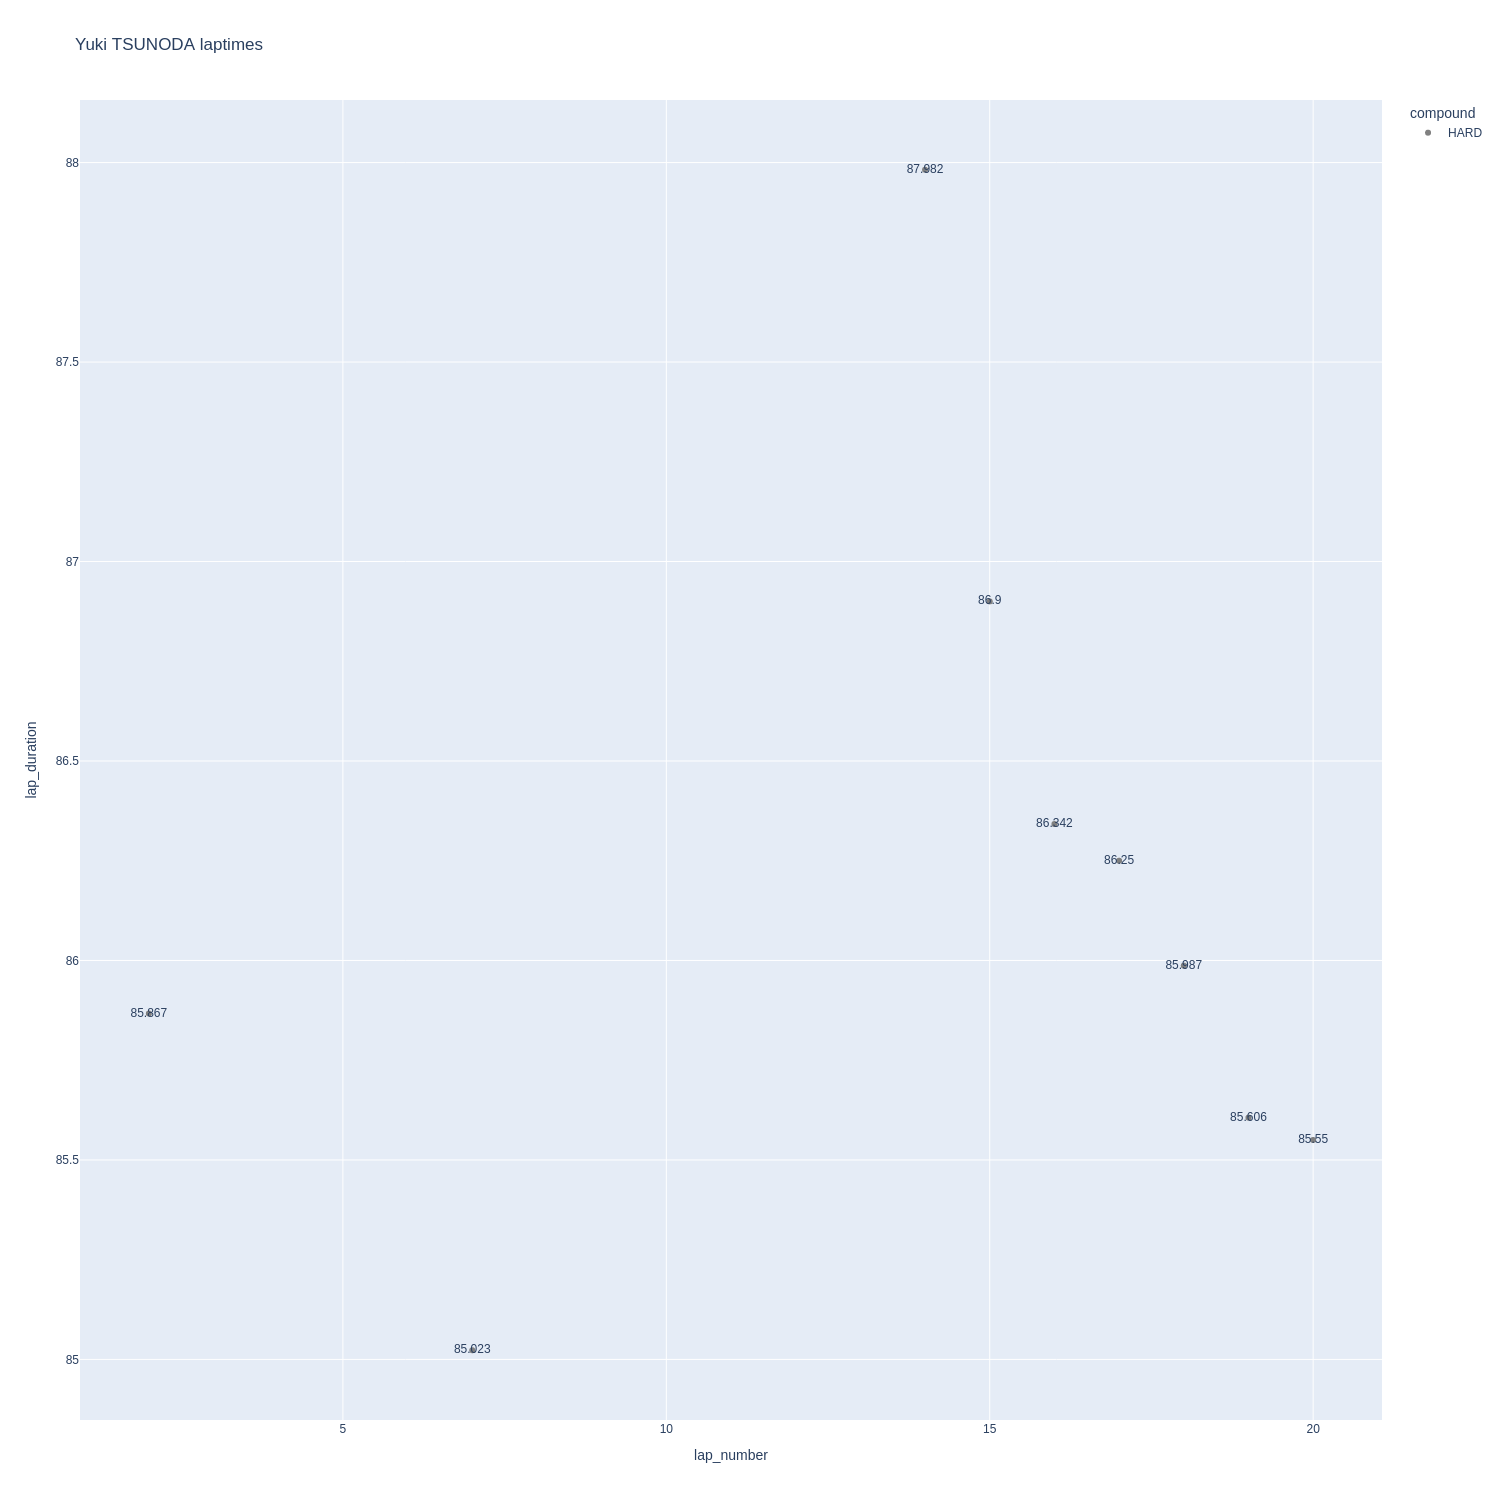

In [25]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

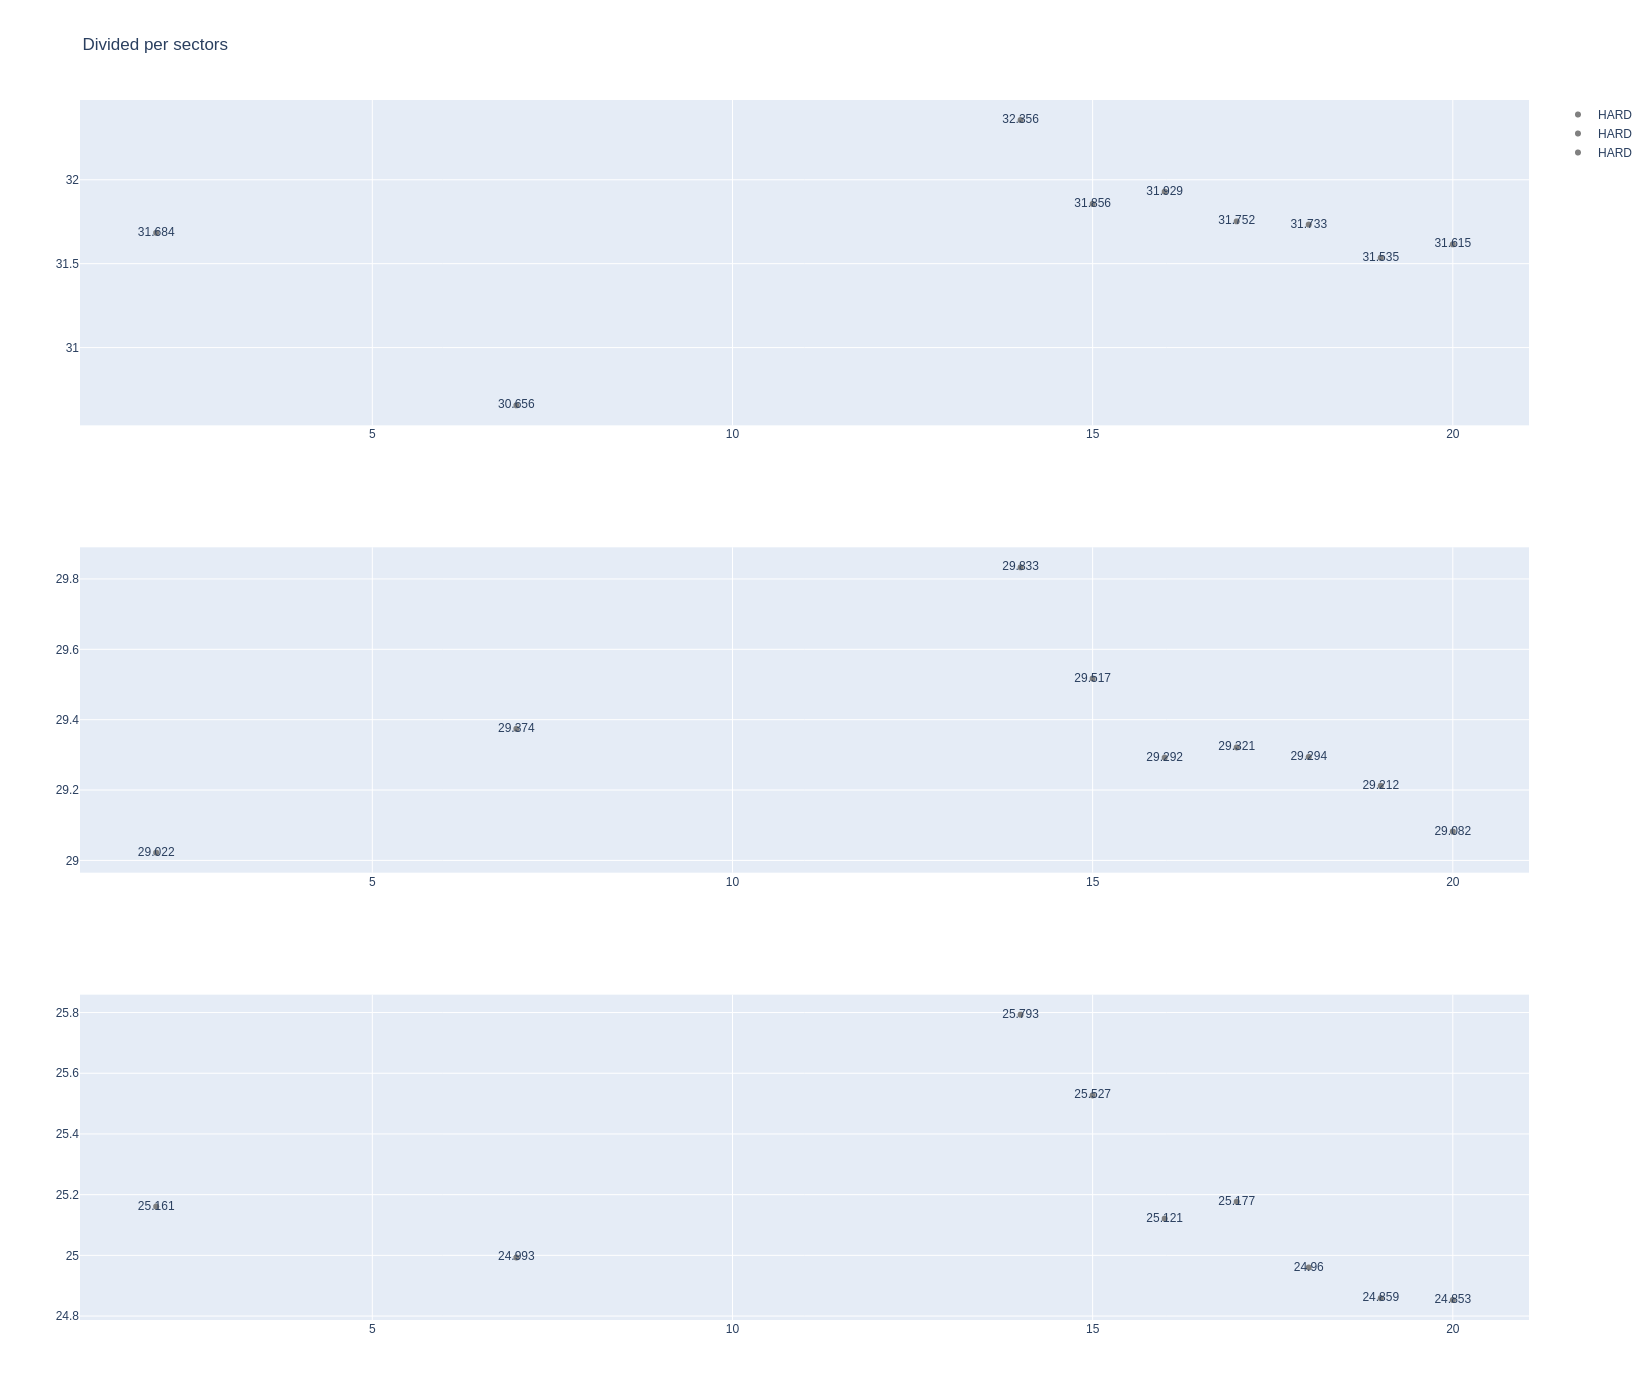

In [26]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [27]:
stintInformation.query('driver_number == 44 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1275         9840             1             44          1        3   
7          1275         9840             1             16          1       10   
22         1275         9840             2             44          4       11   
25         1275         9840             2             16         11       15   
28         1275         9840             3             44         12       15   
46         1275         9840             3             16         16       23   
52         1275         9840             4             44         16       21   
77         1275         9840             4             16         24       31   
78         1275         9840             5             44         22       28   

   compound  tyre_age_at_start  
0      HARD                  0  
7      HARD                  0  
22     HARD                  3  
25     HARD                 10  
28     HARD                 11  
46     HARD                 15  
52     HARD                 15  
77     SOFT                  0  
78     SOFT                  0

In [28]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
210  Charles LECLERC     HARD  2025-11-28T13:53:36.015000+00:00          13   
333  Charles LECLERC     HARD  2025-11-28T14:06:40.575000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
210             30.347              29.48             26.226        86.053  
333             30.274              28.40             26.461        85.135

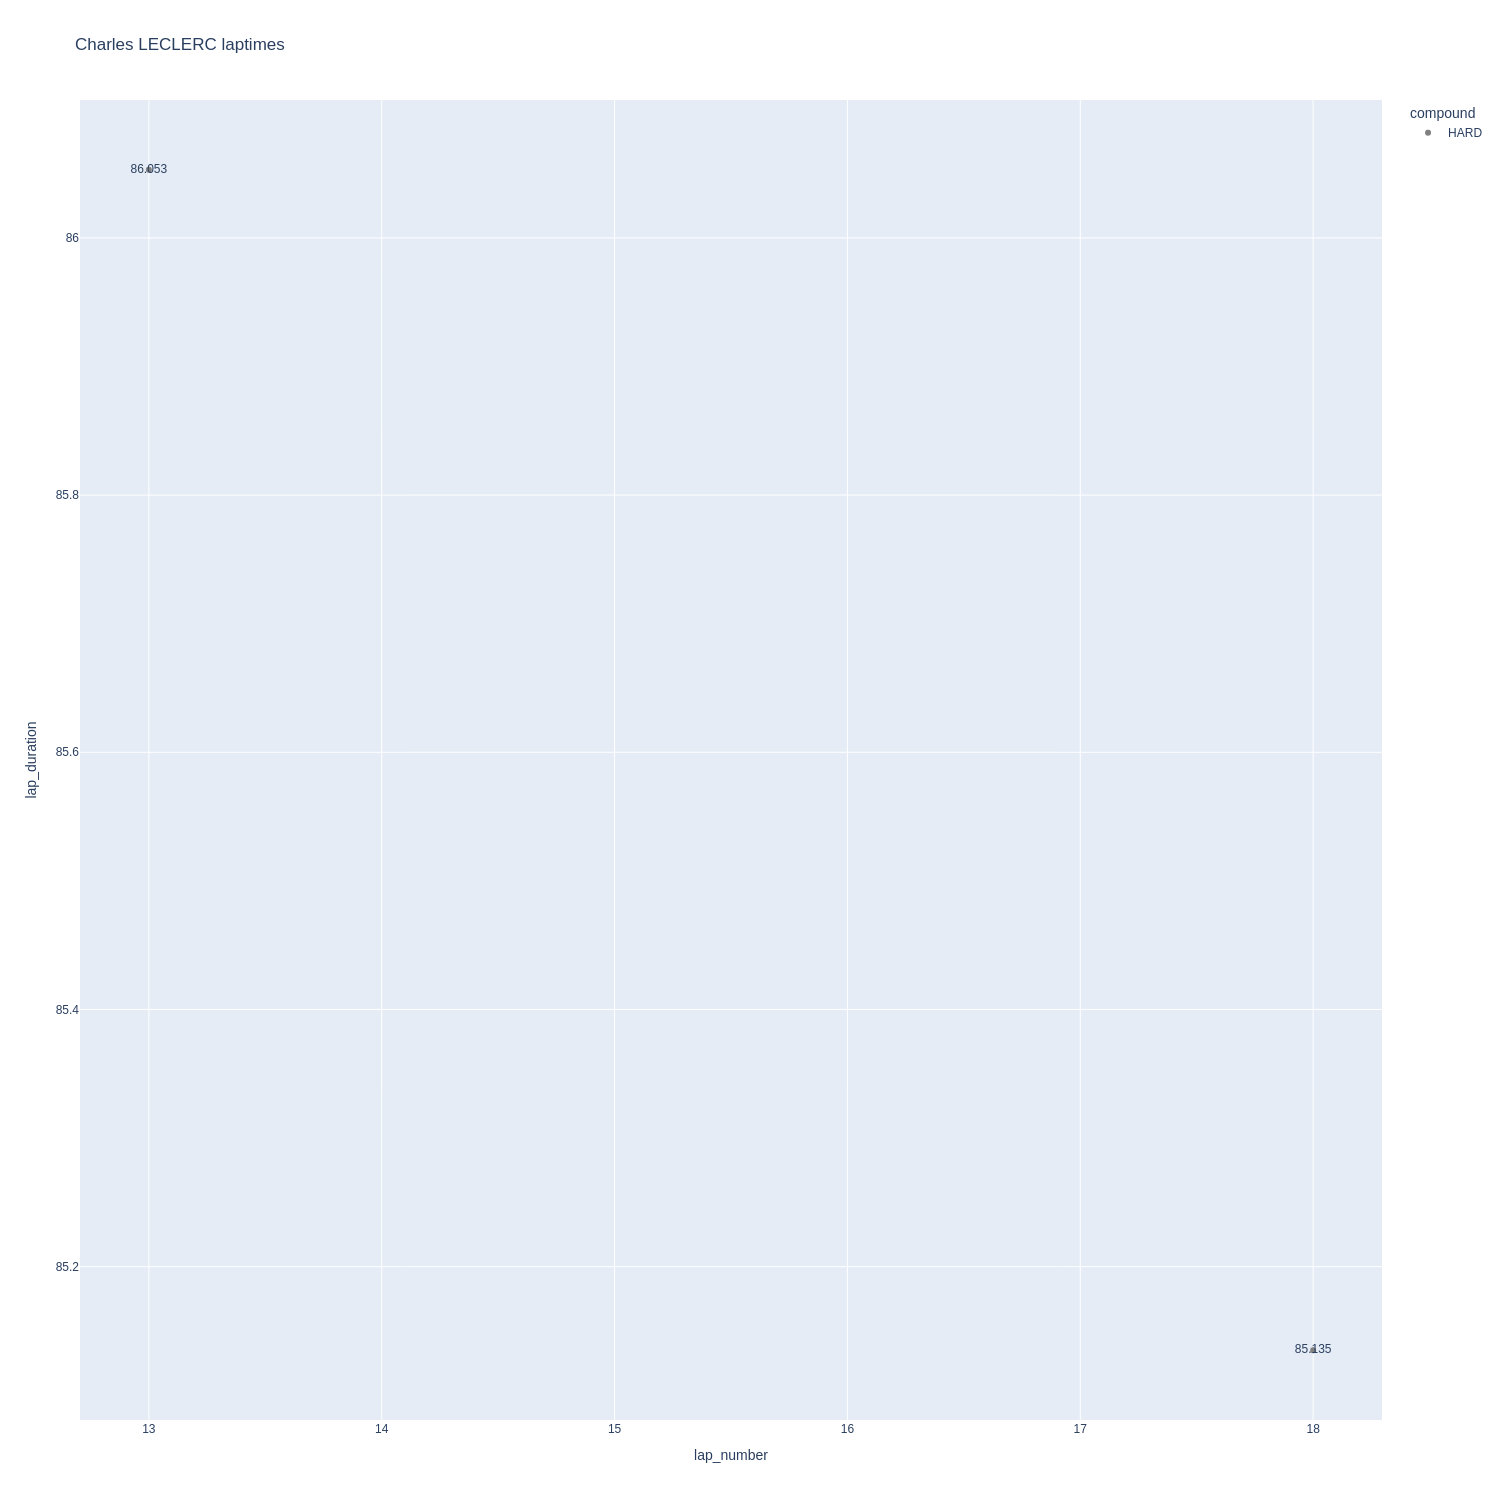

In [29]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

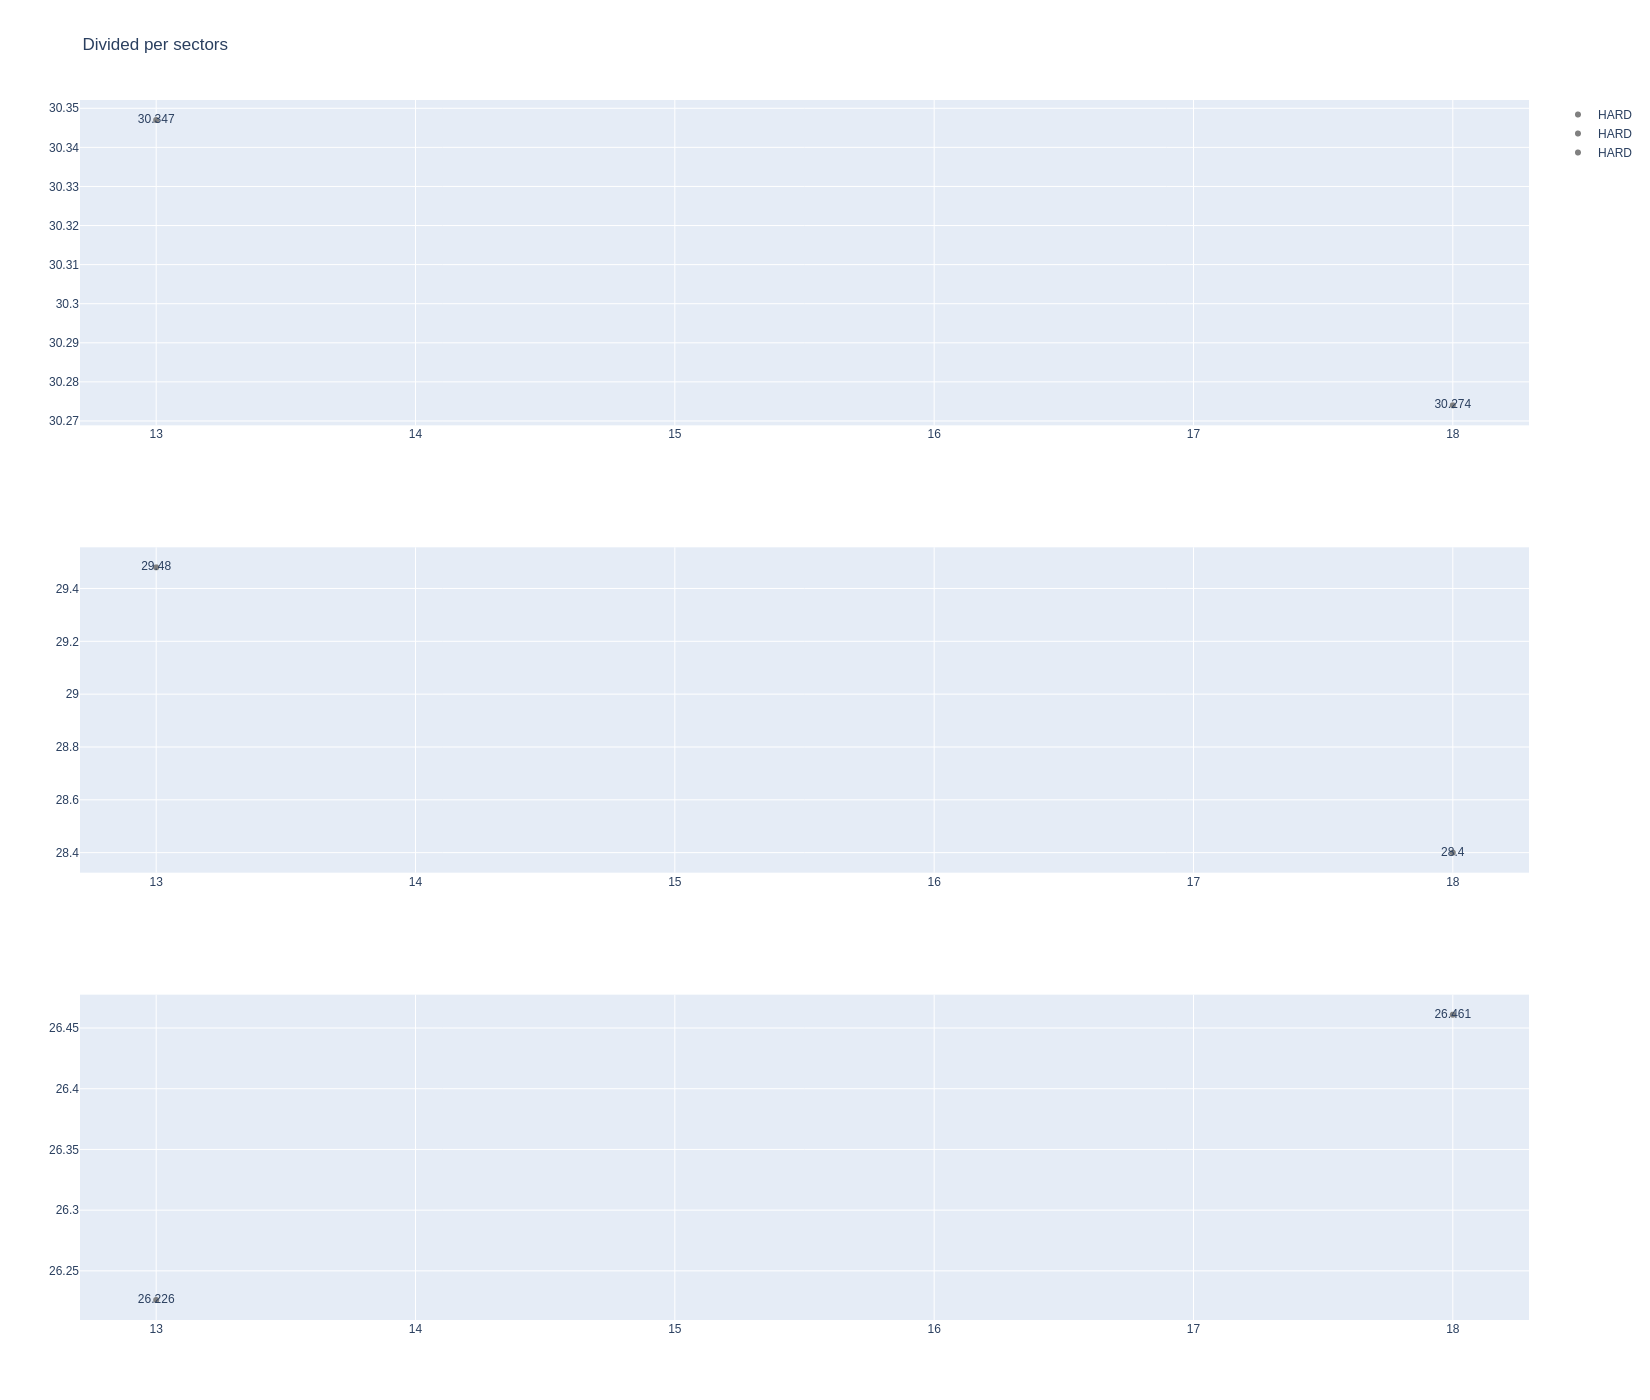

In [30]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [31]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
30  Lewis HAMILTON     HARD  2025-11-28T13:33:06.232000+00:00           2   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
30             31.968             29.164             25.284        86.416

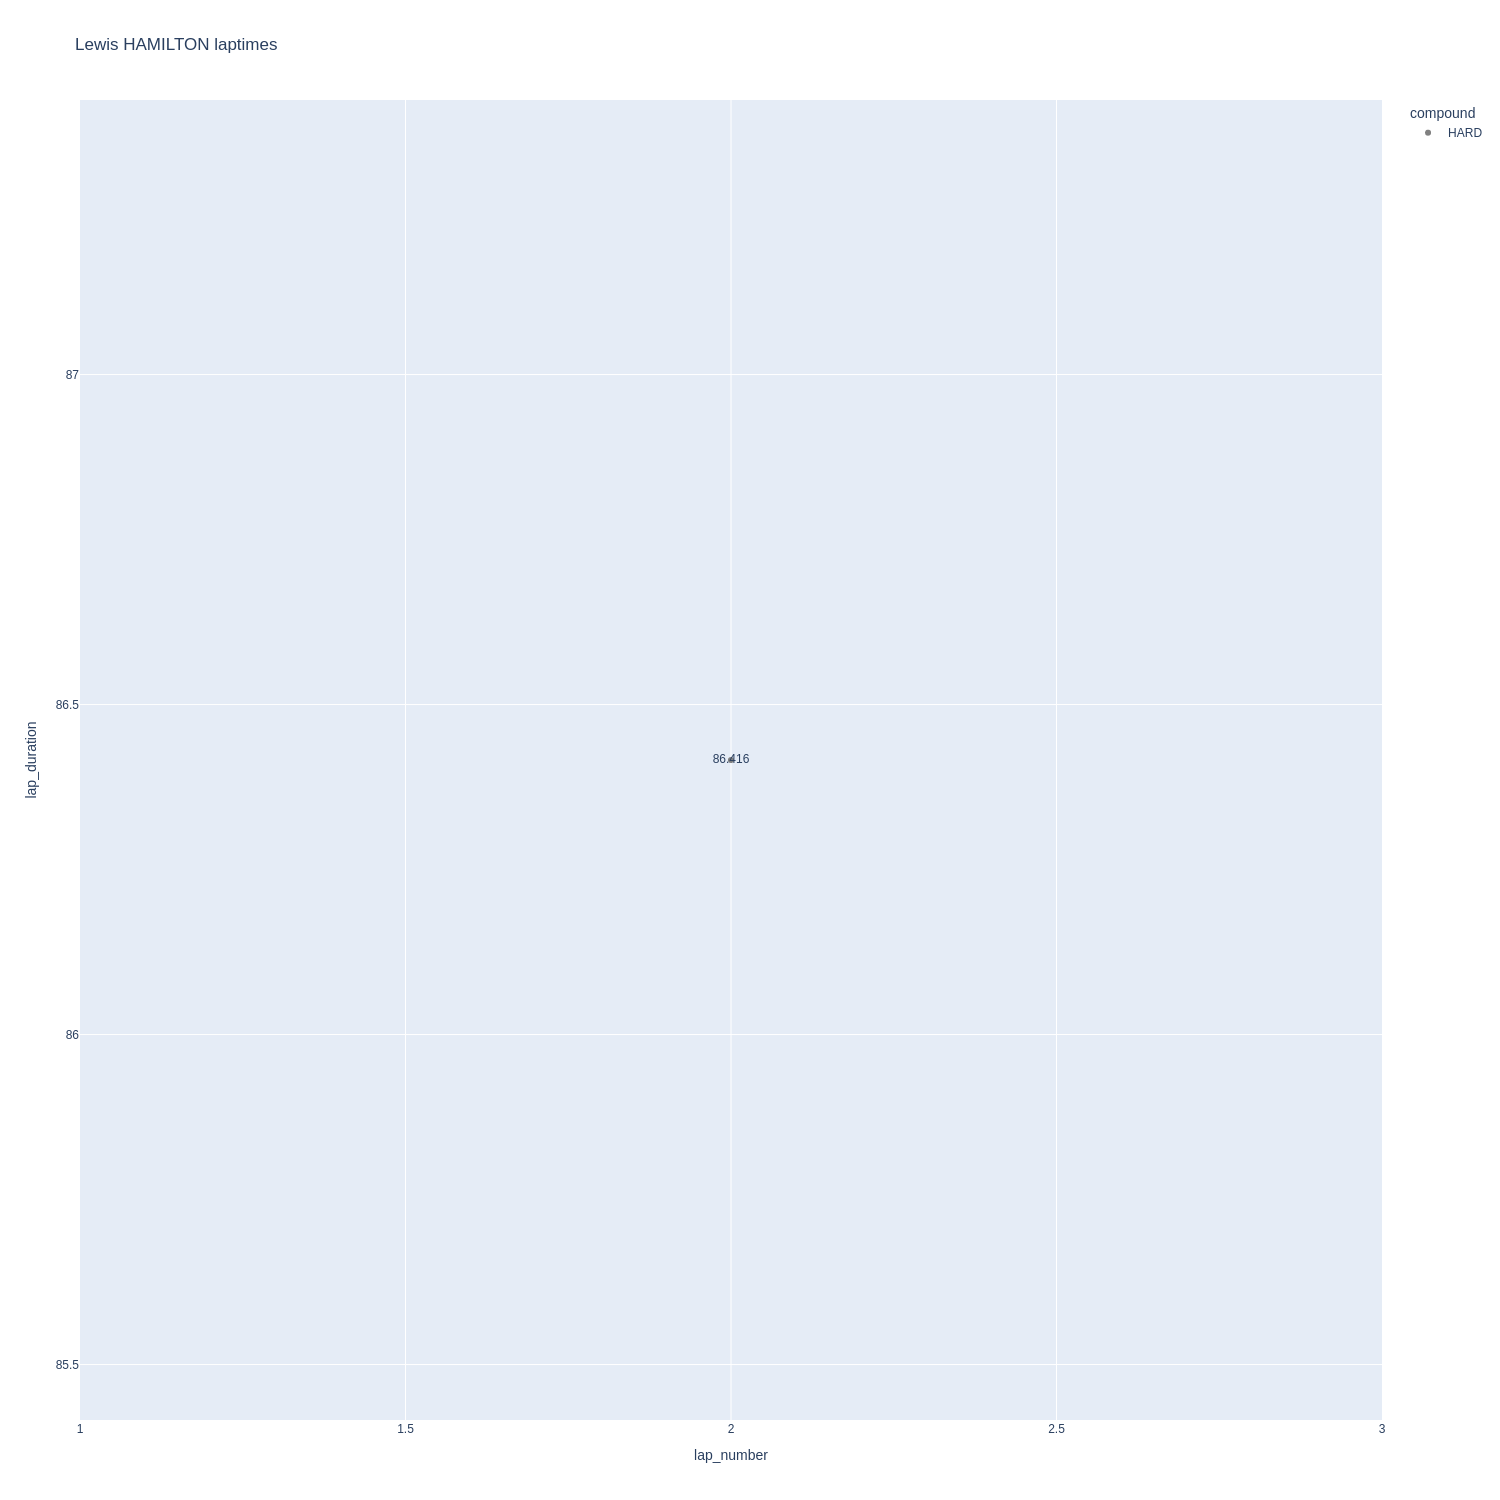

In [32]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

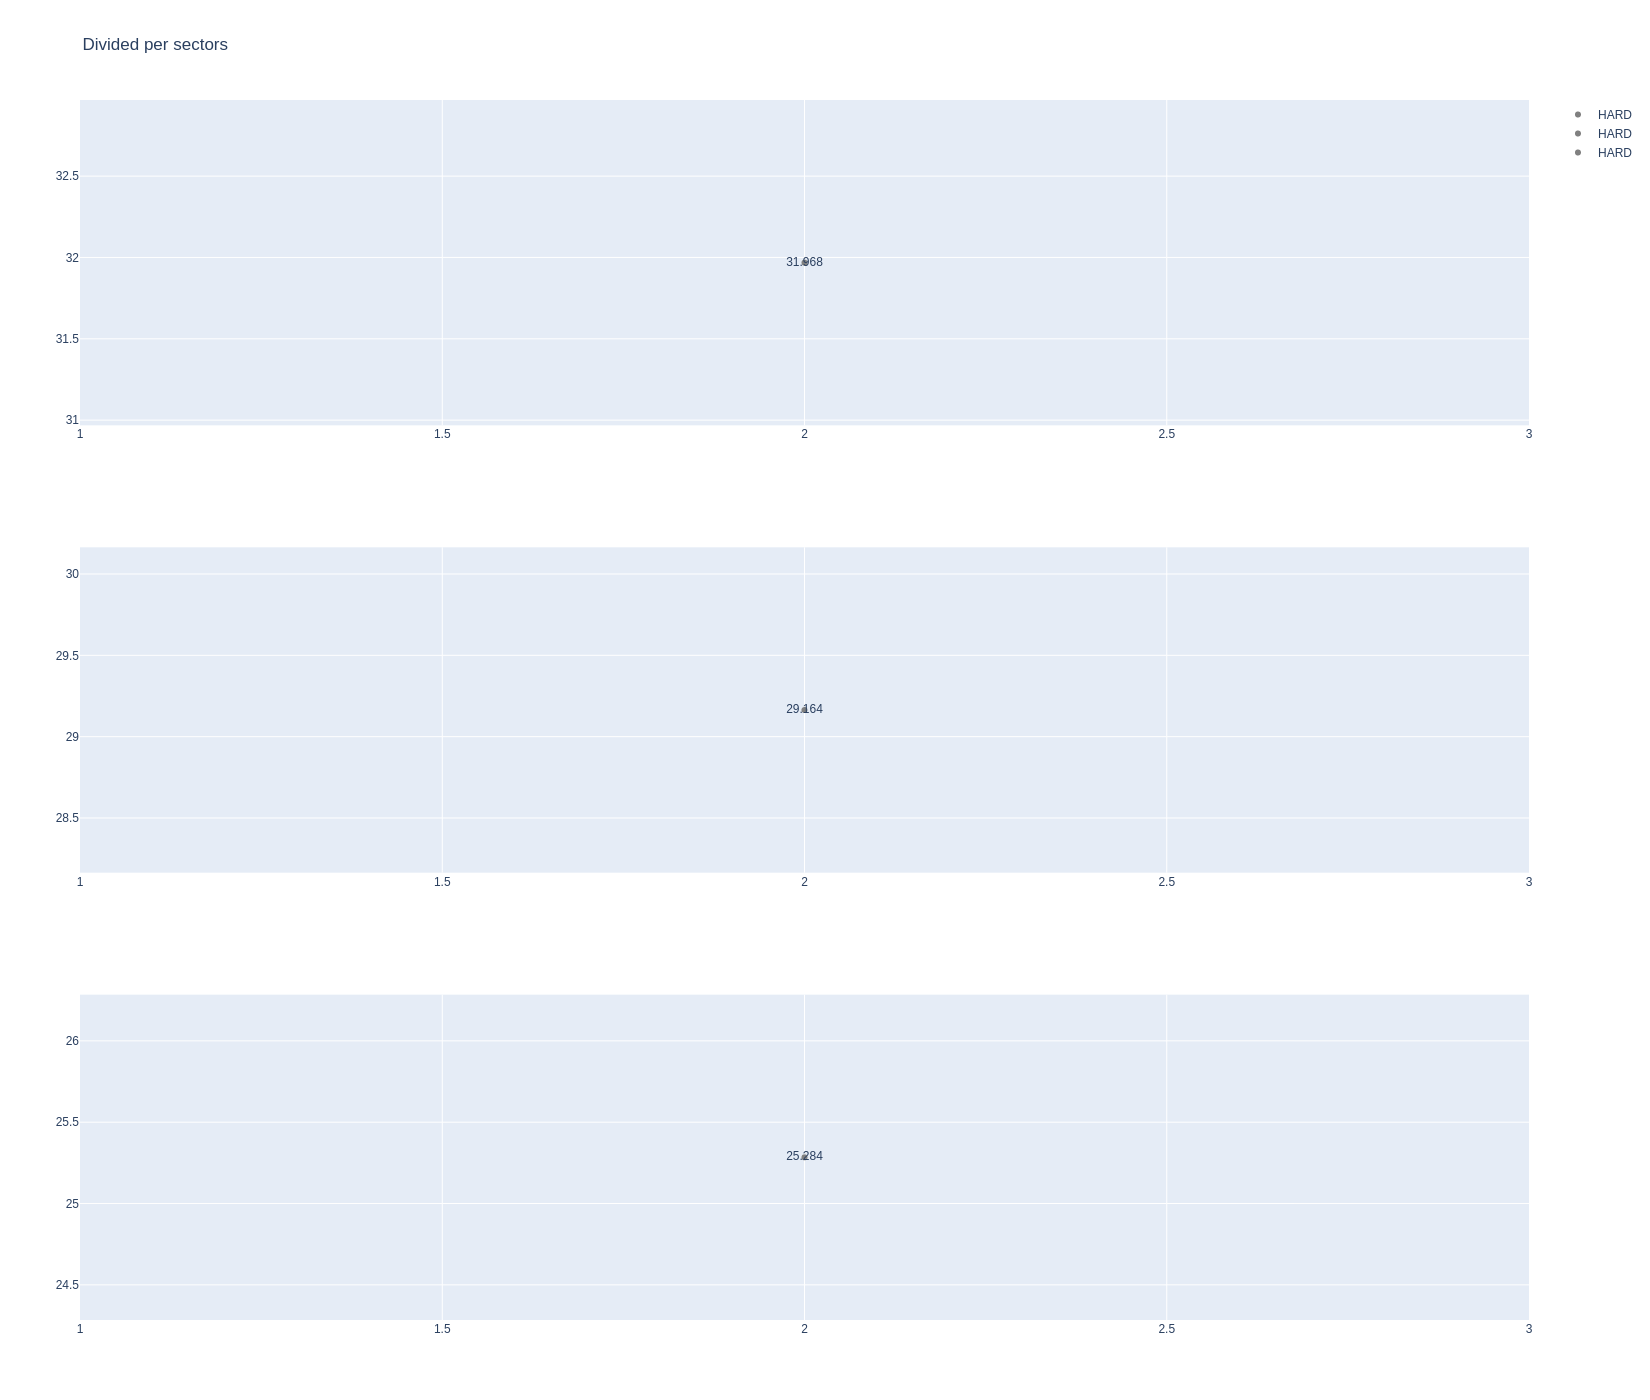

In [33]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [34]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
13         1275         9840             1             12          1       10   
14         1275         9840             1             63          1       11   
44         1275         9840             2             63         12       25   
45         1275         9840             2             12         11       24   
56         1275         9840             3             12         25       27   
82         1275         9840             3             63         26       33   
84         1275         9840             4             12         28       32   

   compound  tyre_age_at_start  
13     HARD                  0  
14     HARD                  0  
44     HARD                 11  
45     HARD                 10  
56     SOFT                  0  
82     SOFT                  0  
84     SOFT                  0

In [35]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
45   Kimi ANTONELLI     HARD  2025-11-28T13:34:03.503000+00:00           3   
225  Kimi ANTONELLI     HARD  2025-11-28T13:56:06.772000+00:00          12   
235  Kimi ANTONELLI     HARD  2025-11-28T13:57:33.153000+00:00          13   
246  Kimi ANTONELLI     HARD  2025-11-28T13:58:59.220000+00:00          14   
260  Kimi ANTONELLI     HARD  2025-11-28T14:00:24.974000+00:00          15   
276  Kimi ANTONELLI     HARD  2025-11-28T14:01:50.808000+00:00          16   
292  Kimi ANTONELLI     HARD  2025-11-28T14:03:17.120000+00:00          17   
309  Kimi ANTONELLI     HARD  2025-11-28T14:04:42.433000+00:00          18   
325  Kimi ANTONELLI     HARD  2025-11-28T14:06:07.825000+00:00          19   
341  Kimi ANTONELLI     HARD  2025-11-28T14:07:33.440000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
45              31.322             28.990             25.040        85.352  
225             31.826             29.313             25.312        86.451  
235             31.574             29.214             25.259        86.047  
246             31.562             29.217             25.019        85.798  
260             31.429             29.305             25.039        85.773  
276             31.713             29.299             25.284        86.296  
292             31.220             29.209             24.890        85.319  
309             31.283             29.237             24.885        85.405  
325             31.300             29.356             24.942        85.598  
341             31.411             29.304             24.786        85.501

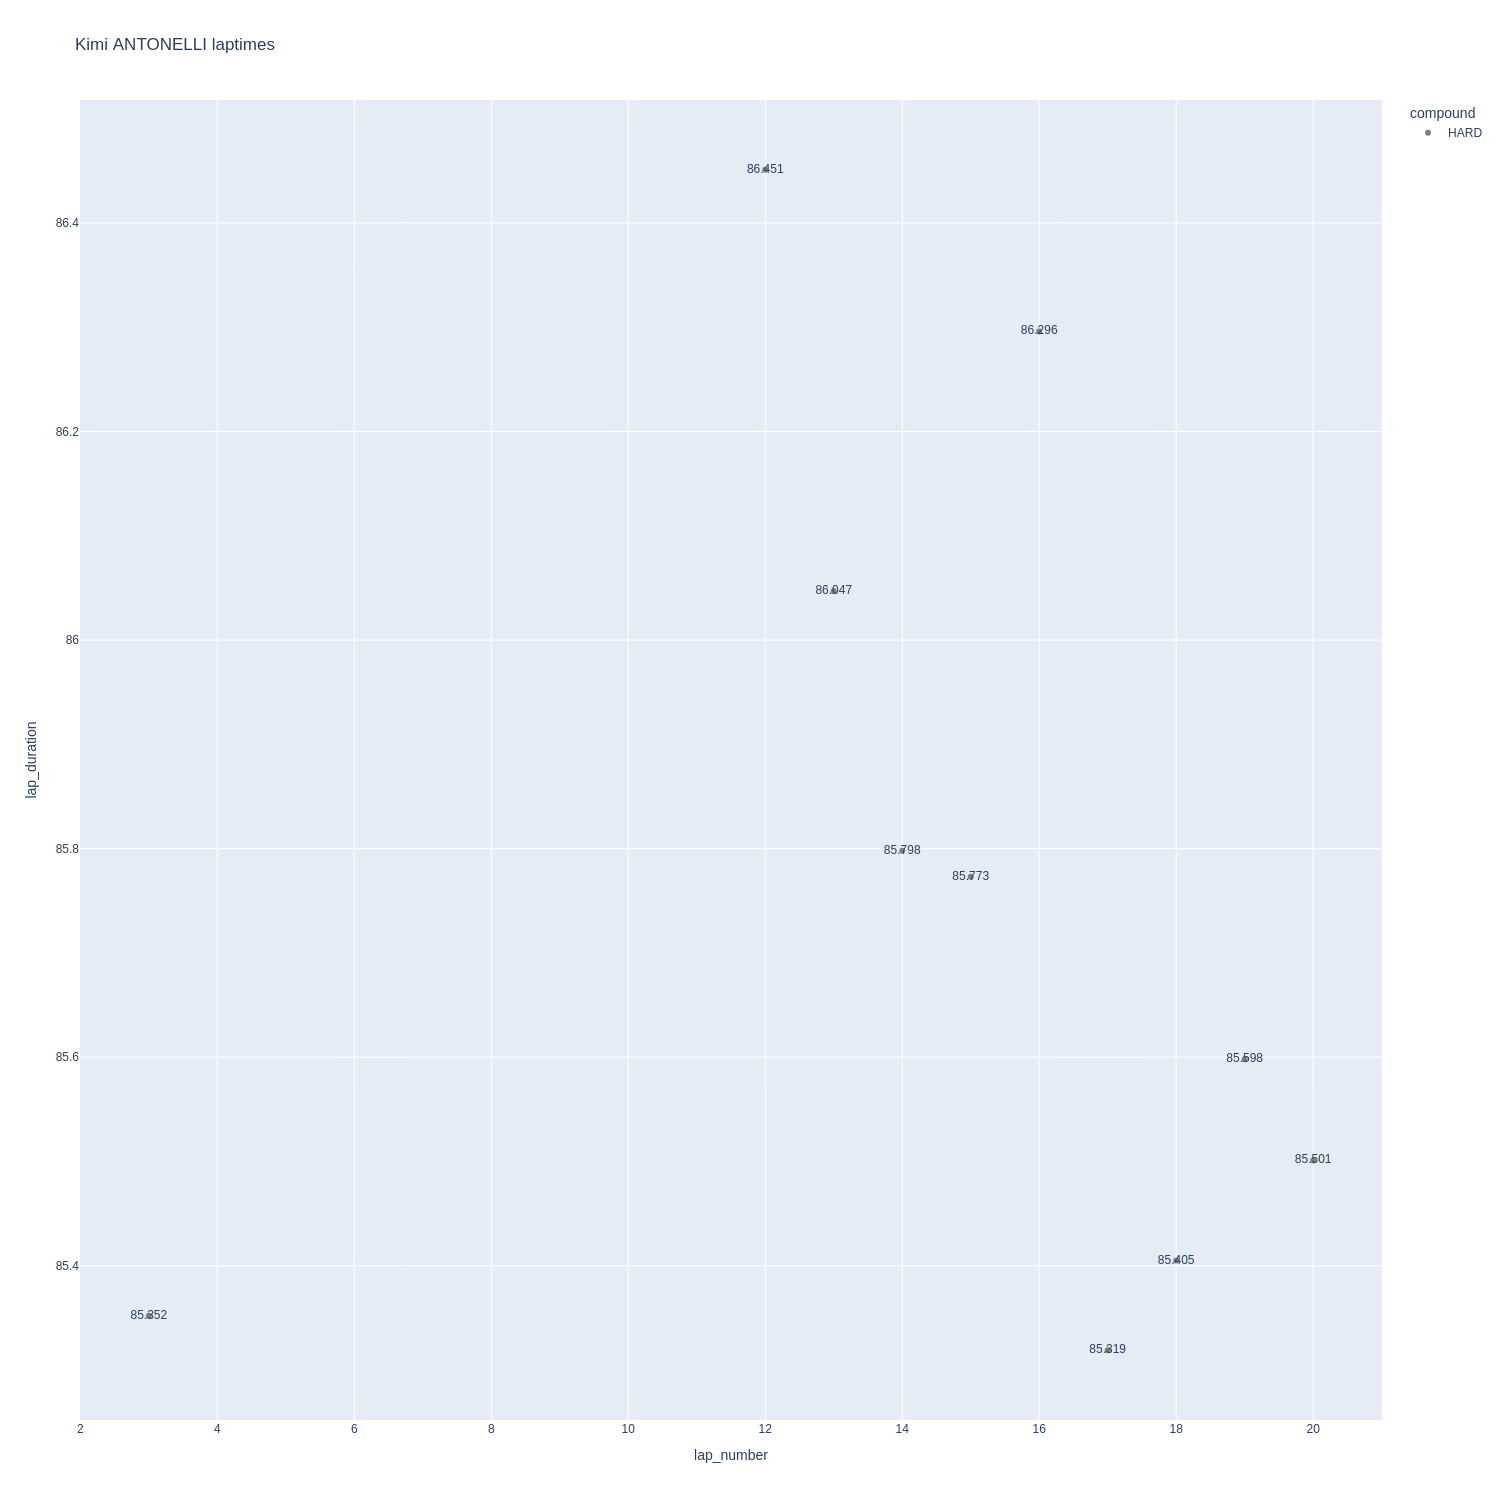

In [36]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

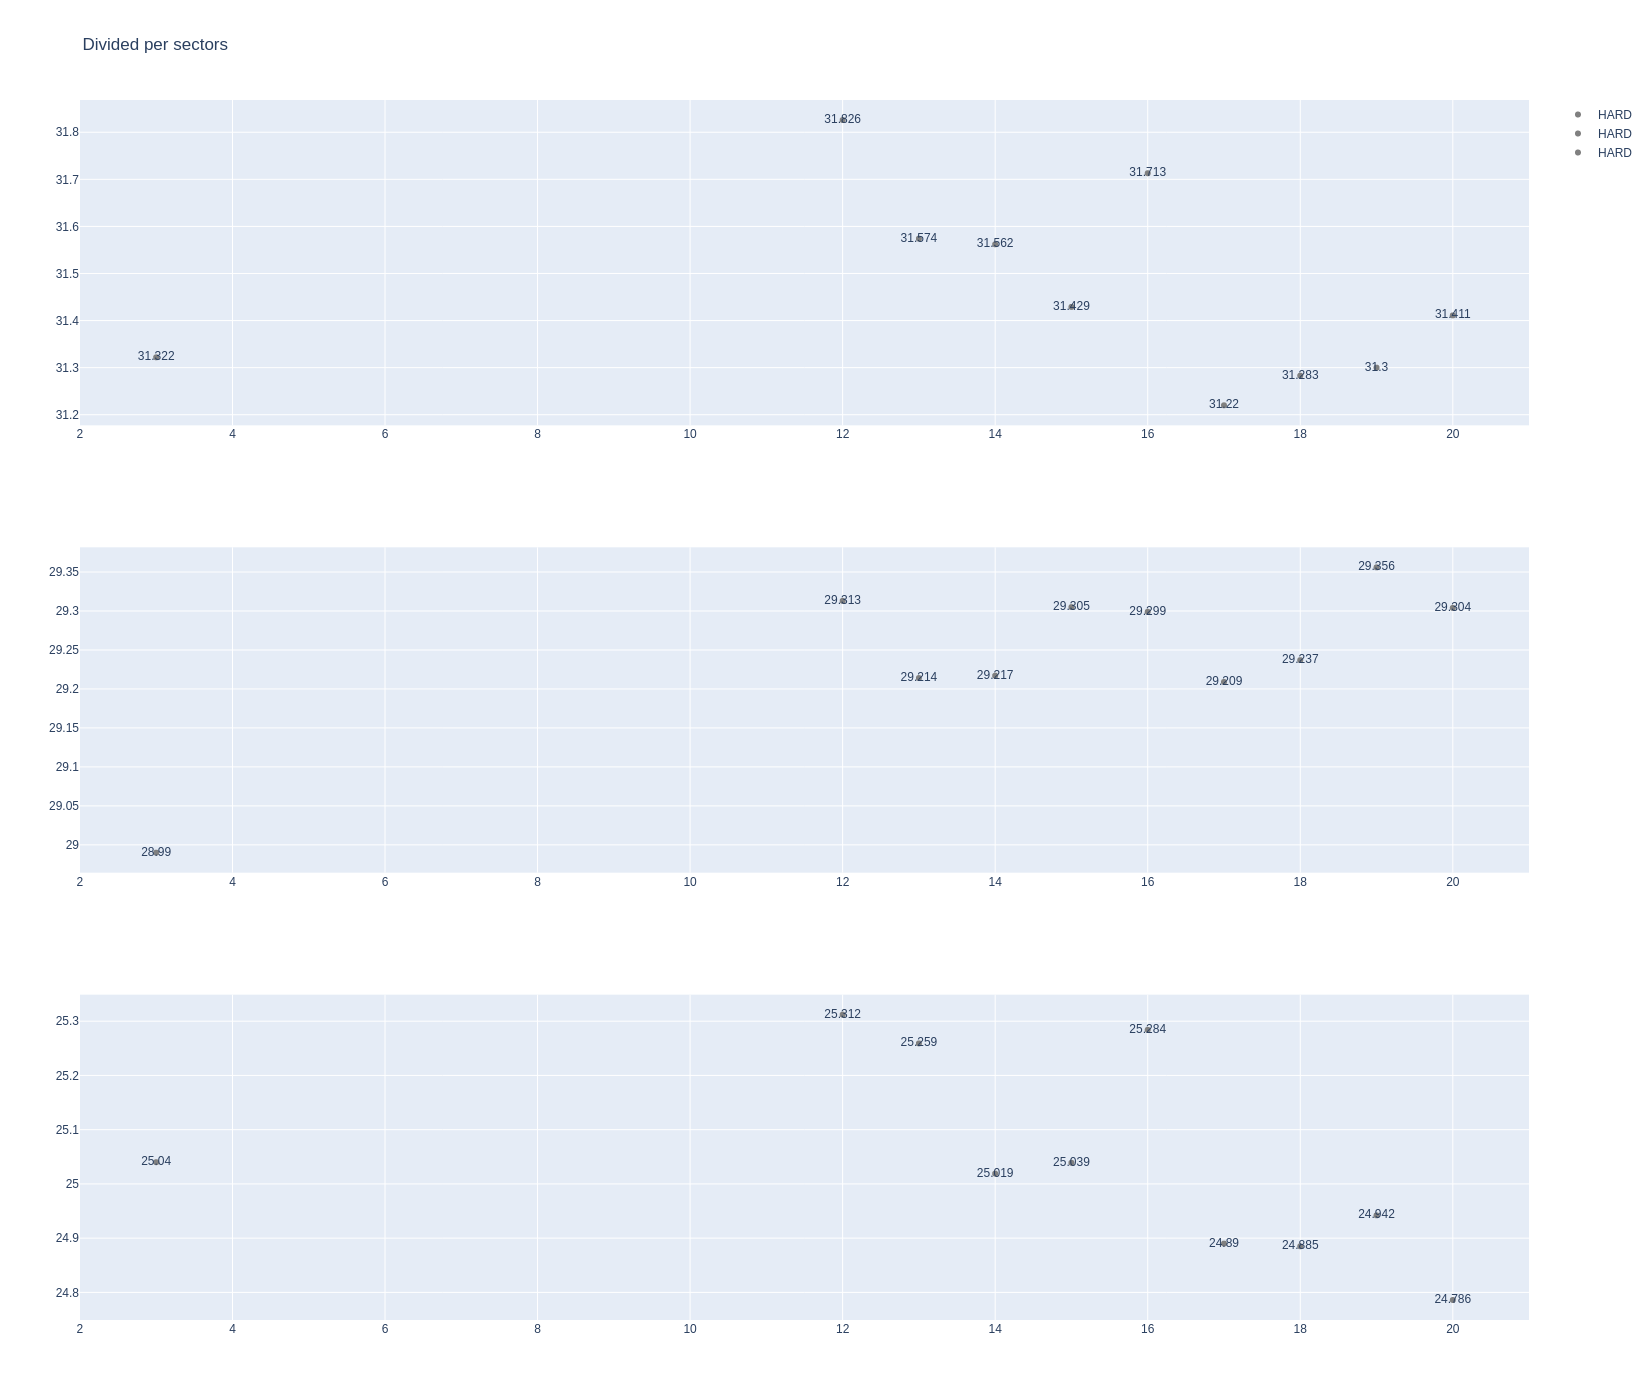

In [37]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [38]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
226  George RUSSELL     HARD  2025-11-28T13:56:18.337000+00:00          13   
237  George RUSSELL     HARD  2025-11-28T13:57:44.435000+00:00          14   
248  George RUSSELL     HARD  2025-11-28T13:59:10.341000+00:00          15   
262  George RUSSELL     HARD  2025-11-28T14:00:35.784000+00:00          16   
278  George RUSSELL     HARD  2025-11-28T14:02:01.105000+00:00          17   
297  George RUSSELL     HARD  2025-11-28T14:03:27.167000+00:00          18   
329  George RUSSELL     HARD  2025-11-28T14:06:23.715000+00:00          20   
345  George RUSSELL     HARD  2025-11-28T14:07:48.917000+00:00          21   
359  George RUSSELL     HARD  2025-11-28T14:09:14.212000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
226             31.714             29.176             25.209        86.099  
237             31.656             29.233             25.007        85.896  
248             31.460             29.286             24.784        85.530  
262             31.270             29.297             24.743        85.310  
278             31.511             29.448             24.998        85.957  
297             31.177             29.430             24.792        85.399  
329             31.340             29.221             24.589        85.150  
345             31.505             29.236             24.617        85.358  
359             31.312             29.245             24.520        85.077

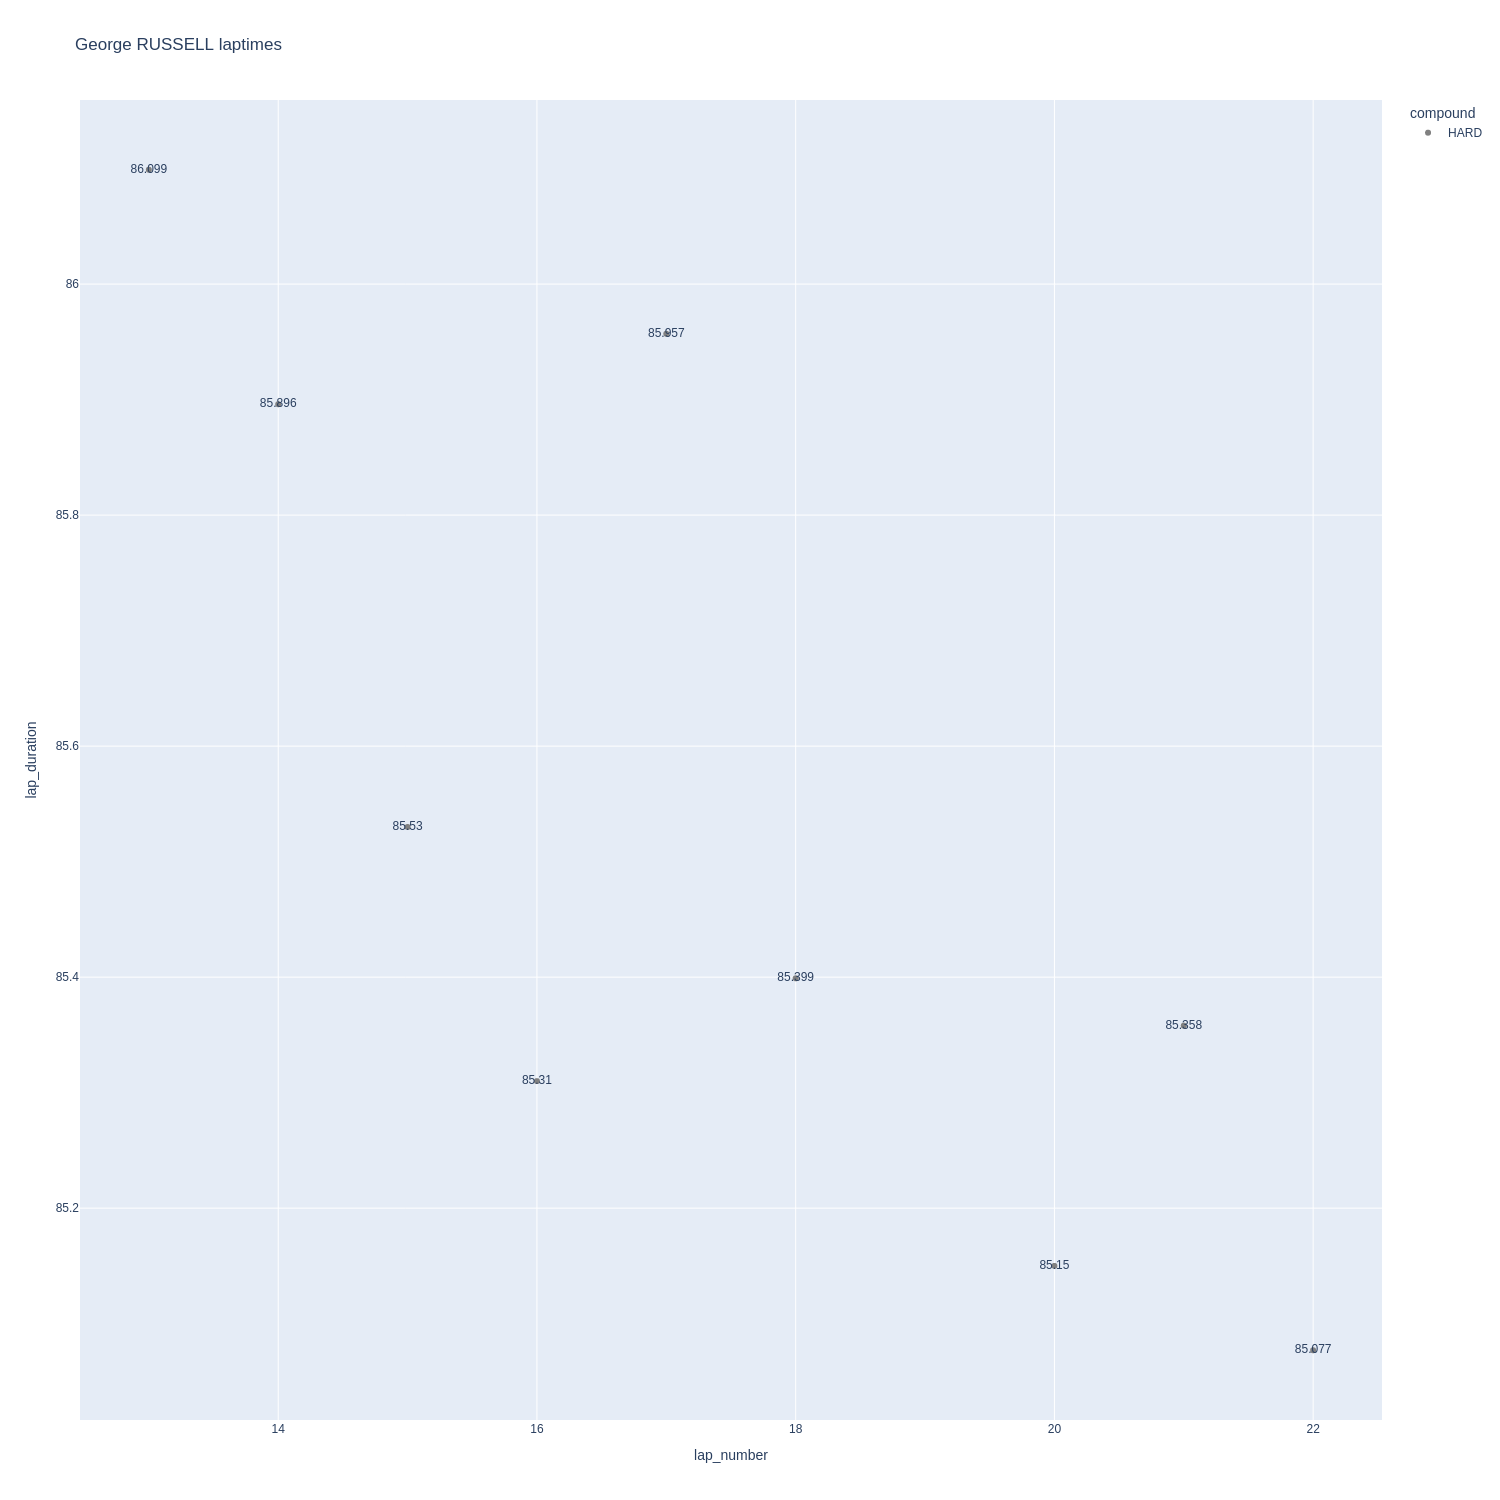

In [39]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

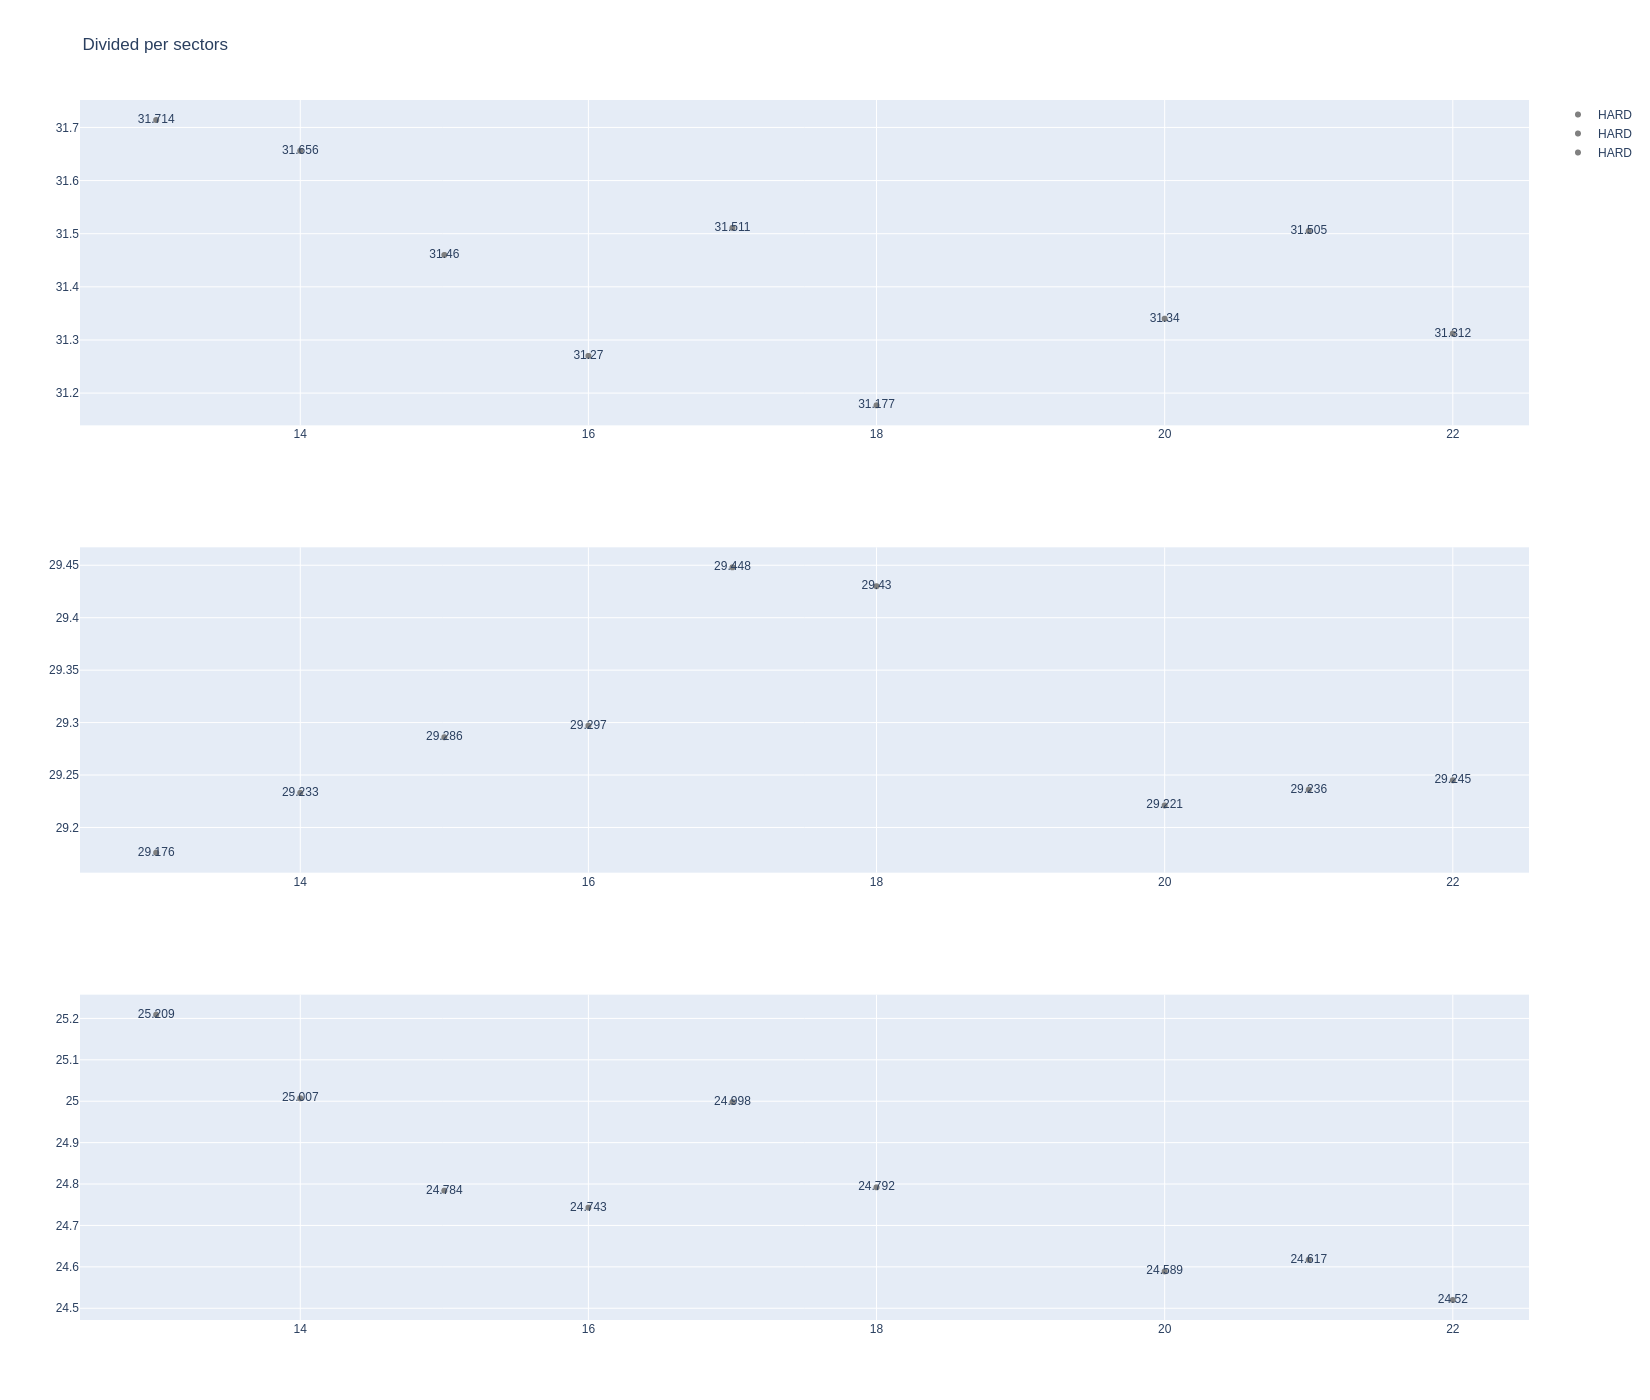

In [40]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [41]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
8          1275         9840             1              4          1        6   
9          1275         9840             1             81          1        7   
41         1275         9840             2              4          7       19   
42         1275         9840             2             81          8       20   
75         1275         9840             3              4         20       28   
83         1275         9840             3             81         21       29   

   compound  tyre_age_at_start  
8      HARD                  0  
9      HARD                  0  
41     HARD                  6  
42     HARD                  7  
75     SOFT                  0  
83     SOFT                  0

In [42]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
44   Lando NORRIS     HARD  2025-11-28T13:33:48.179000+00:00           2   
282  Lando NORRIS     HARD  2025-11-28T14:02:20.839000+00:00          14   
332  Lando NORRIS     HARD  2025-11-28T14:06:35.184000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
44              30.924             29.178             25.793        85.895  
282             31.981             28.893             24.278        85.152  
332             31.349             29.326             24.574        85.249

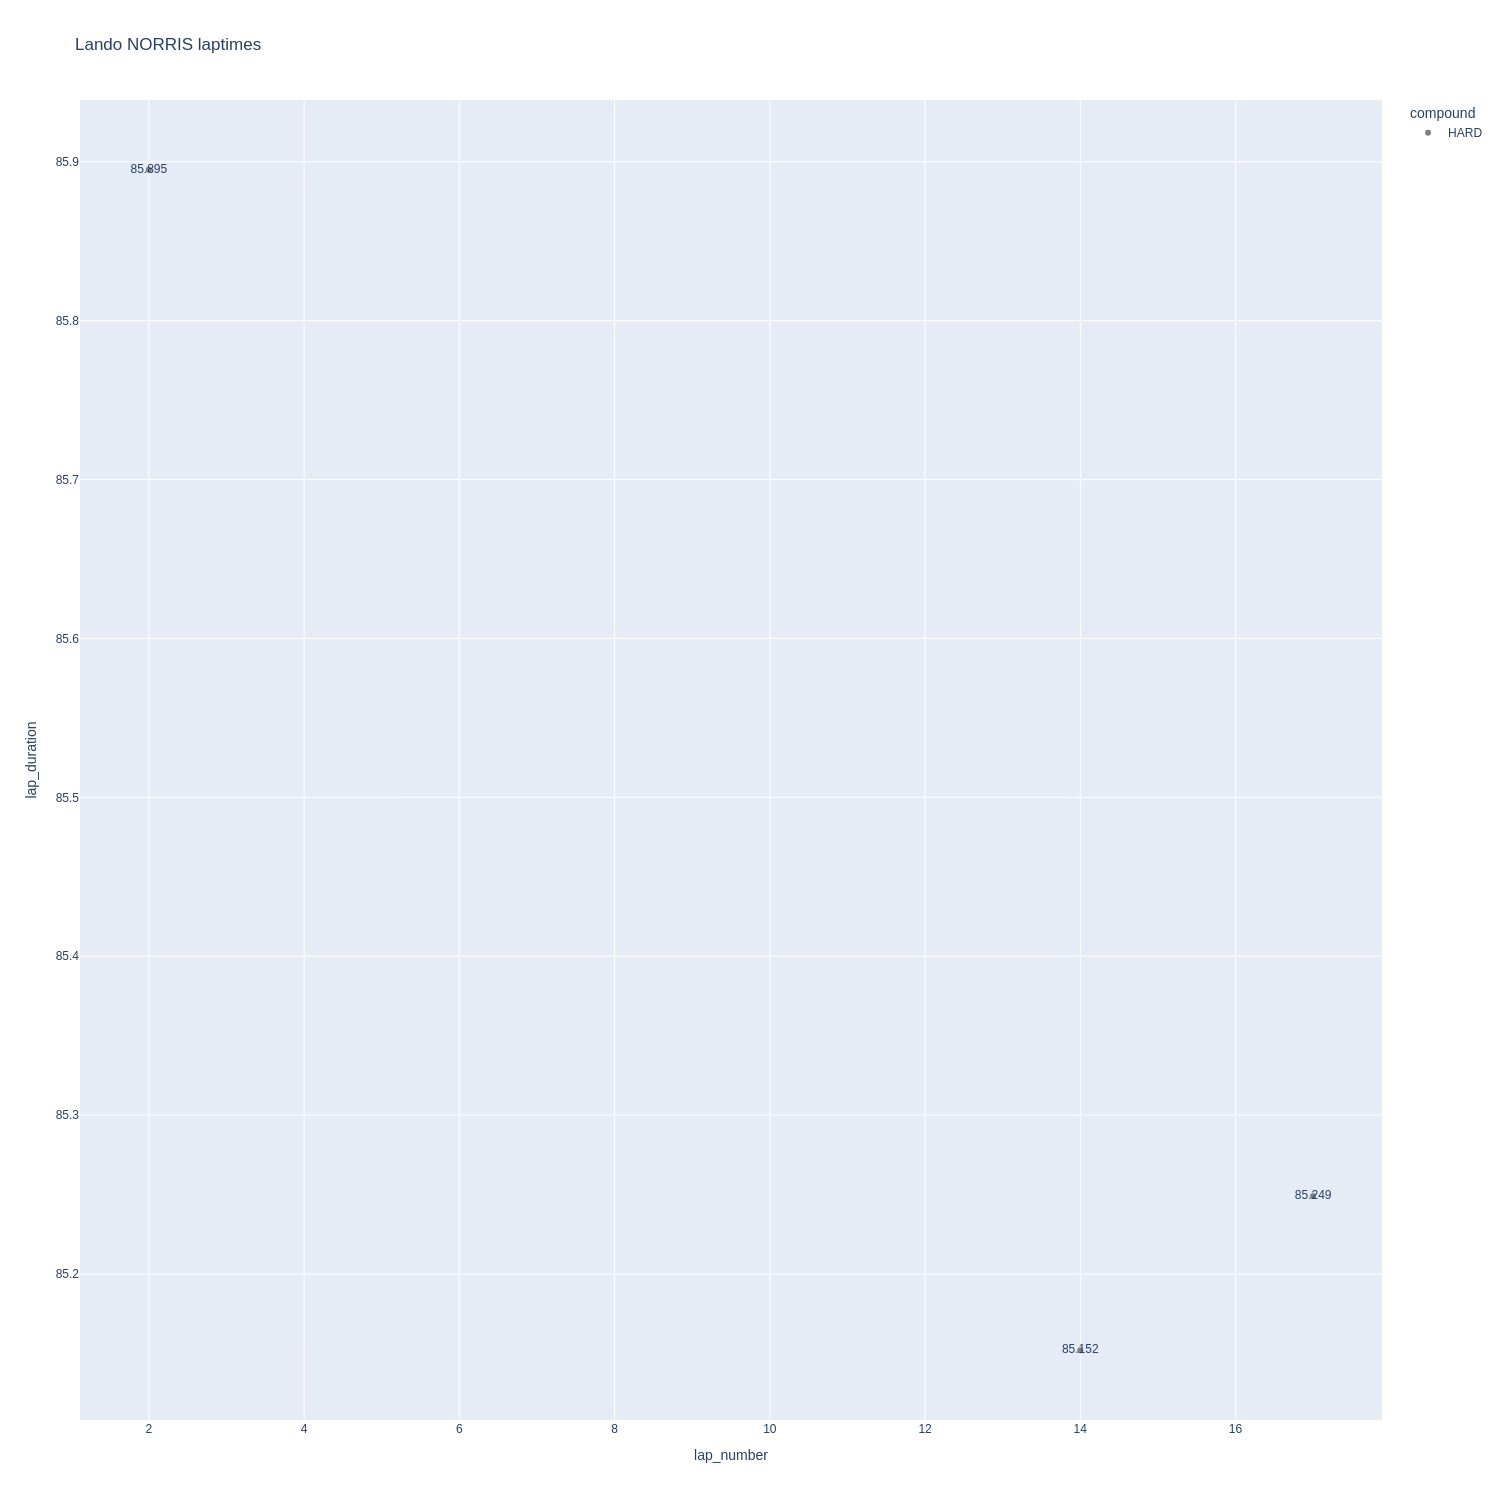

In [43]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

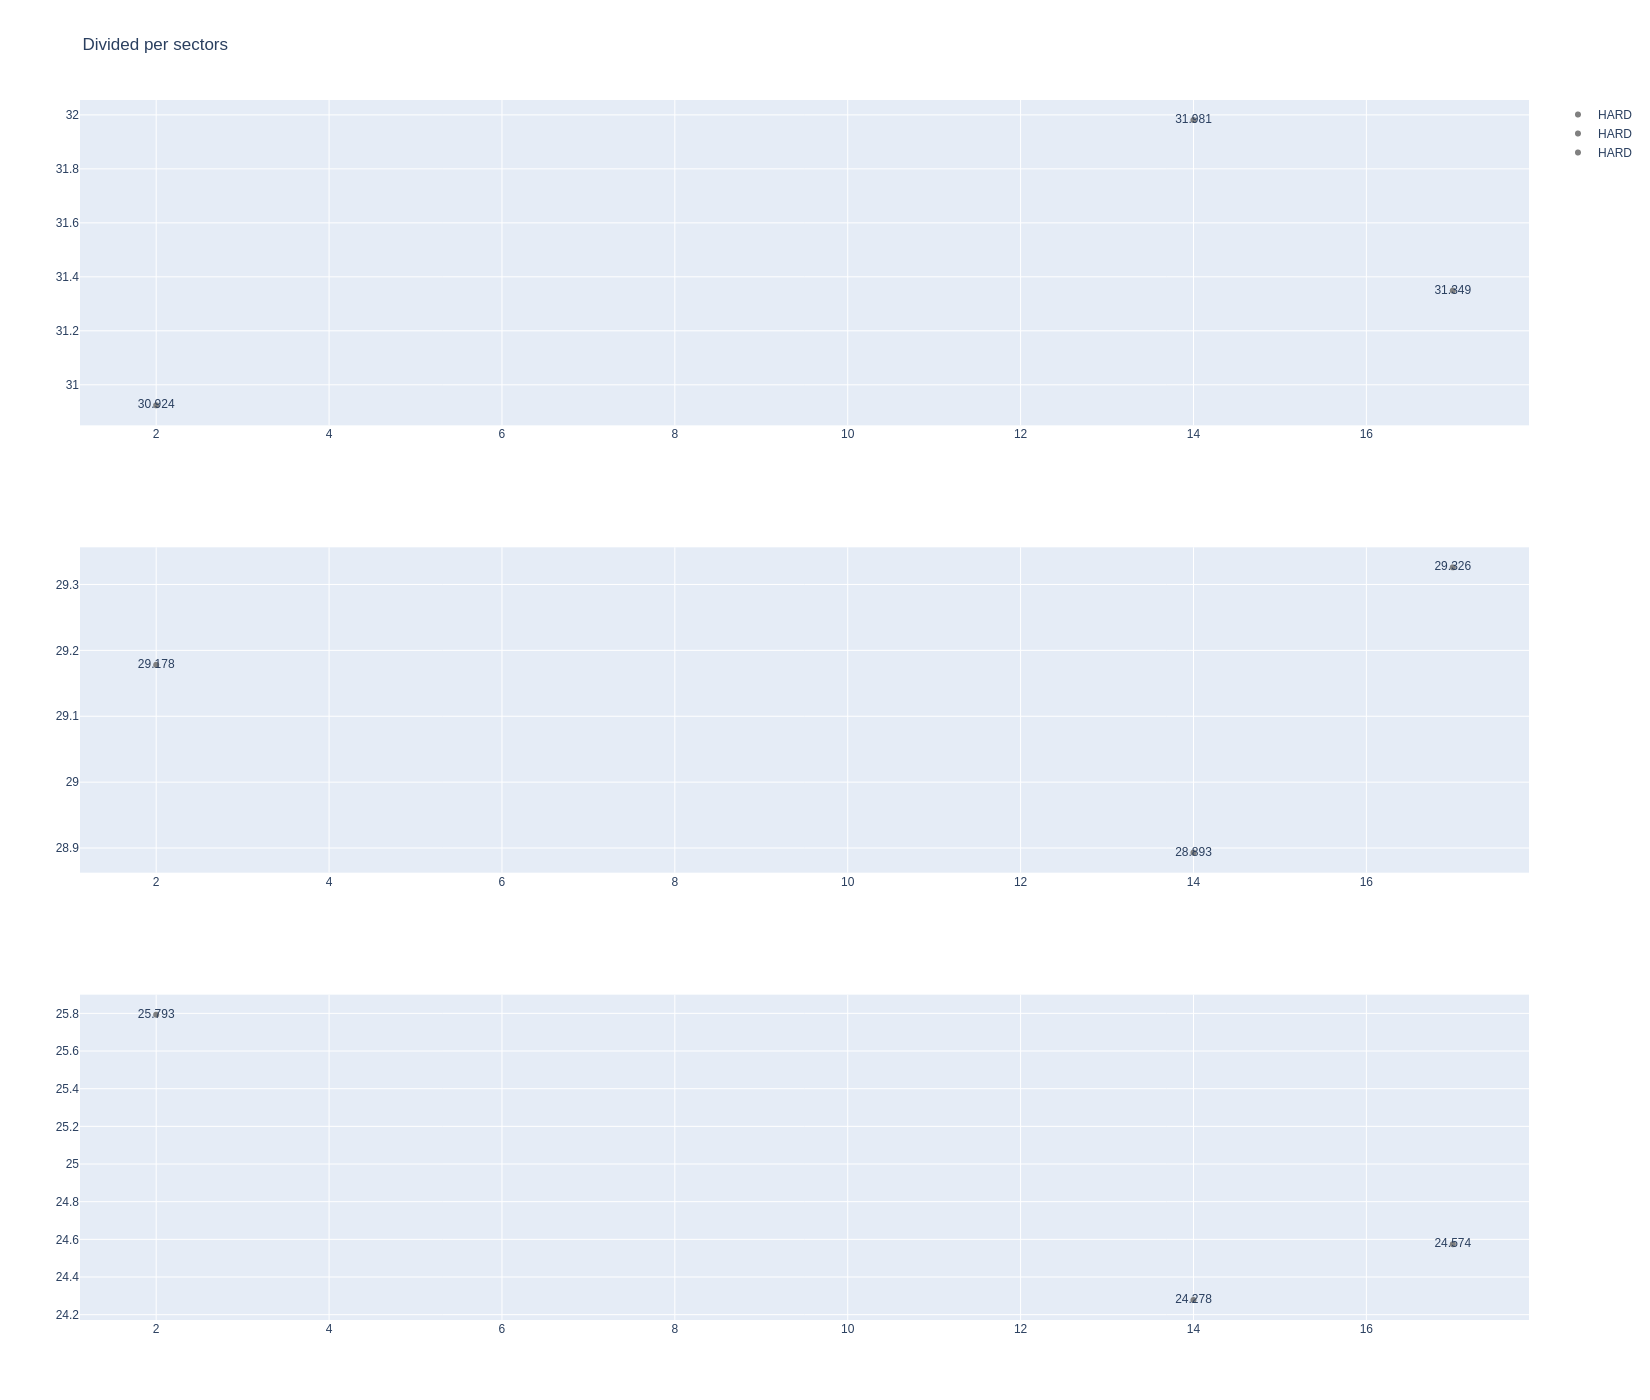

In [44]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [45]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
37   Oscar PIASTRI     HARD  2025-11-28T13:33:32.026000+00:00           2   
261  Oscar PIASTRI     HARD  2025-11-28T14:00:31.658000+00:00          13   
342  Oscar PIASTRI     HARD  2025-11-28T14:07:34.257000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
37              31.232             28.855             25.261        85.348  
261             31.164             29.361             24.496        85.021  
342             31.055             29.487             24.577        85.119

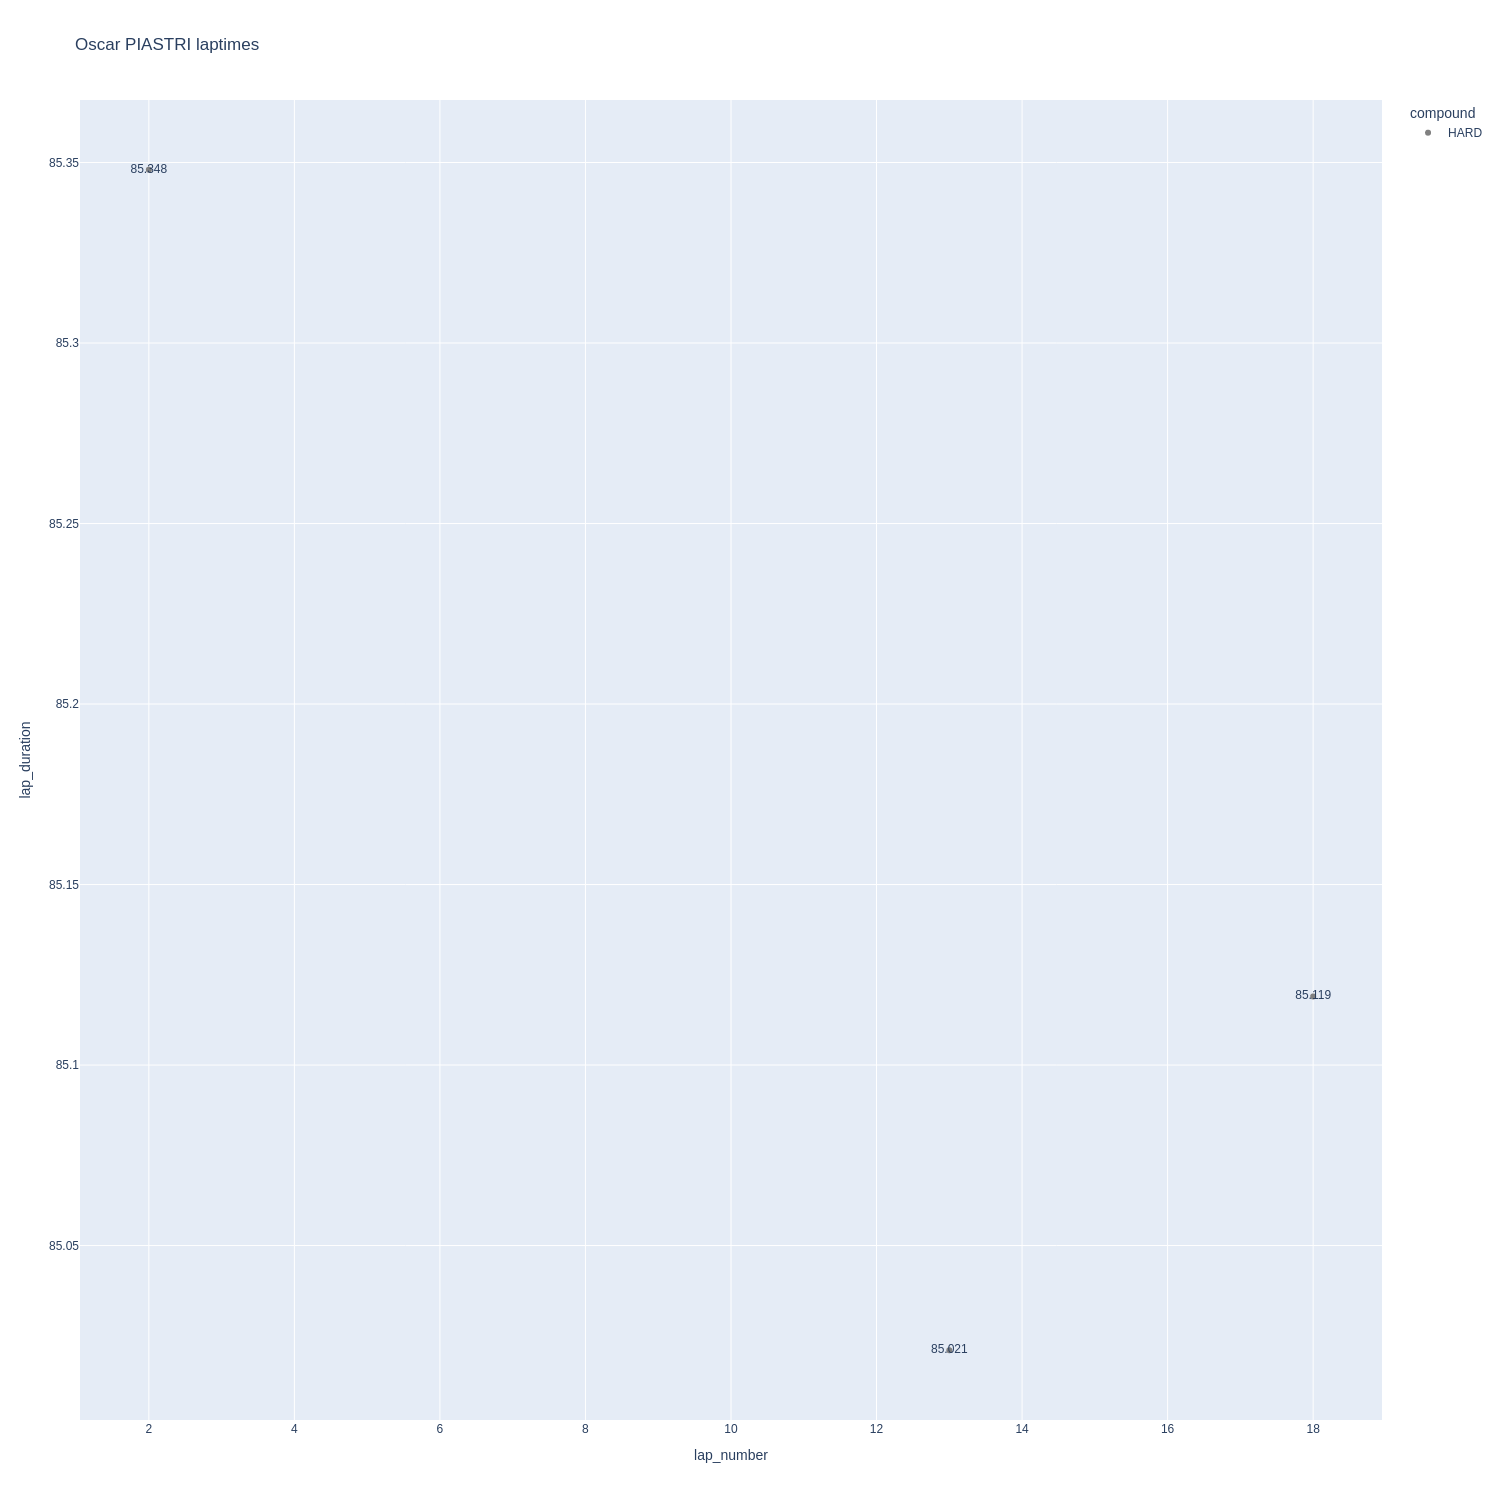

In [46]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

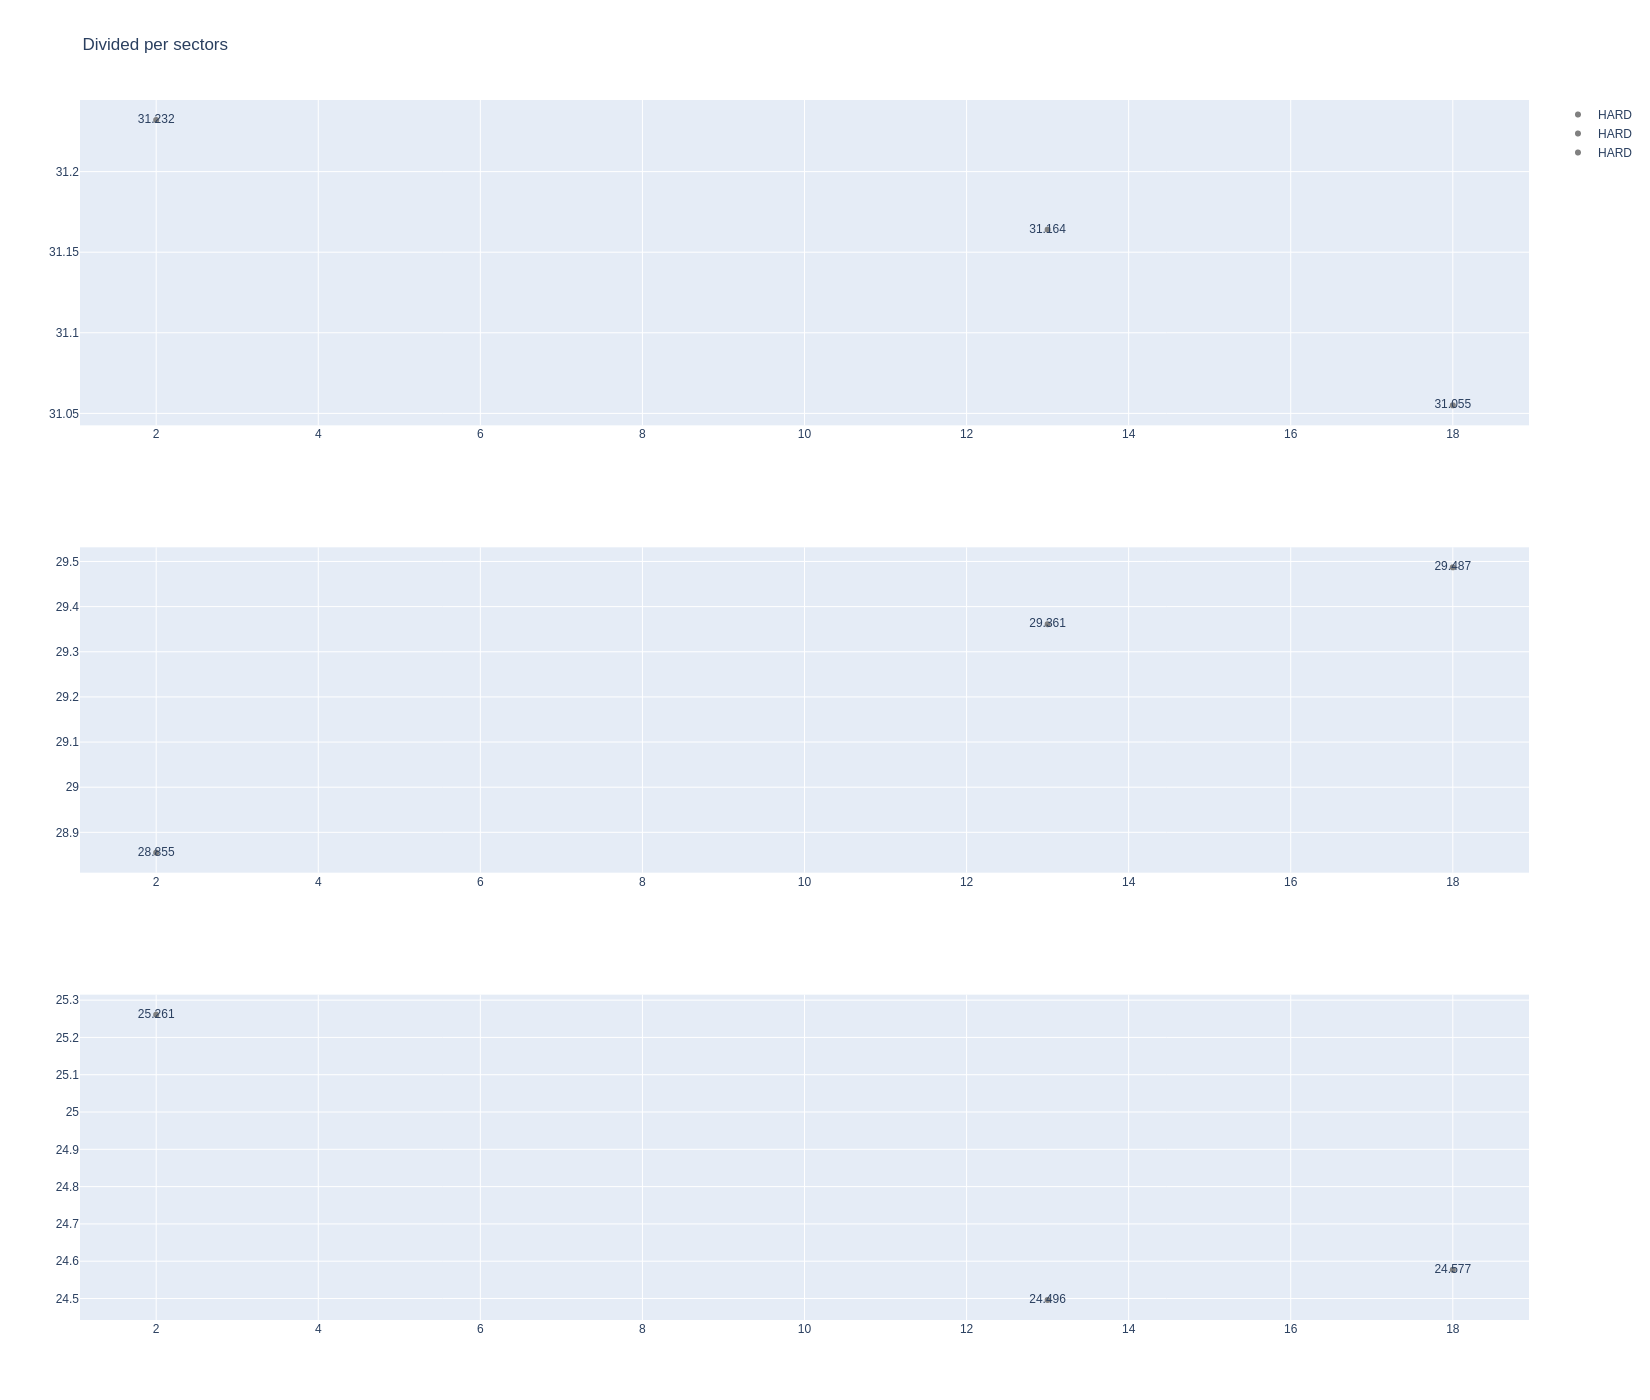

In [47]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [48]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
19         1275         9840             1             14          1        9   
23         1275         9840             1             18          1       10   
33         1275         9840             2             18         11       16   
37         1275         9840             2             14         10       17   
63         1275         9840             3             14         18       23   
72         1275         9840             3             18         17       26   
73         1275         9840             4             14         24       26   

   compound  tyre_age_at_start  
19     HARD                  0  
23     HARD                  0  
33     HARD                 10  
37     HARD                  9  
63     SOFT                  0  
72     SOFT                  0  
73     HARD                 17

In [49]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
286  Fernando ALONSO     HARD  2025-11-28T14:02:57.245000+00:00          13   
304  Fernando ALONSO     HARD  2025-11-28T14:04:23.074000+00:00          14   
321  Fernando ALONSO     HARD  2025-11-28T14:05:48.418000+00:00          15   
337  Fernando ALONSO     HARD  2025-11-28T14:07:13.606000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
286             31.788             28.920             25.029        85.737  
304             31.487             29.055             24.853        85.395  
321             31.300             29.060             24.878        85.238  
337             31.333             29.042             24.800        85.175

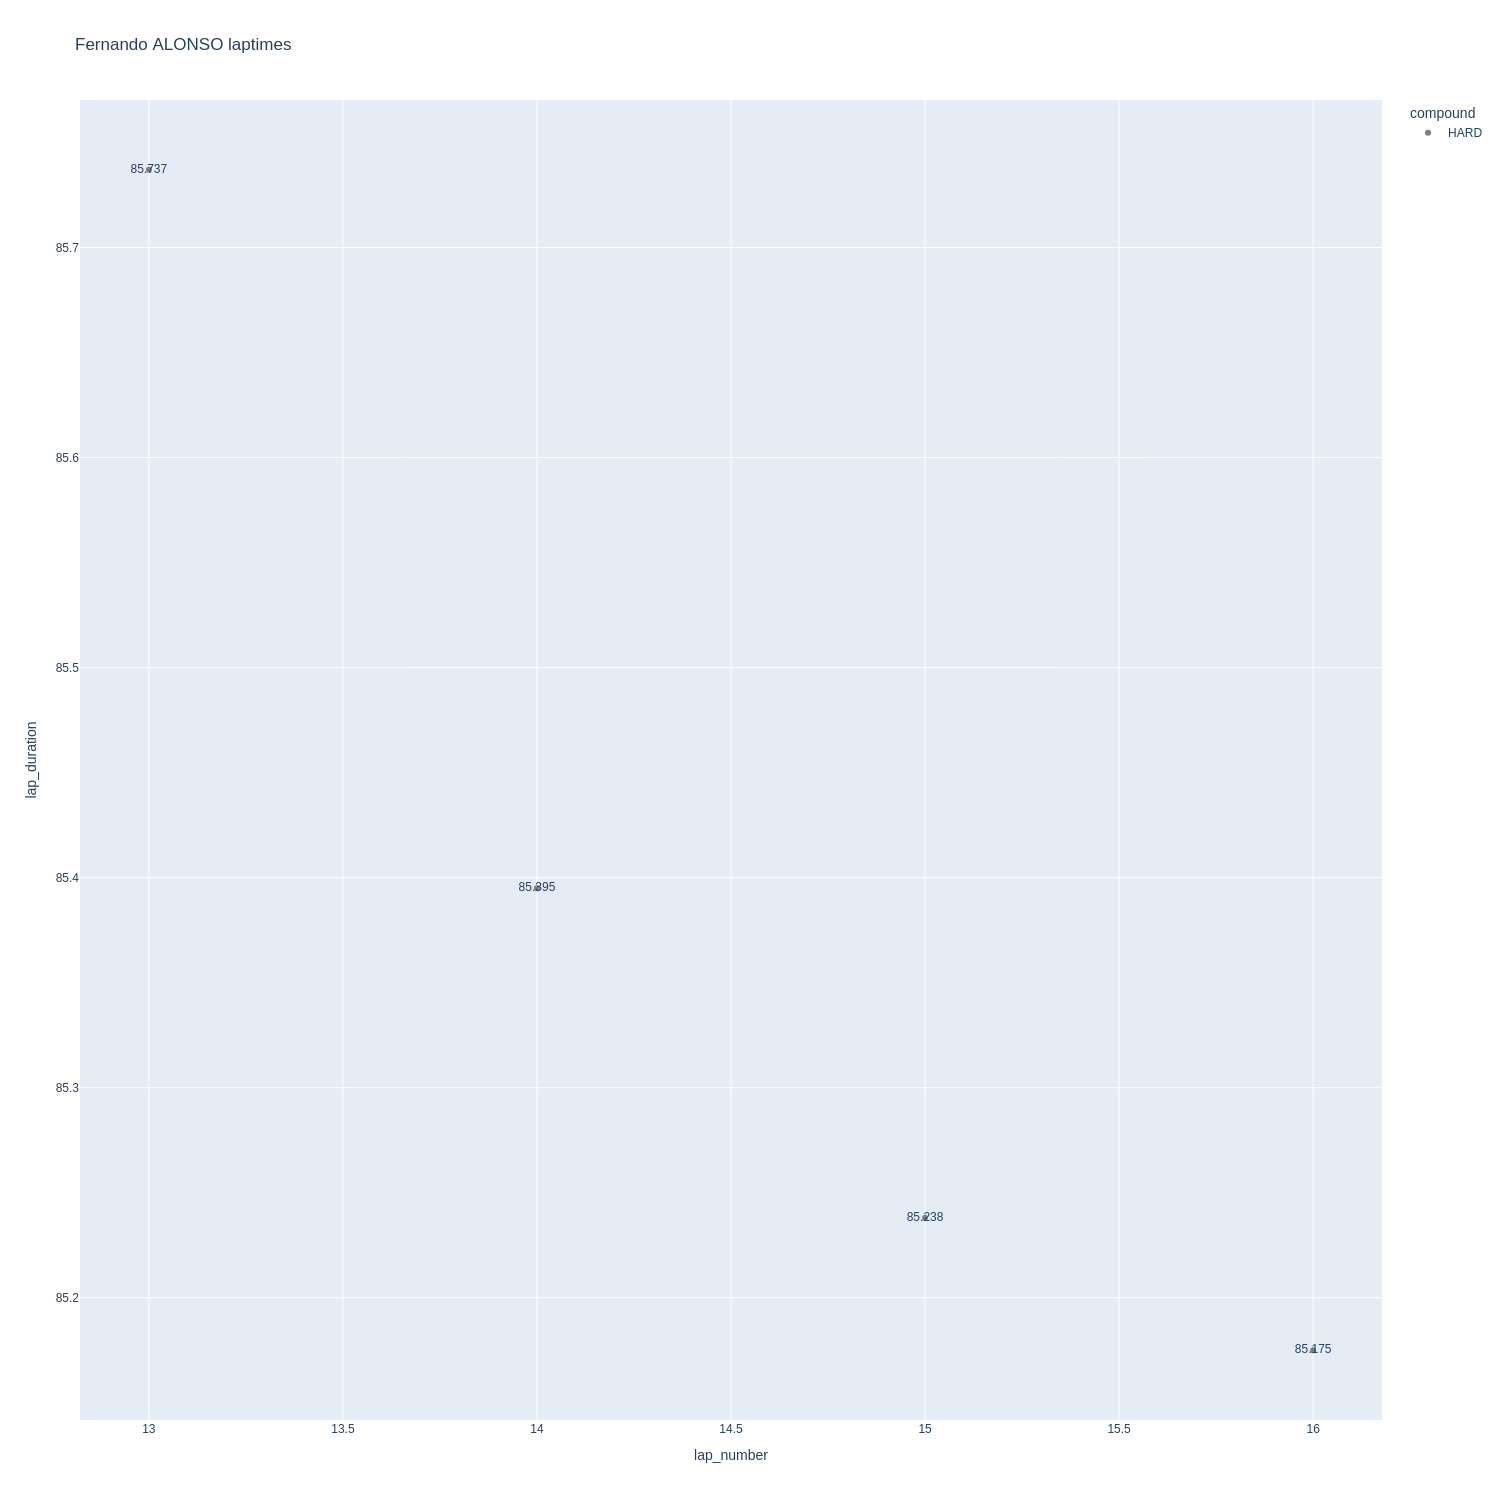

In [50]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

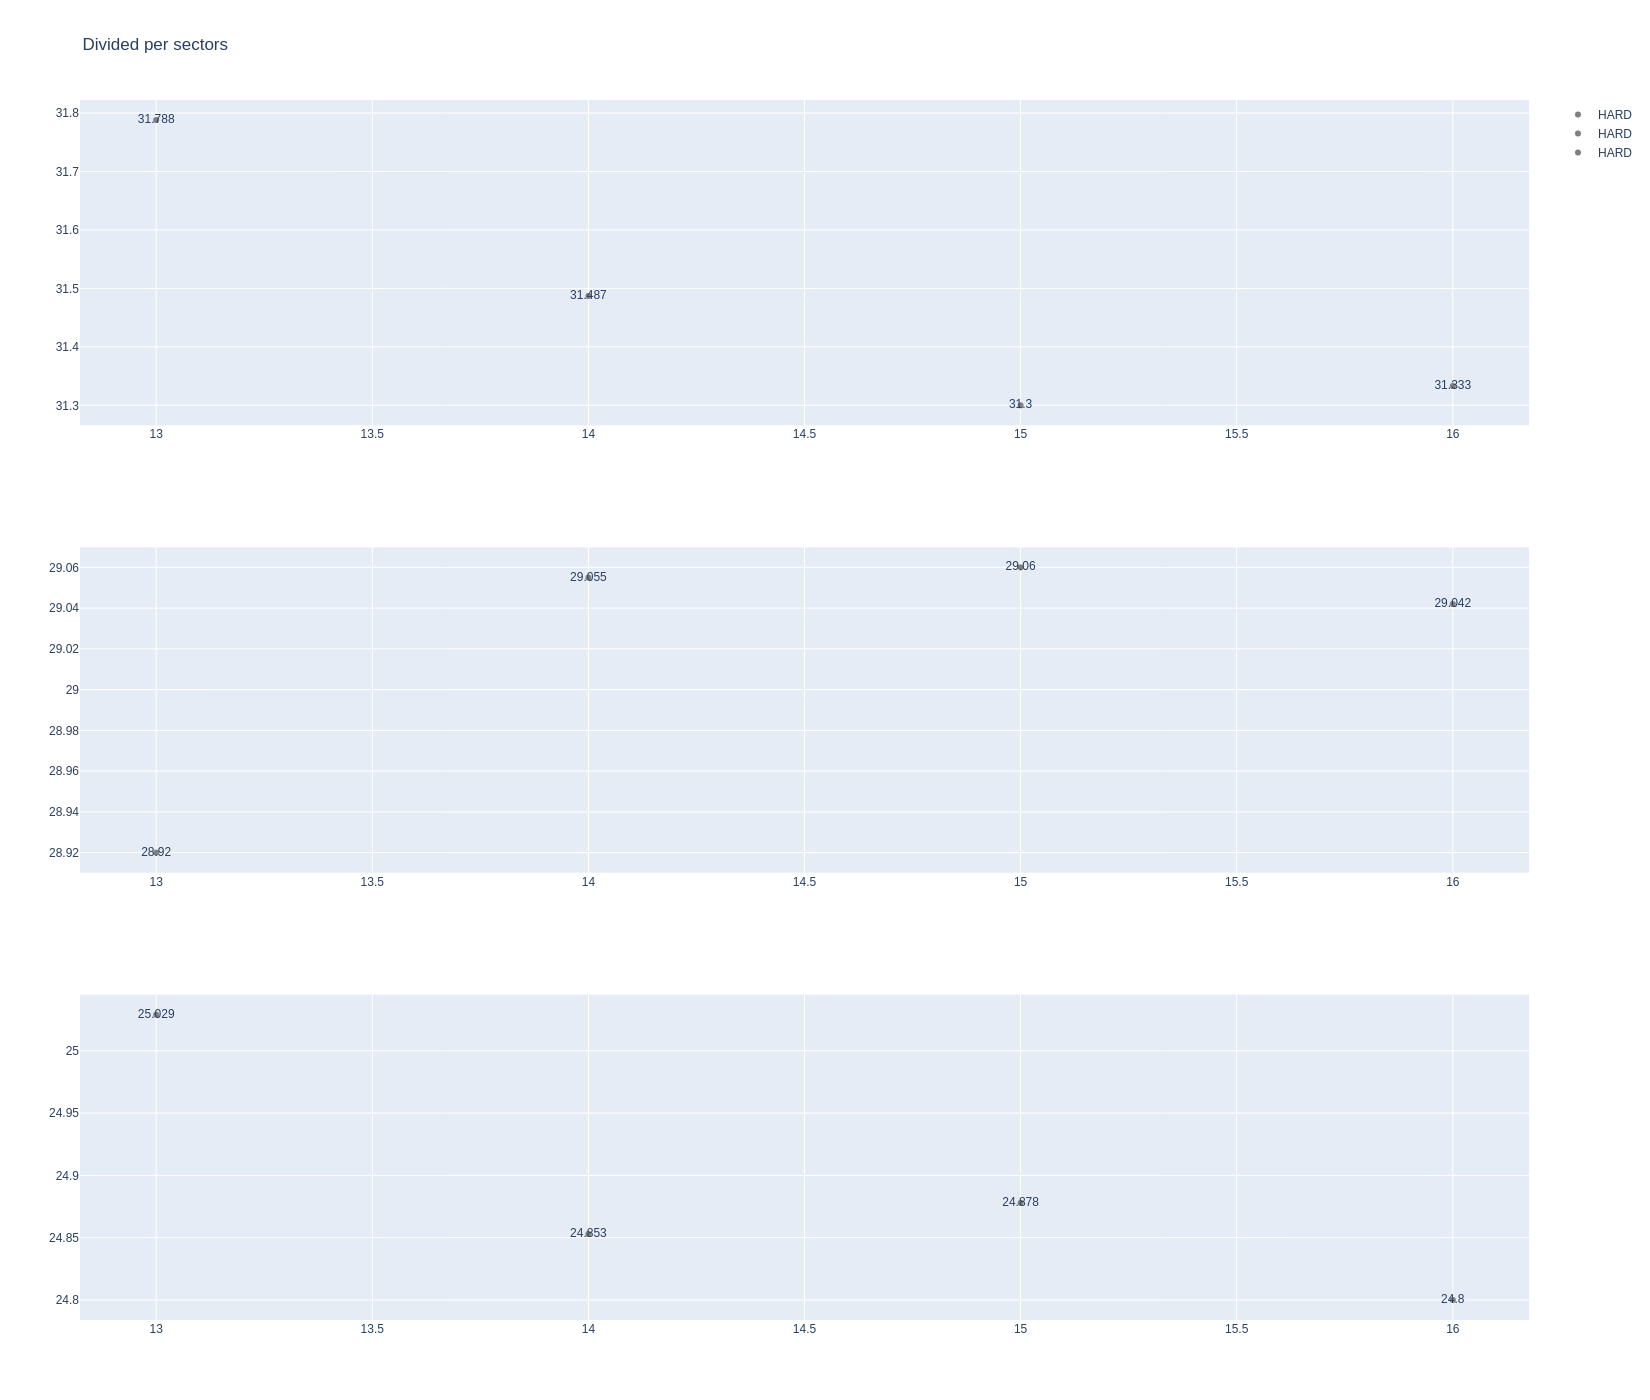

In [51]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [52]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
53   Lance STROLL     HARD  2025-11-28T13:34:49.050000+00:00           2   
340  Lance STROLL     HARD  2025-11-28T14:07:30.340000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
53              31.637             28.834             25.036        85.507  
340             31.395             29.200             24.667        85.262

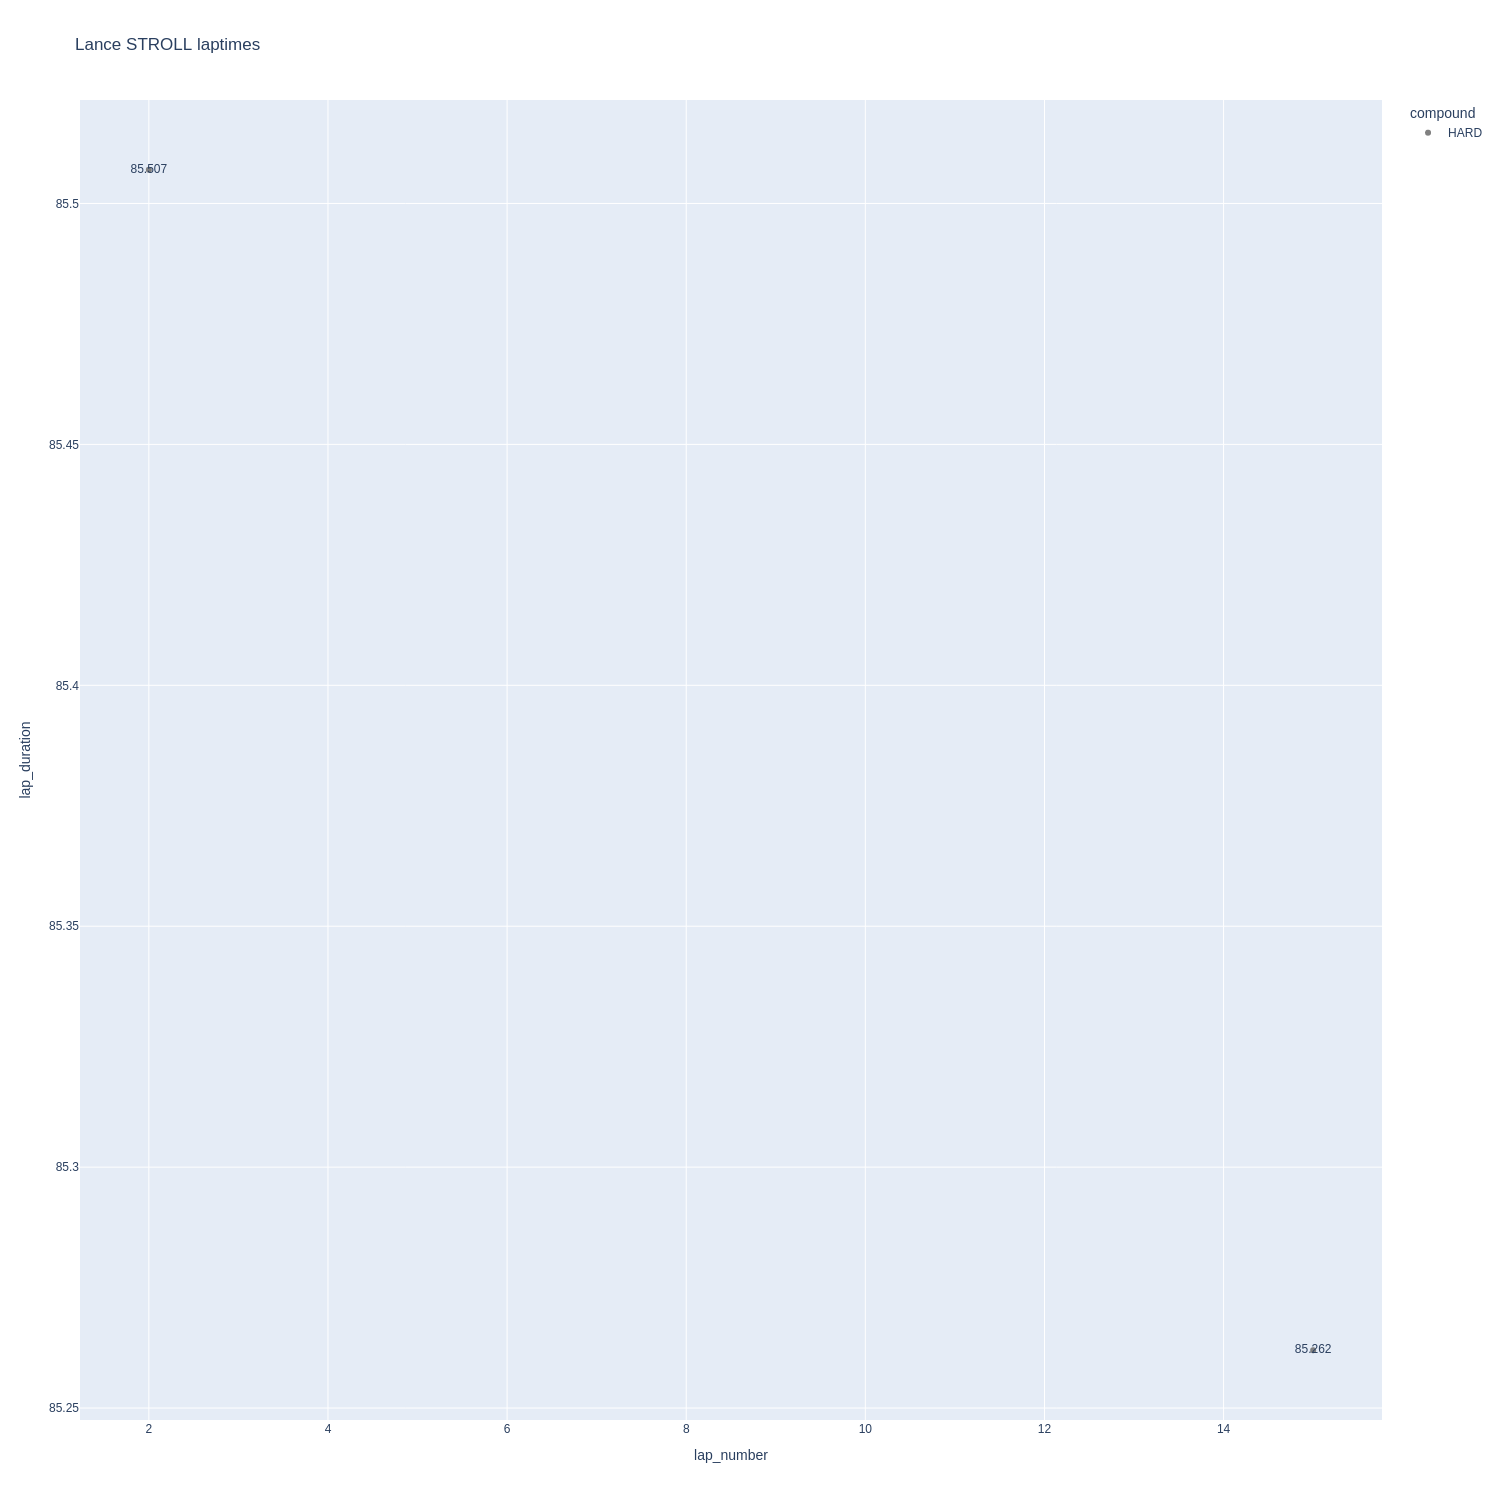

In [53]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

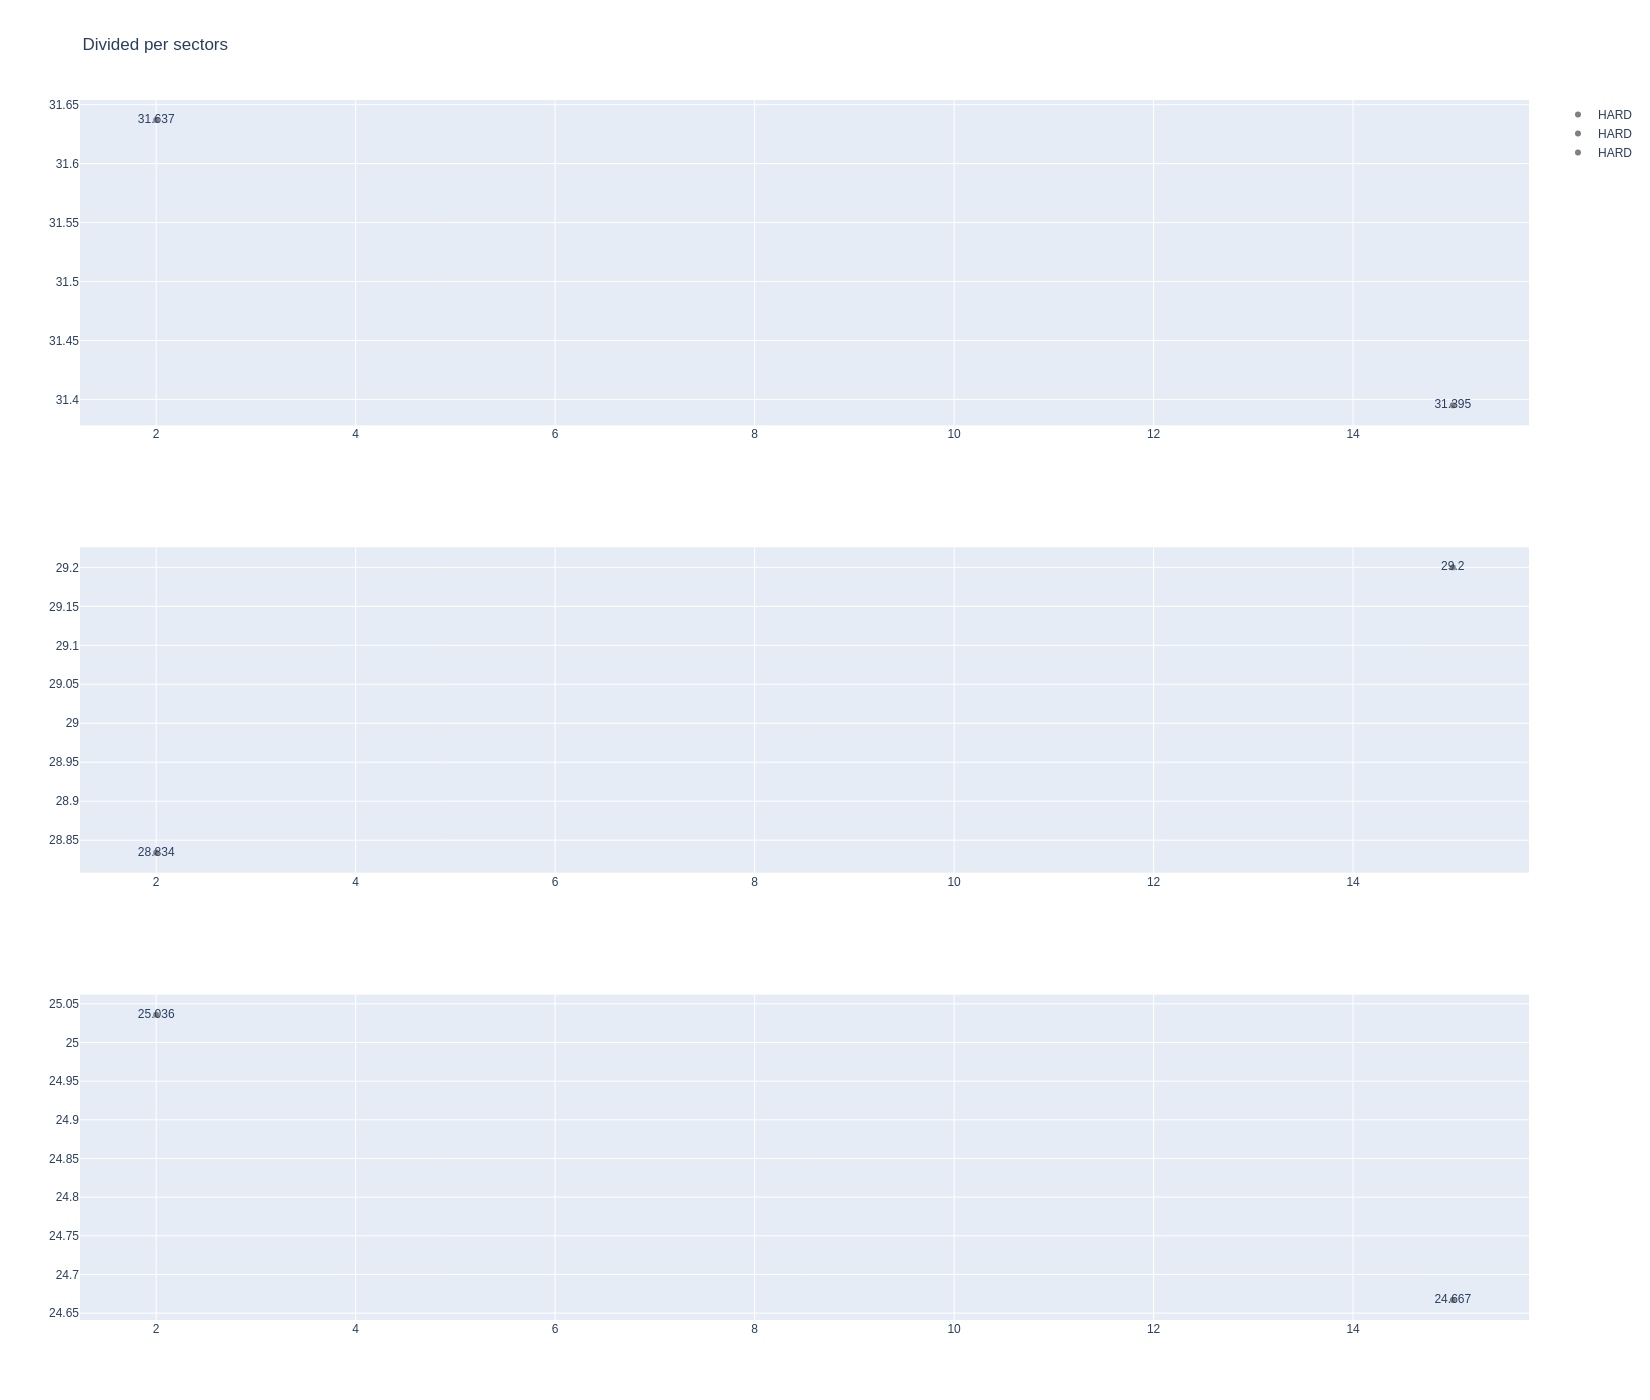

In [54]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [55]:
stintInformation.query('driver_number == 30 or driver_number == 6')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1275         9840             1             30          1        4   
2          1275         9840             1              6          1        4   
5          1275         9840             2             30          5        9   
11         1275         9840             2              6          5       11   
17         1275         9840             3             30         10       12   
34         1275         9840             3              6         12       21   
35         1275         9840             4             30         13       22   
50         1275         9840             5             30         23       25   
54         1275         9840             4              6         22       24   
64         1275         9840             6             30         26       27   
65         1275         9840             5              6         25       27   
79         1275         9840             7             30         28       30   
80         1275         9840             6              6         28       30   

   compound  tyre_age_at_start  
1      HARD                  0  
2      HARD                  0  
5      HARD                  4  
11     HARD                  4  
17     HARD                  9  
34     HARD                 11  
35     HARD                  0  
50     SOFT                  0  
54     SOFT                  0  
64     SOFT                  0  
65     SOFT                  3  
79     SOFT                  5  
80     HARD                 21

In [56]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
19   Liam LAWSON     HARD  2025-11-28T13:31:52.773000+00:00           2   
34   Liam LAWSON     HARD  2025-11-28T13:33:19.588000+00:00           3   
244  Liam LAWSON     HARD  2025-11-28T13:58:50.935000+00:00          14   
259  Liam LAWSON     HARD  2025-11-28T14:00:16.951000+00:00          15   
274  Liam LAWSON     HARD  2025-11-28T14:01:42.876000+00:00          16   
290  Liam LAWSON     HARD  2025-11-28T14:03:09.027000+00:00          17   
307  Liam LAWSON     HARD  2025-11-28T14:04:35.715000+00:00          18   
323  Liam LAWSON     HARD  2025-11-28T14:06:01.090000+00:00          19   
339  Liam LAWSON     HARD  2025-11-28T14:07:26.792000+00:00          20   
354  Liam LAWSON     HARD  2025-11-28T14:08:52.227000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
19              32.246             29.316             25.301        86.863  
34              31.464             29.003             24.912        85.379  
244             31.777             29.183             25.138        86.098  
259             31.831             29.124             24.997        85.952  
274             31.731             29.292             25.050        86.073  
290             31.630             29.766             25.214        86.610  
307             31.654             29.095             24.774        85.523  
323             31.527             29.233             24.803        85.563  
339             31.464             29.223             24.744        85.431  
354             31.521             29.221             24.733        85.475

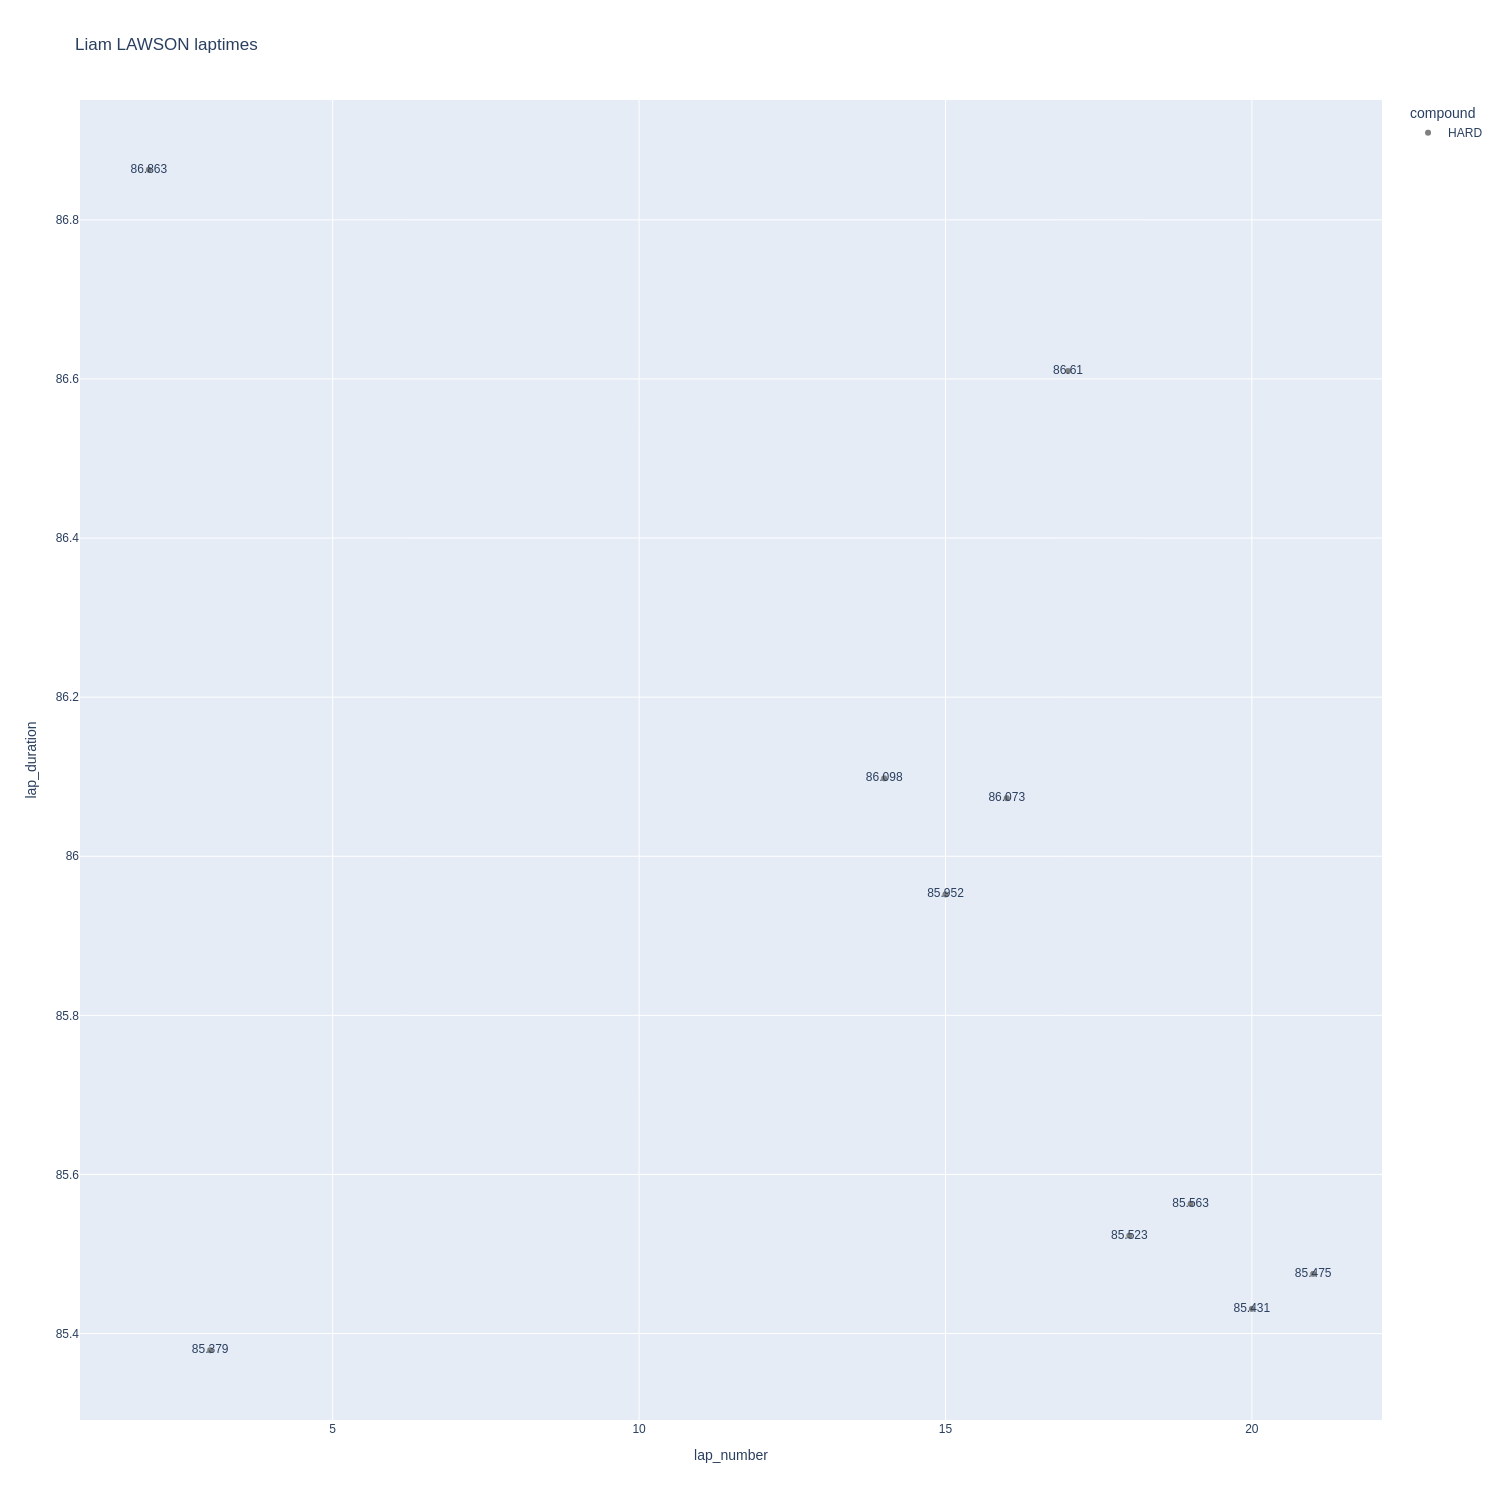

In [57]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

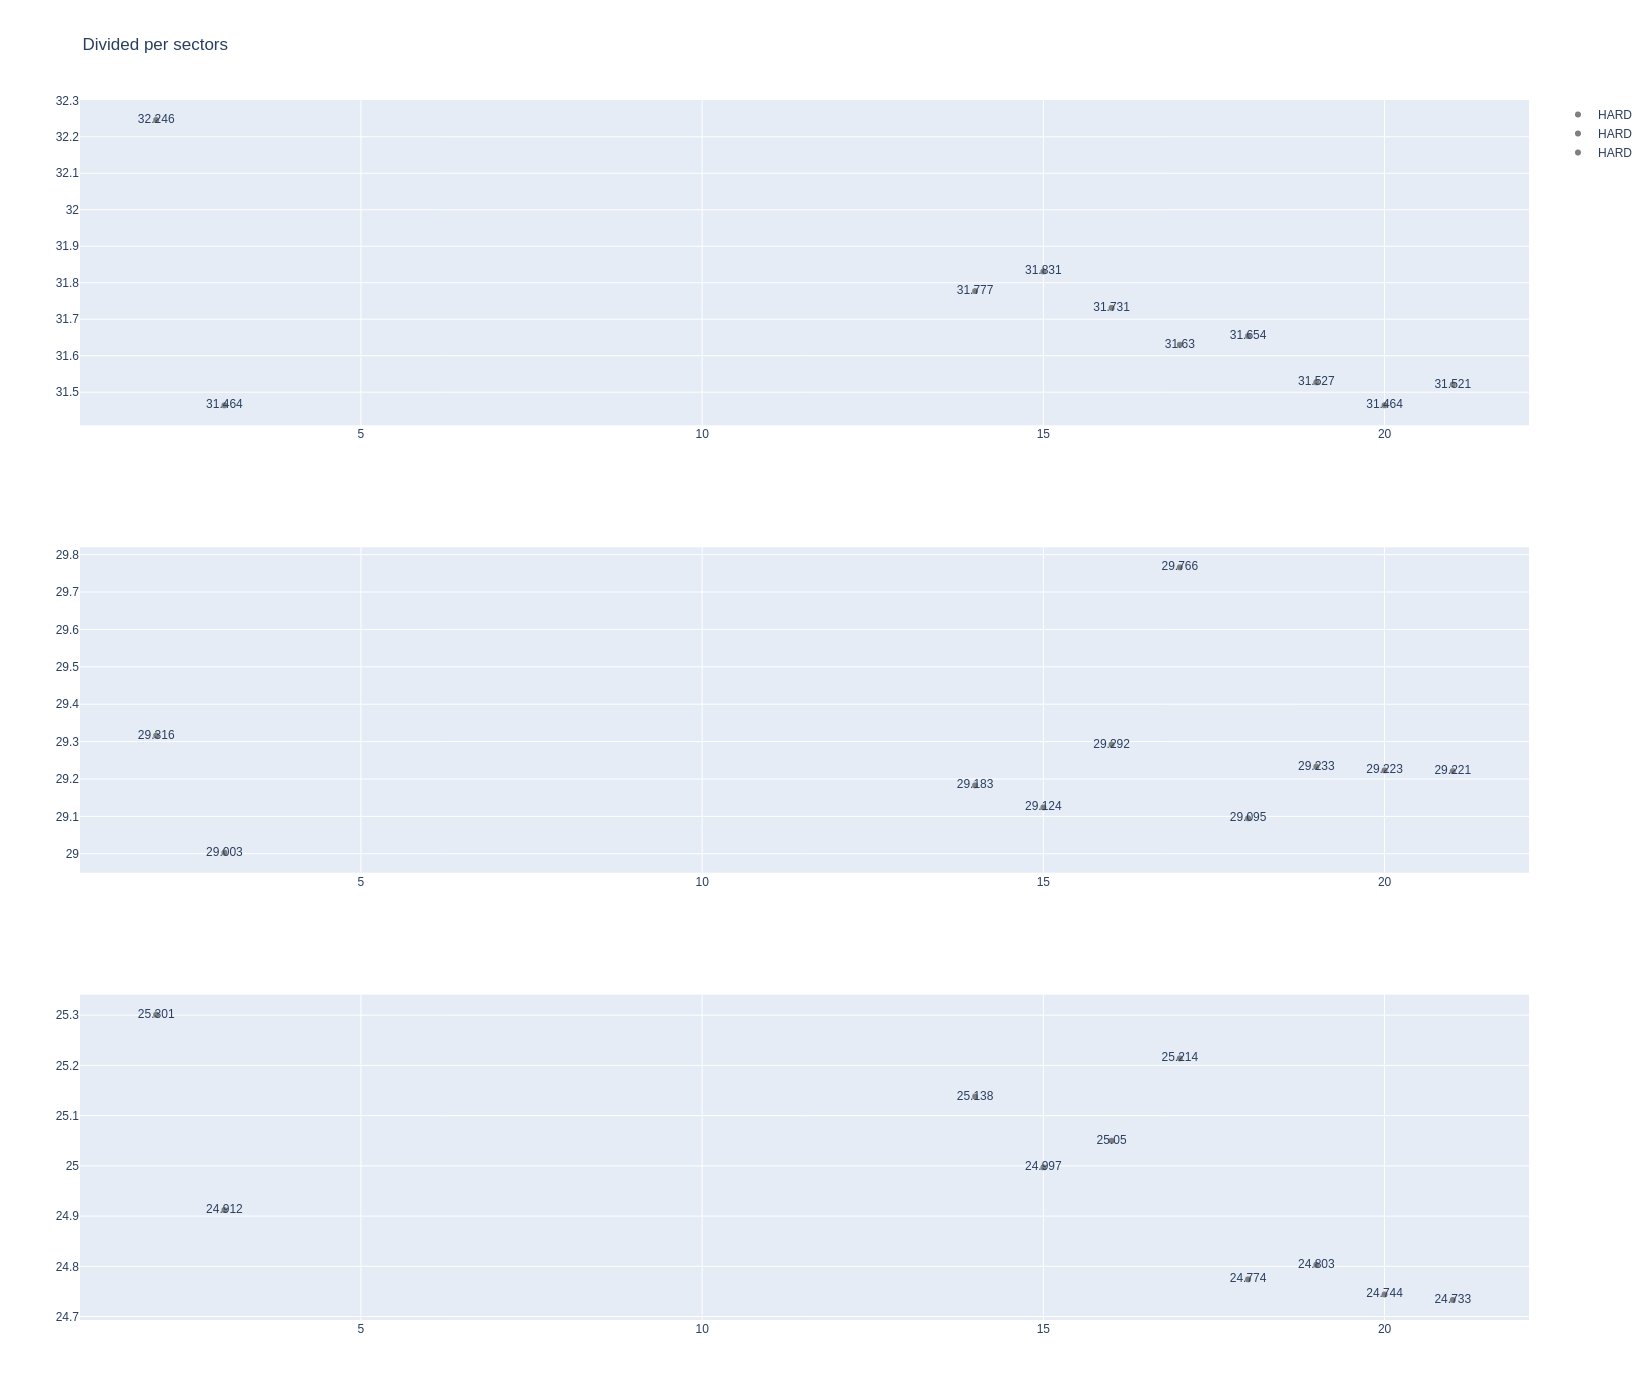

In [58]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [59]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
21   Isack HADJAR     HARD  2025-11-28T13:31:59.420000+00:00           2   
36   Isack HADJAR     HARD  2025-11-28T13:33:26.245000+00:00           3   
223  Isack HADJAR     HARD  2025-11-28T13:55:46.178000+00:00          13   
231  Isack HADJAR     HARD  2025-11-28T13:57:13.481000+00:00          14   
243  Isack HADJAR     HARD  2025-11-28T13:58:40.396000+00:00          15   
257  Isack HADJAR     HARD  2025-11-28T14:00:06.389000+00:00          16   
273  Isack HADJAR     HARD  2025-11-28T14:01:32.469000+00:00          17   
305  Isack HADJAR     HARD  2025-11-28T14:04:27.668000+00:00          19   
322  Isack HADJAR     HARD  2025-11-28T14:05:53.137000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
21              32.212             29.266             25.519        86.997  
36              31.263             28.963             25.104        85.330  
223             32.078             29.483             25.825        87.386  
231             31.929             29.264             25.647        86.840  
243             31.725             29.023             25.377        86.125  
257             31.739             29.063             25.206        86.008  
273             31.531             29.242             25.354        86.127  
305             31.500             29.021             25.002        85.523  
322             31.443             29.055             24.888        85.386

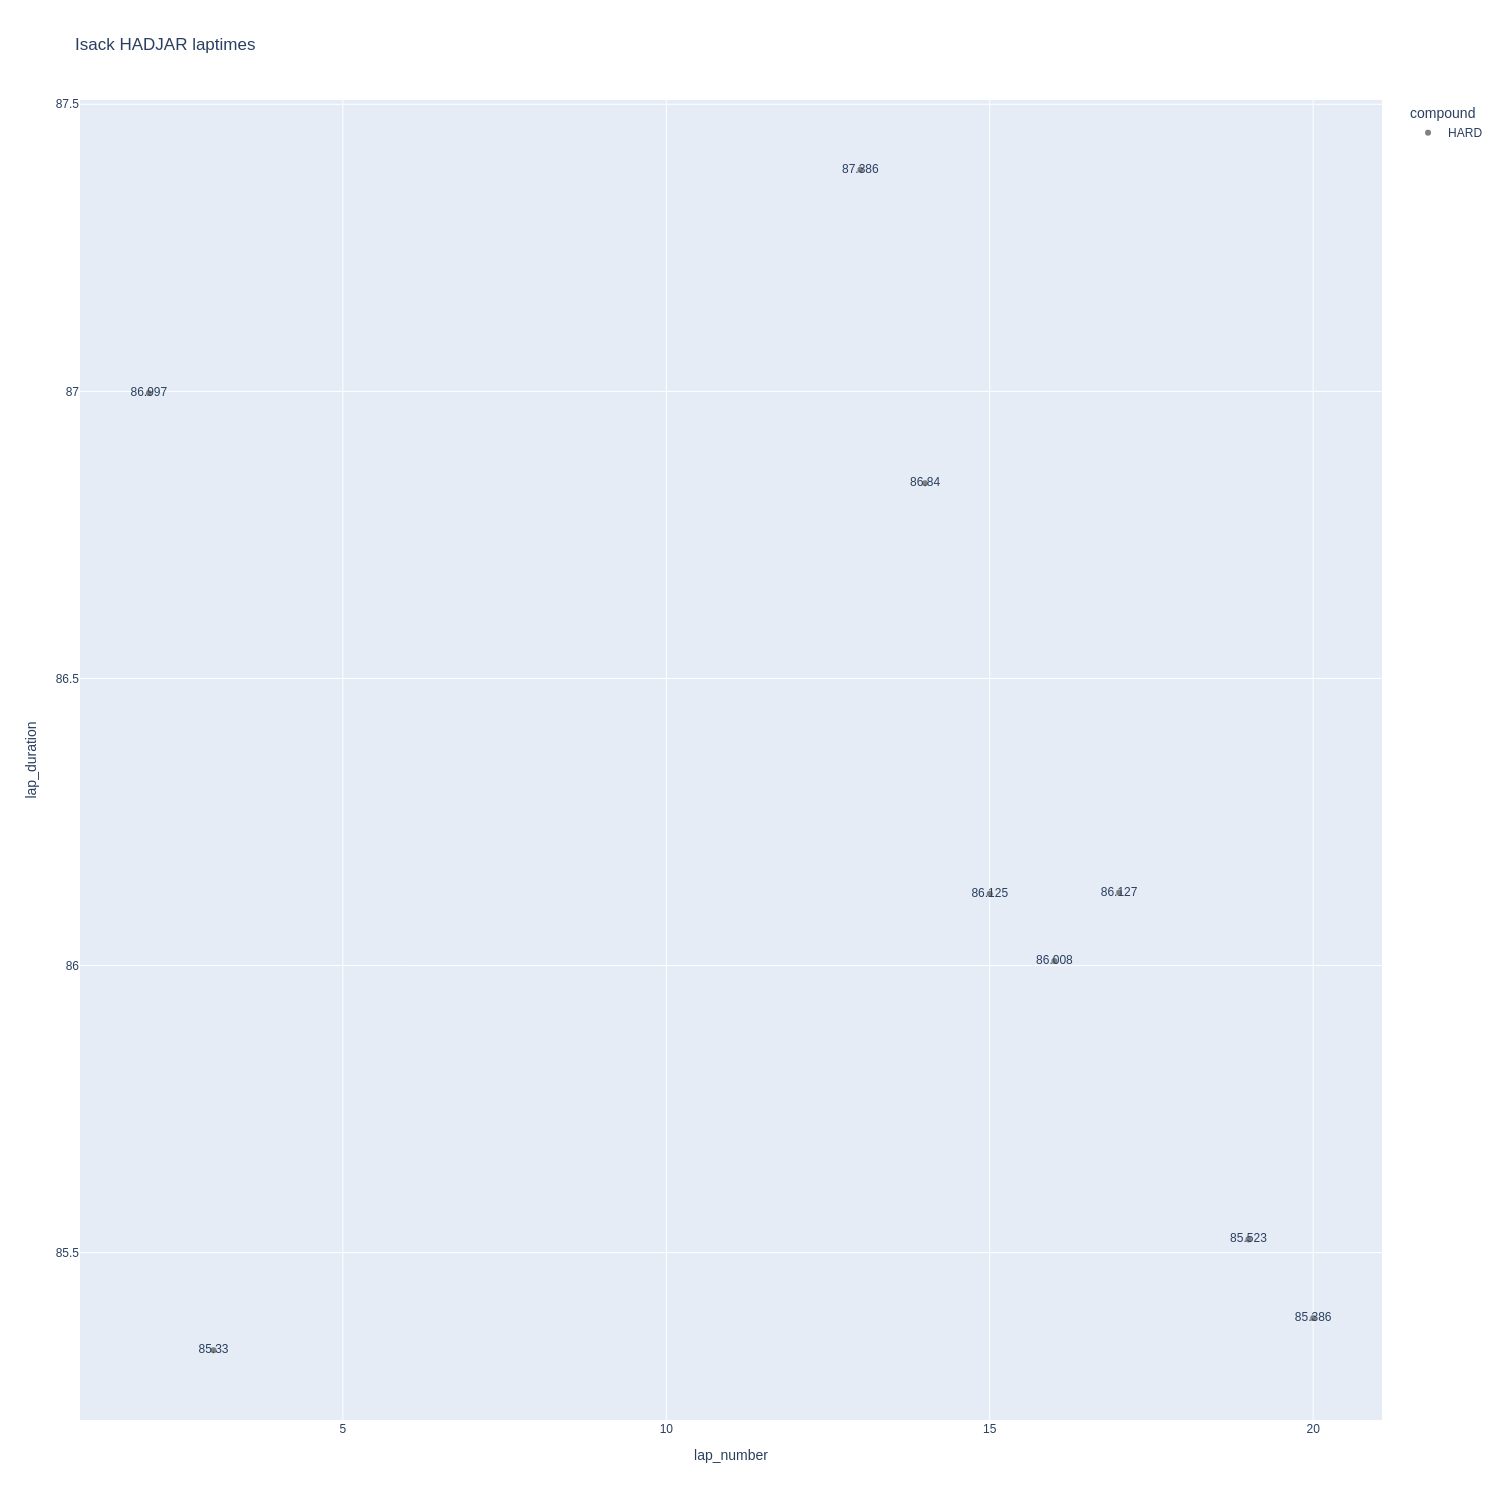

In [60]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

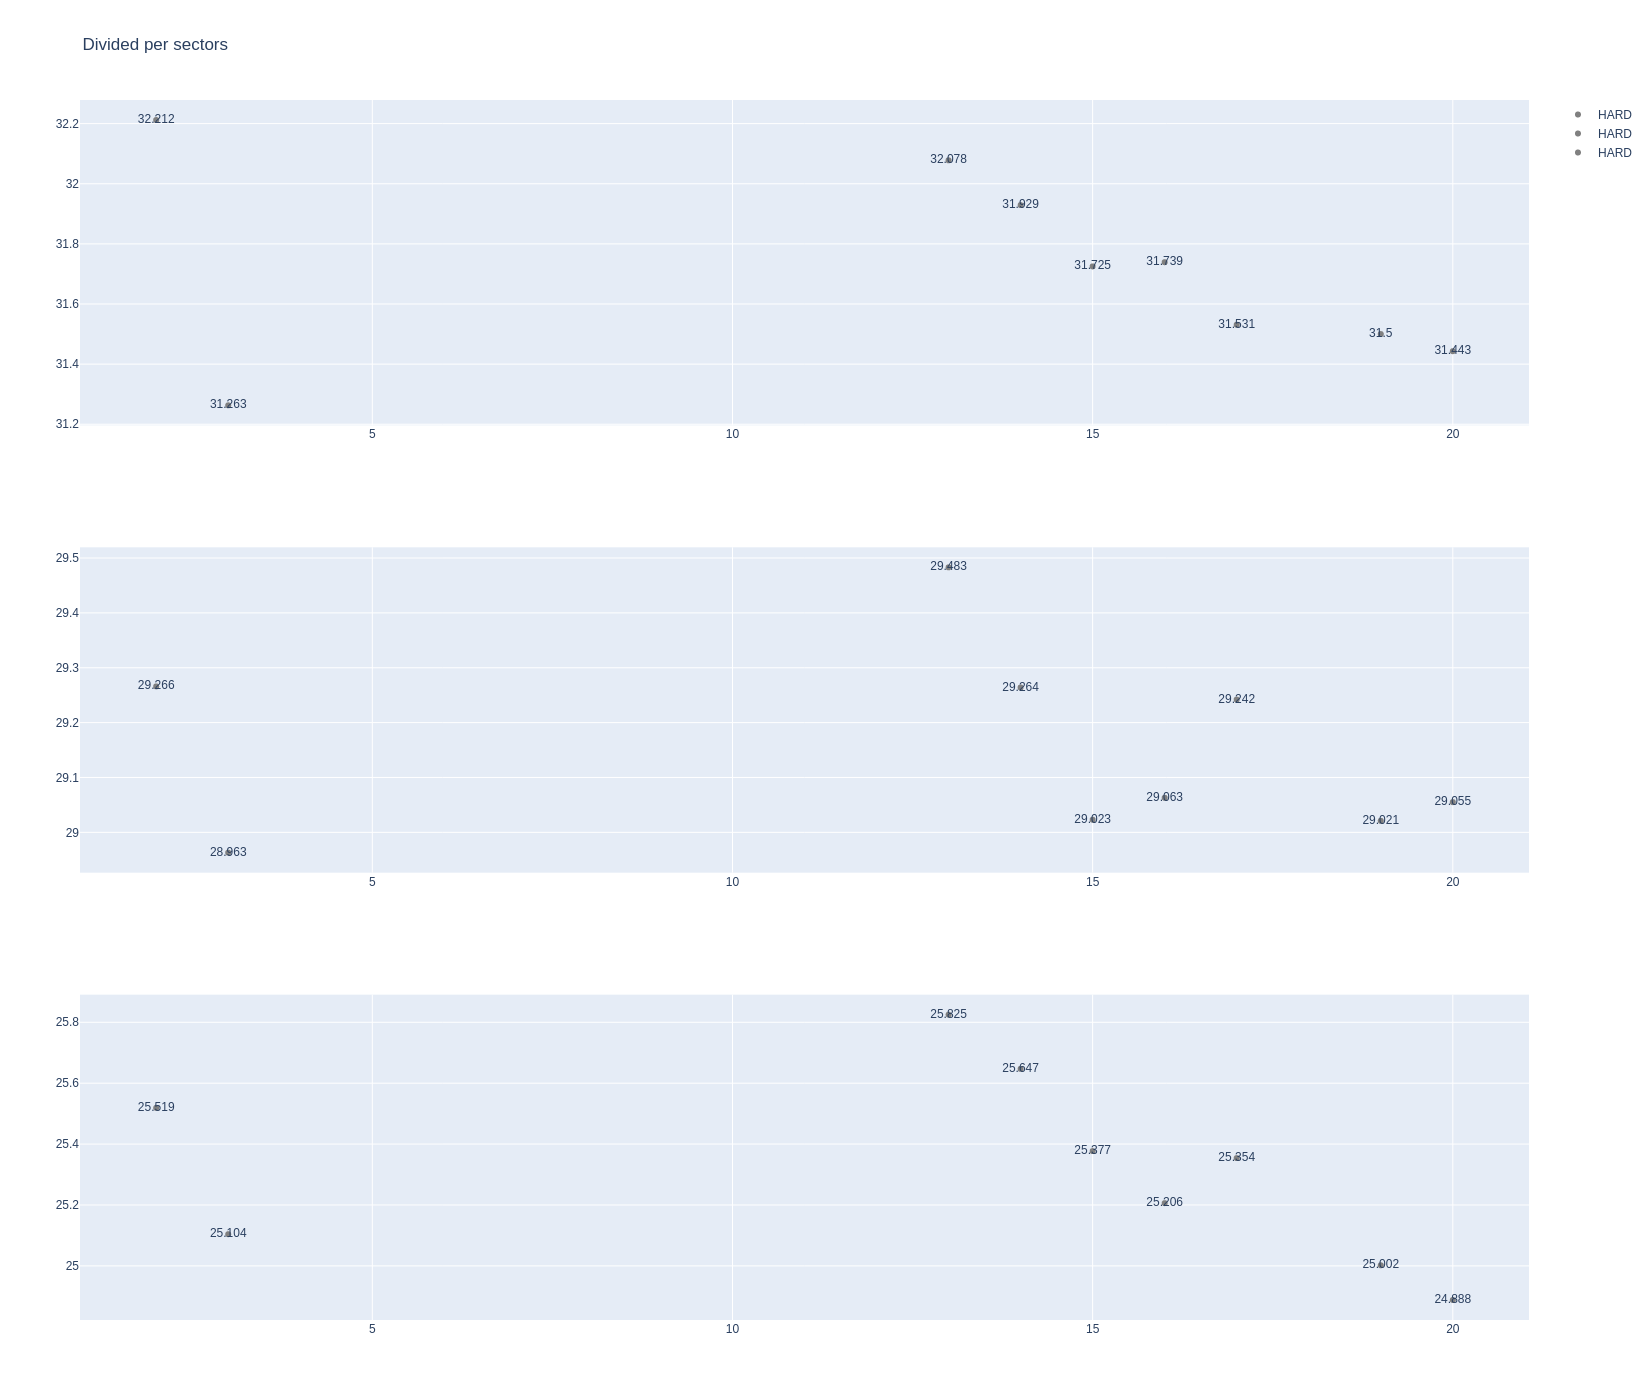

In [61]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [62]:
stintInformation.query('driver_number == 31 or driver_number == 87')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1275         9840             1             87          1        9   
15         1275         9840             1             31          1       10   
30         1275         9840             2             31         11       20   
31         1275         9840             2             87         10       16   
47         1275         9840             3             31         21       23   
48         1275         9840             3             87         17       19   
70         1275         9840             4             31         24       30   
71         1275         9840             4             87         20       26   

   compound  tyre_age_at_start  
10     HARD                  0  
15     HARD                  0  
30     HARD                 10  
31     HARD                  9  
47     SOFT                  0  
48     SOFT                  0  
70     SOFT                  3  
71     SOFT                  3

In [63]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
22   Esteban OCON     HARD  2025-11-28T13:32:09.007000+00:00           2   
38   Esteban OCON     HARD  2025-11-28T13:33:36.416000+00:00           3   
230  Esteban OCON     HARD  2025-11-28T13:56:35.483000+00:00          12   
240  Esteban OCON     HARD  2025-11-28T13:58:00.671000+00:00          13   
251  Esteban OCON     HARD  2025-11-28T13:59:26.494000+00:00          14   
265  Esteban OCON     HARD  2025-11-28T14:00:51.985000+00:00          15   
281  Esteban OCON     HARD  2025-11-28T14:02:17.464000+00:00          16   
298  Esteban OCON     HARD  2025-11-28T14:03:43.027000+00:00          17   
316  Esteban OCON     HARD  2025-11-28T14:05:09.168000+00:00          18   
331  Esteban OCON     HARD  2025-11-28T14:06:34.622000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
22              32.052             29.629             25.802        87.483  
38              31.247             28.990             25.143        85.380  
230             31.441             28.768             24.930        85.139  
240             31.752             28.939             25.140        85.831  
251             31.541             28.953             24.966        85.460  
265             31.556             28.924             24.892        85.372  
281             31.687             29.100             24.913        85.700  
298             31.769             29.107             25.320        86.196  
316             31.403             29.171             24.836        85.410  
331             31.339             29.065             24.924        85.328

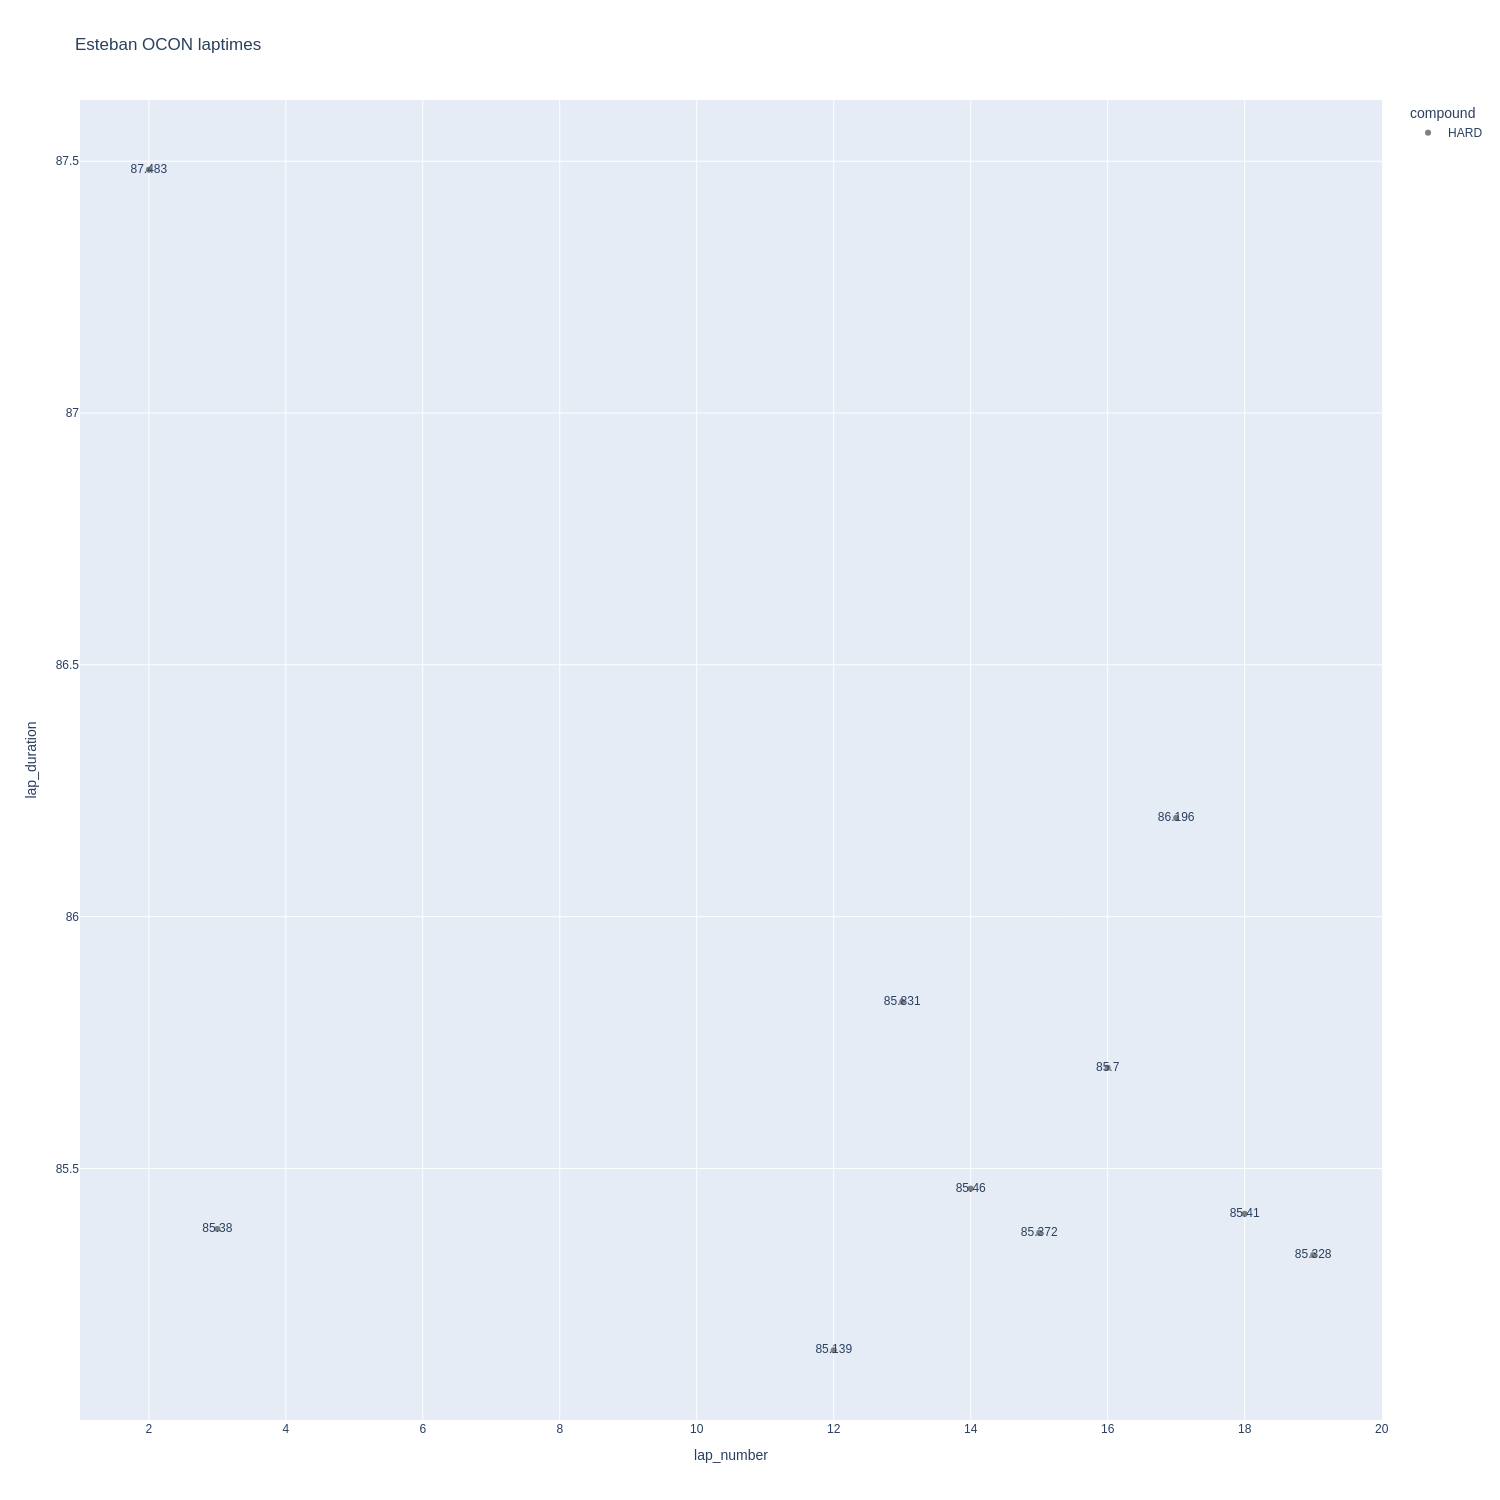

In [64]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

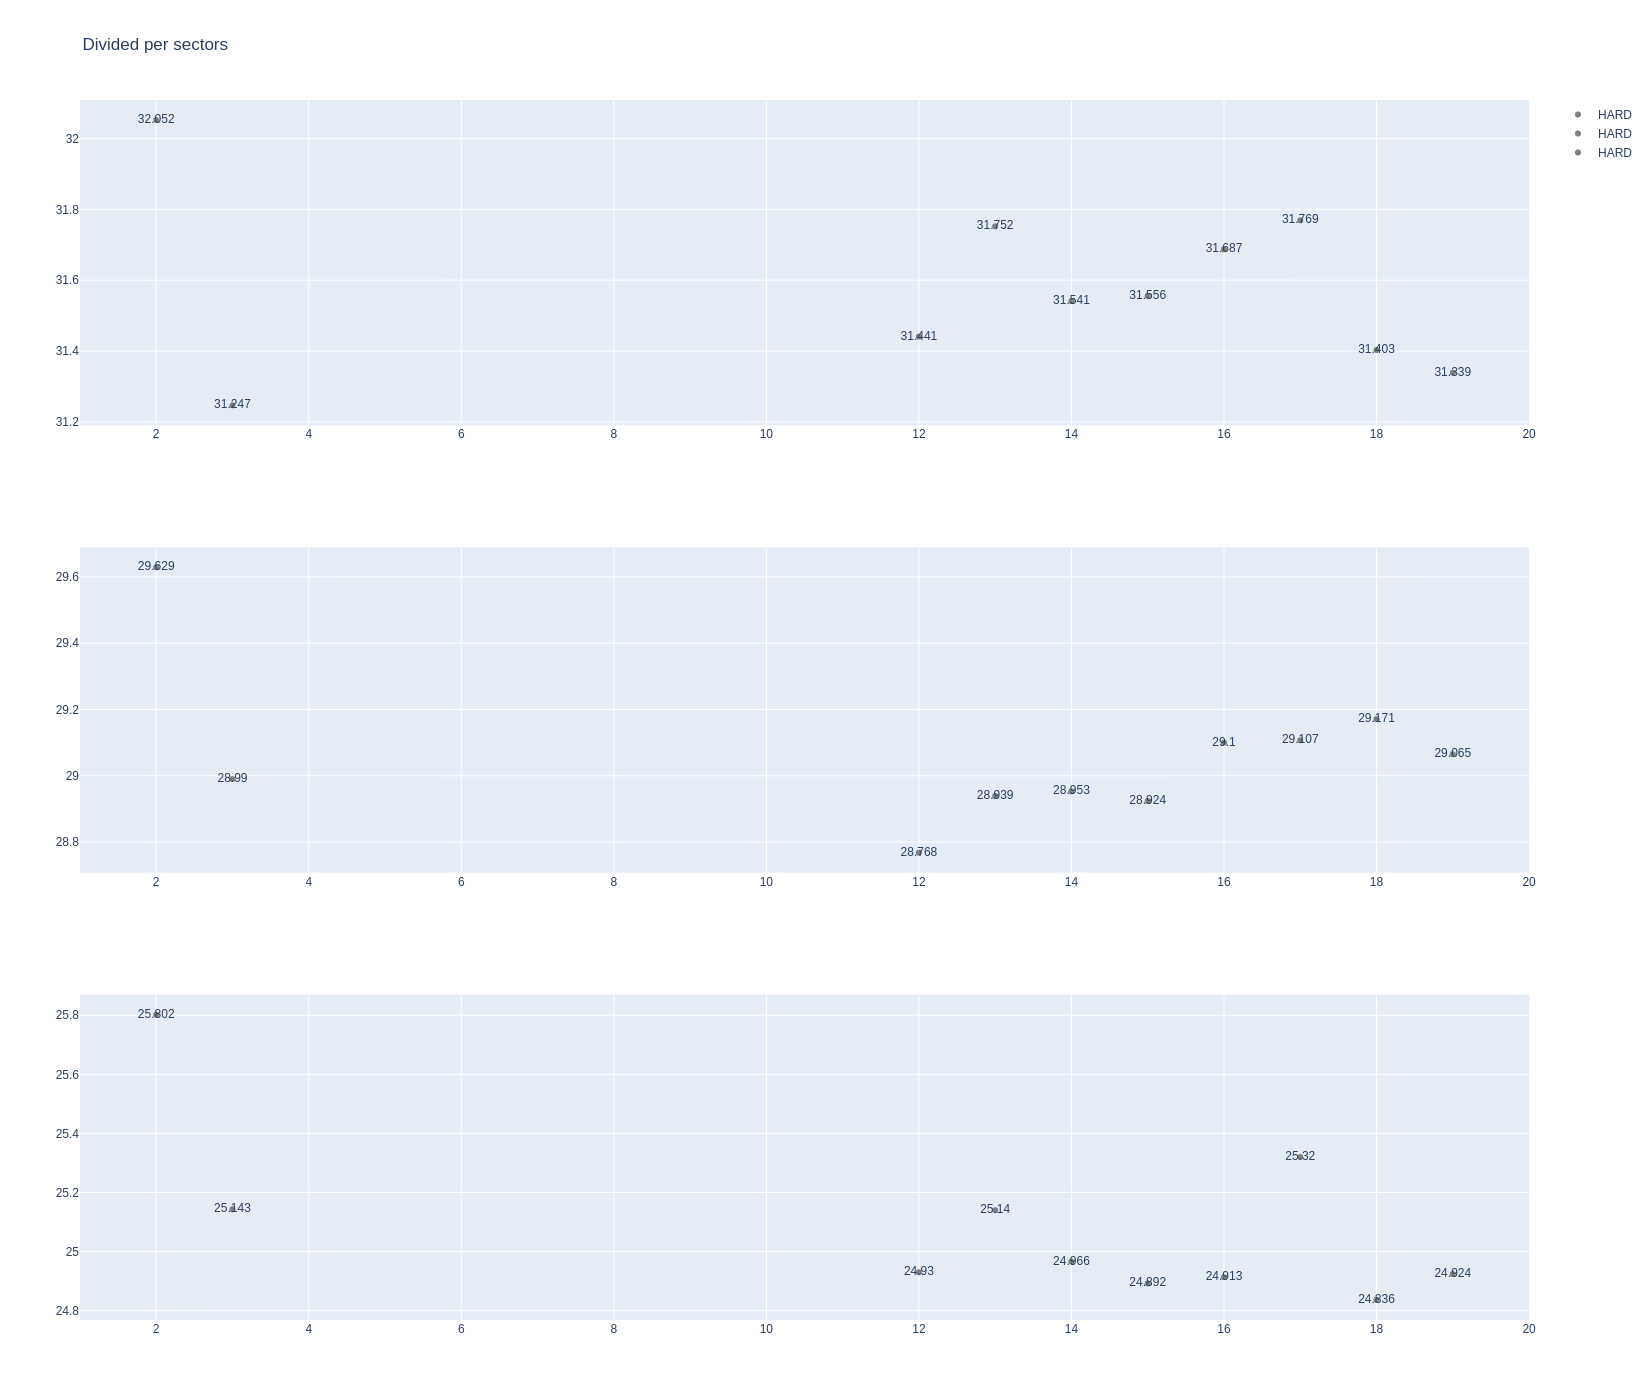

In [65]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [66]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
24   Oliver BEARMAN     HARD  2025-11-28T13:32:21.158000+00:00           2   
43   Oliver BEARMAN     HARD  2025-11-28T13:33:46.733000+00:00           3   
219  Oliver BEARMAN     HARD  2025-11-28T13:55:04.817000+00:00          11   
228  Oliver BEARMAN     HARD  2025-11-28T13:56:30.585000+00:00          12   
239  Oliver BEARMAN     HARD  2025-11-28T13:57:56.284000+00:00          13   
250  Oliver BEARMAN     HARD  2025-11-28T13:59:22.213000+00:00          14   
264  Oliver BEARMAN     HARD  2025-11-28T14:00:47.729000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
24              31.688             29.218             25.265        86.171  
43              31.351             29.369             25.092        85.812  
219             31.773             29.024             24.944        85.741  
228             31.503             29.023             25.131        85.657  
239             31.628             29.265             25.113        86.006  
250             31.550             29.116             24.869        85.535  
264             31.635             29.513             25.141        86.289

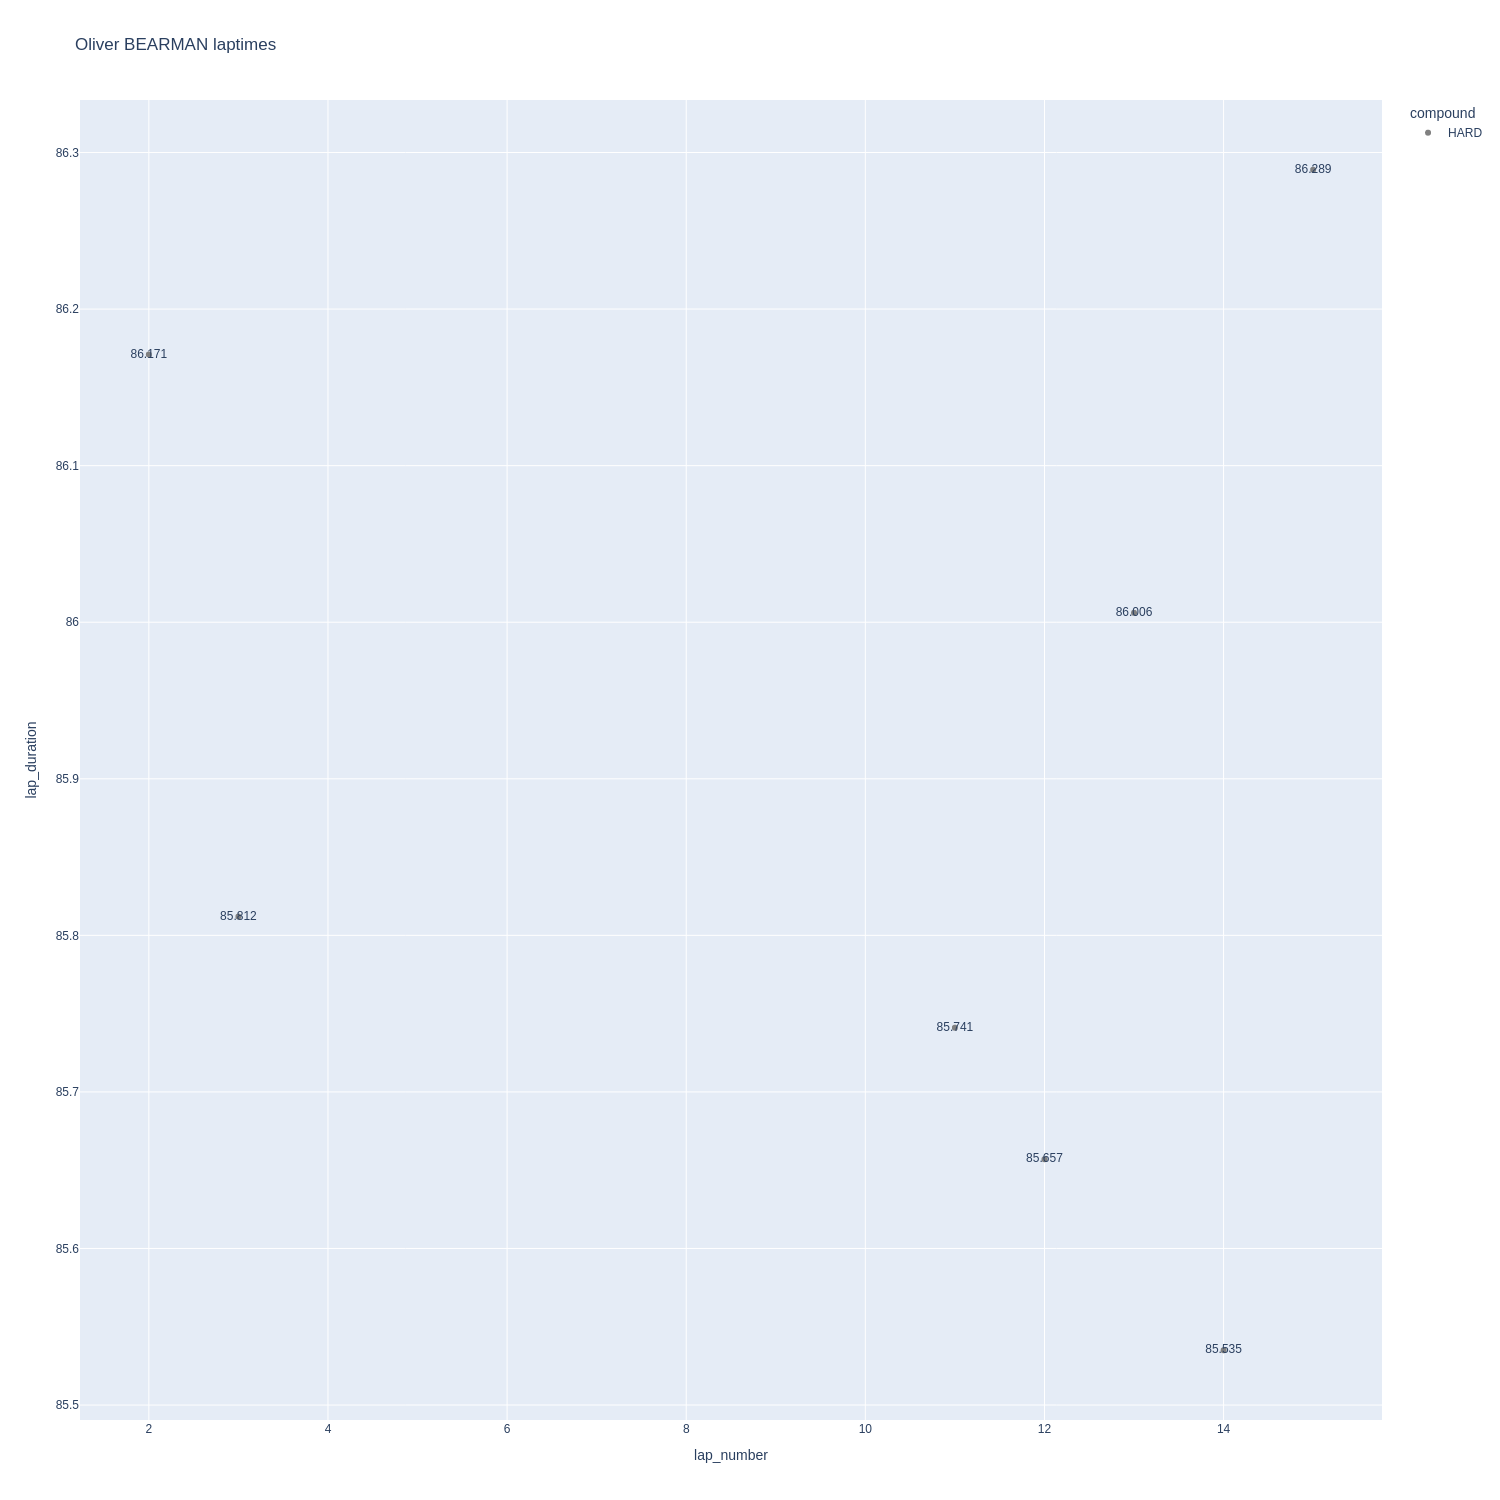

In [67]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

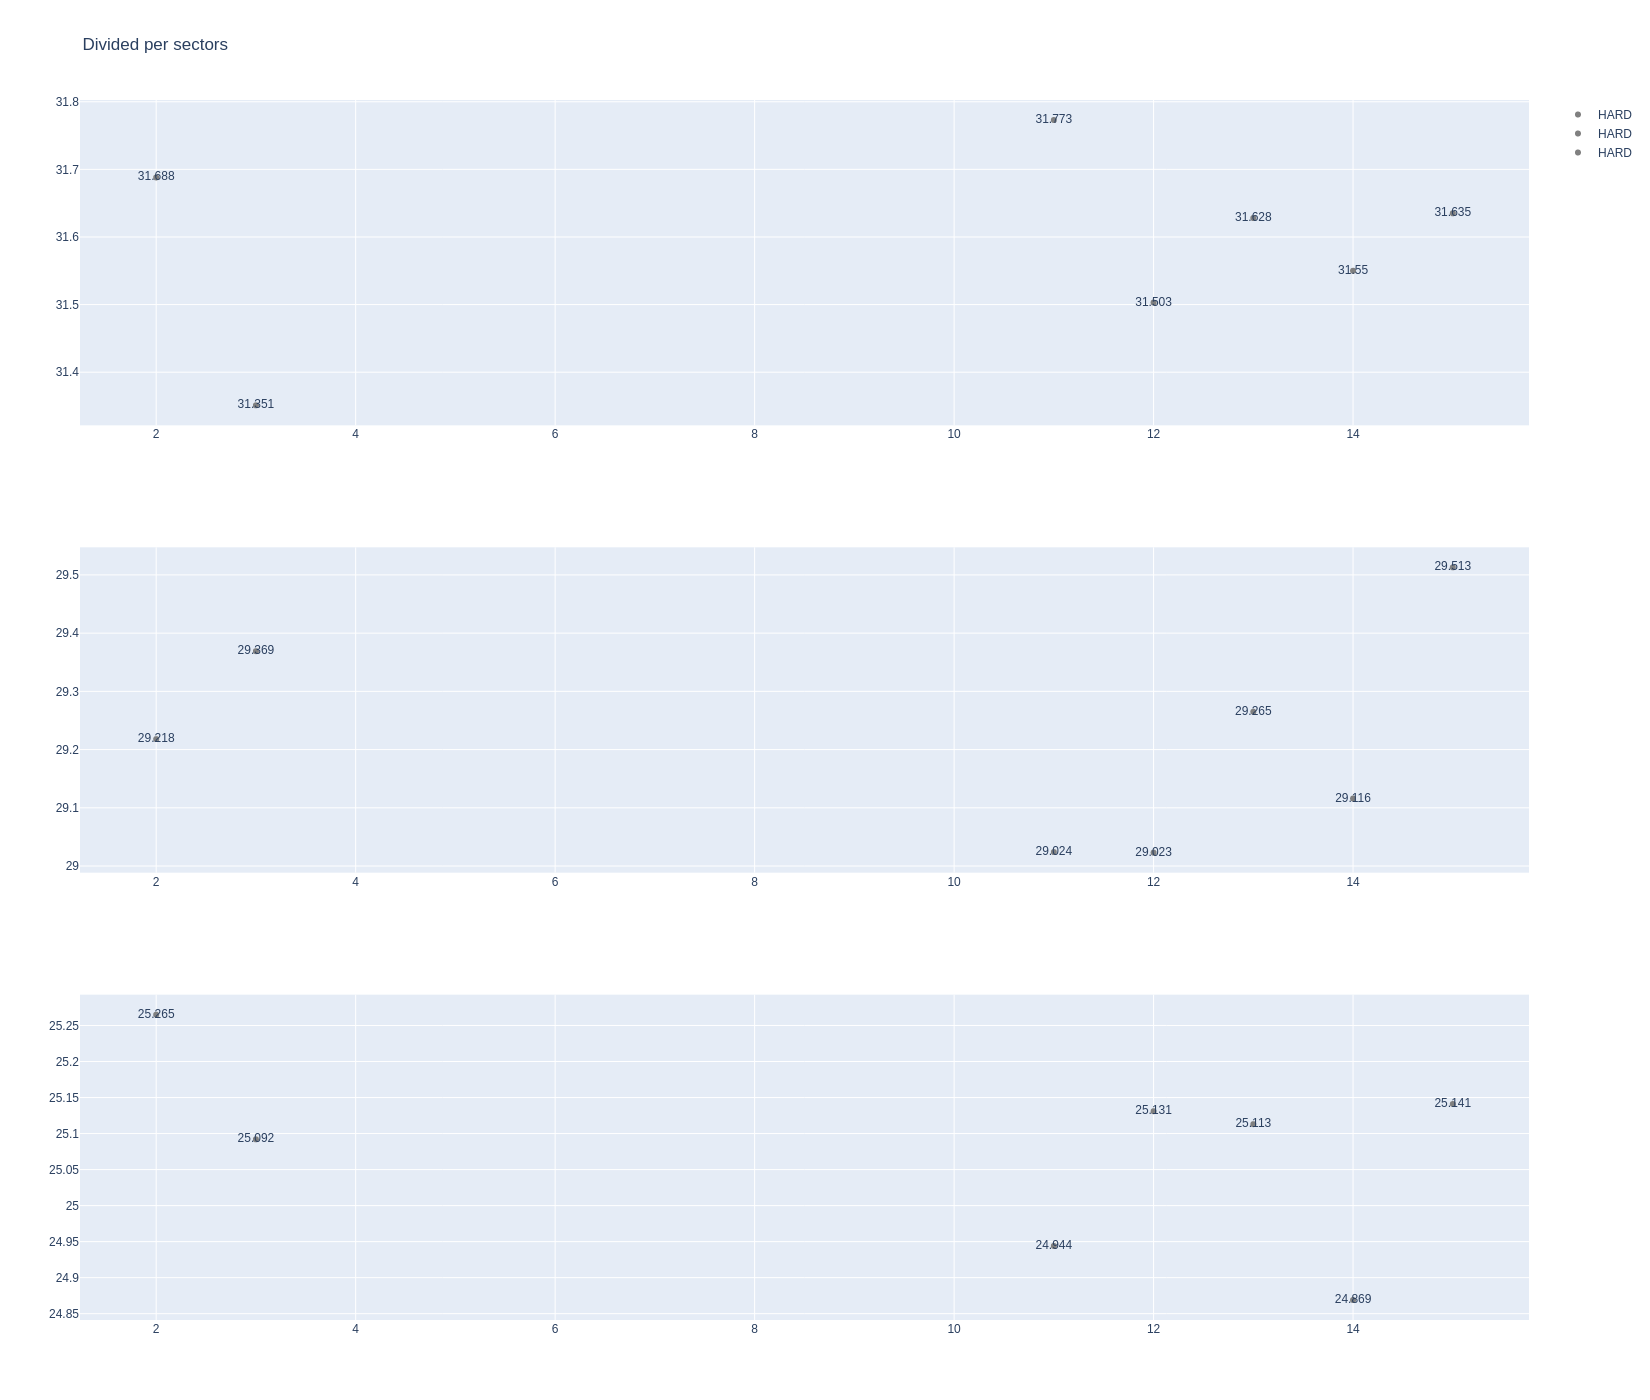

In [68]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [69]:
stintInformation.query('driver_number == 10 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
20         1275         9840             1             10          1       11   
24         1275         9840             1             43          1       11   
26         1275         9840             2             10         12       13   
38         1275         9840             3             10         14       17   
40         1275         9840             2             43         12       17   
61         1275         9840             4             10         18       22   
66         1275         9840             3             43         18       23   
69         1275         9840             5             10         23       25   
81         1275         9840             4             43         24       26   

   compound  tyre_age_at_start  
20     HARD                  0  
24     HARD                  0  
26     HARD                 11  
38     HARD                  0  
40     HARD                 11  
61     SOFT                  0  
66     SOFT                  0  
69     HARD                 17  
81     HARD                 17

In [70]:
data =libraryDataF1.getinfolongruns(jointables2,43,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
27   Franco COLAPINTO     HARD  2025-11-28T13:32:48.781000+00:00           2   
47   Franco COLAPINTO     HARD  2025-11-28T13:34:15.972000+00:00           3   
319  Franco COLAPINTO     HARD  2025-11-28T14:05:31.152000+00:00          14   
335  Franco COLAPINTO     HARD  2025-11-28T14:06:57.356000+00:00          15   
351  Franco COLAPINTO     HARD  2025-11-28T14:08:22.628000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
27              32.050             29.585             25.737        87.372  
47              31.332             29.392             24.975        85.699  
319             32.184             29.091             24.925        86.200  
335             31.500             29.029             24.762        85.291  
351             31.407             29.148             25.743        86.298

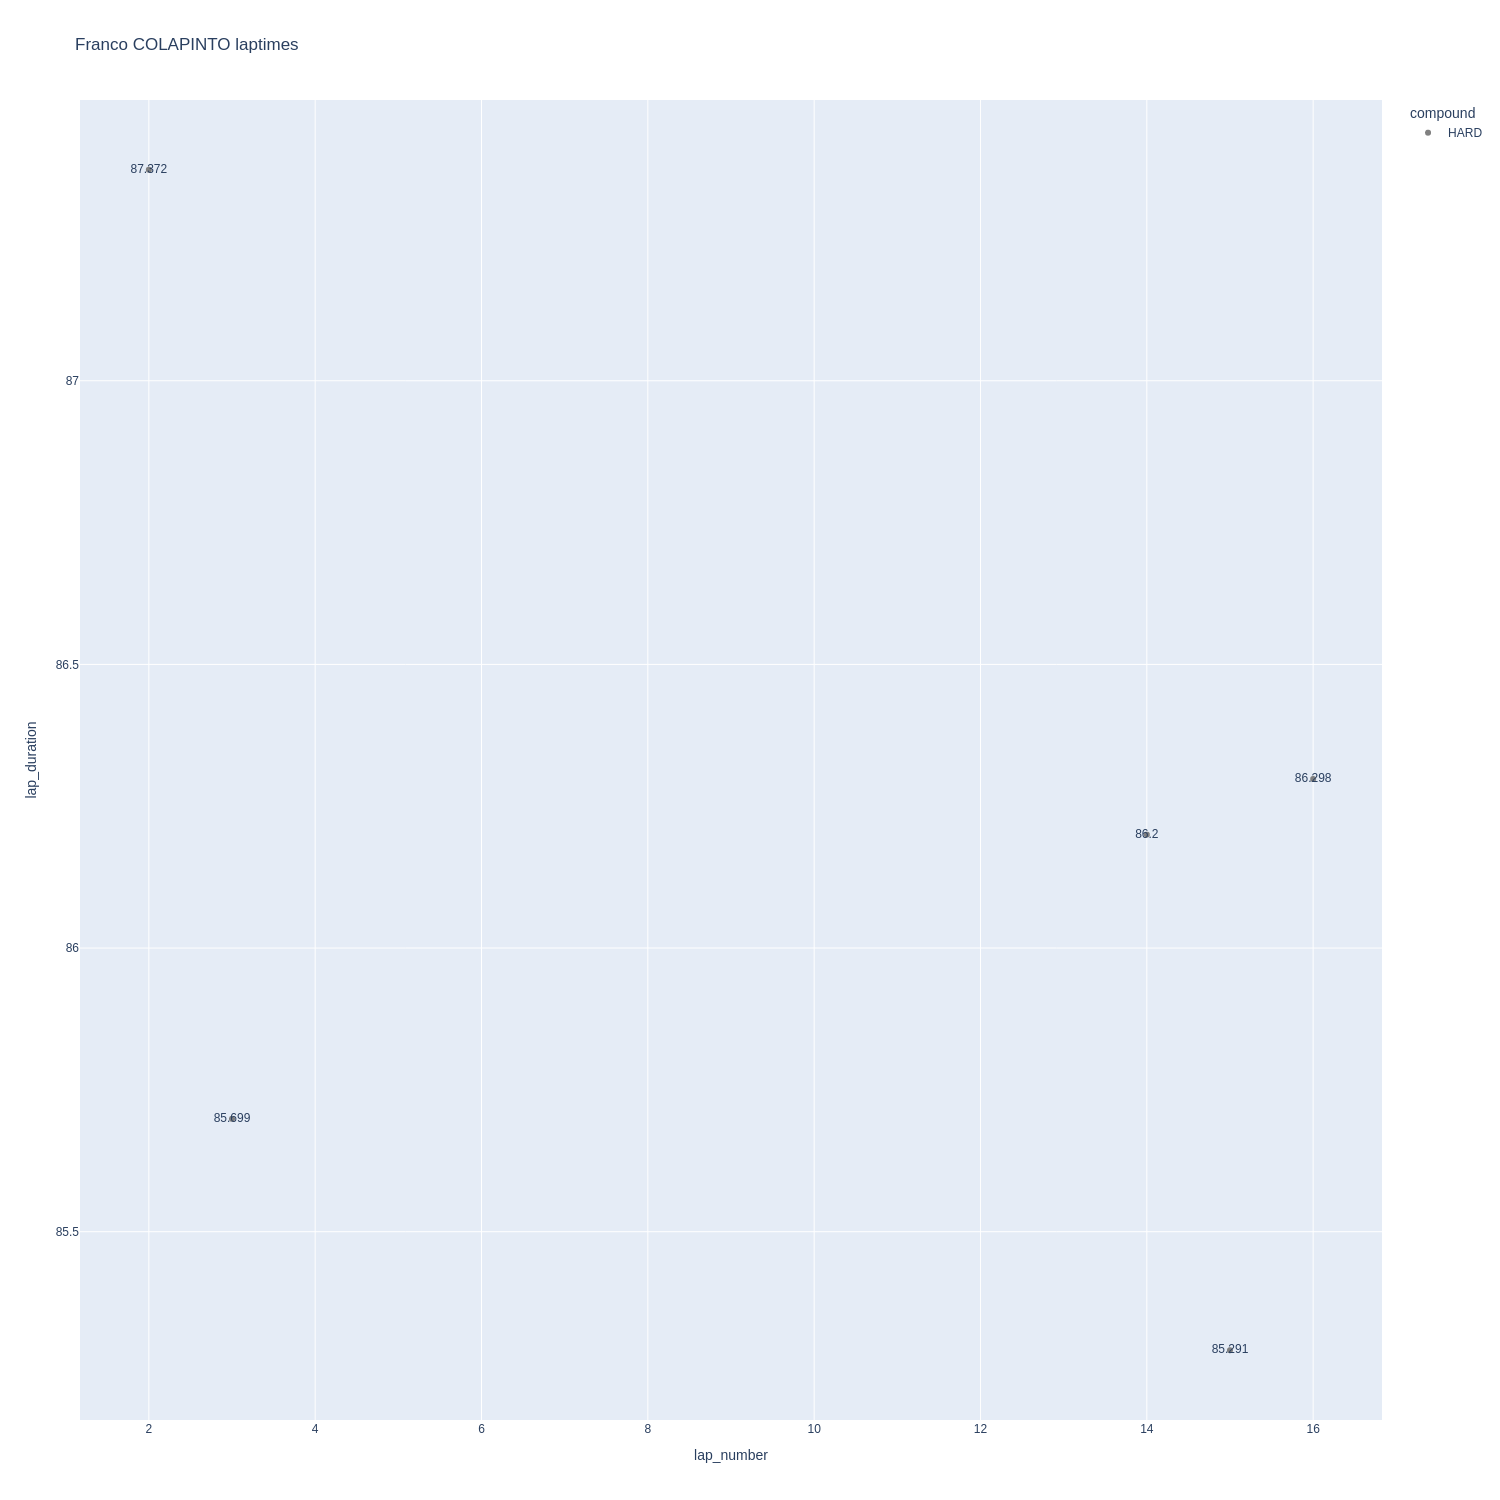

In [71]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

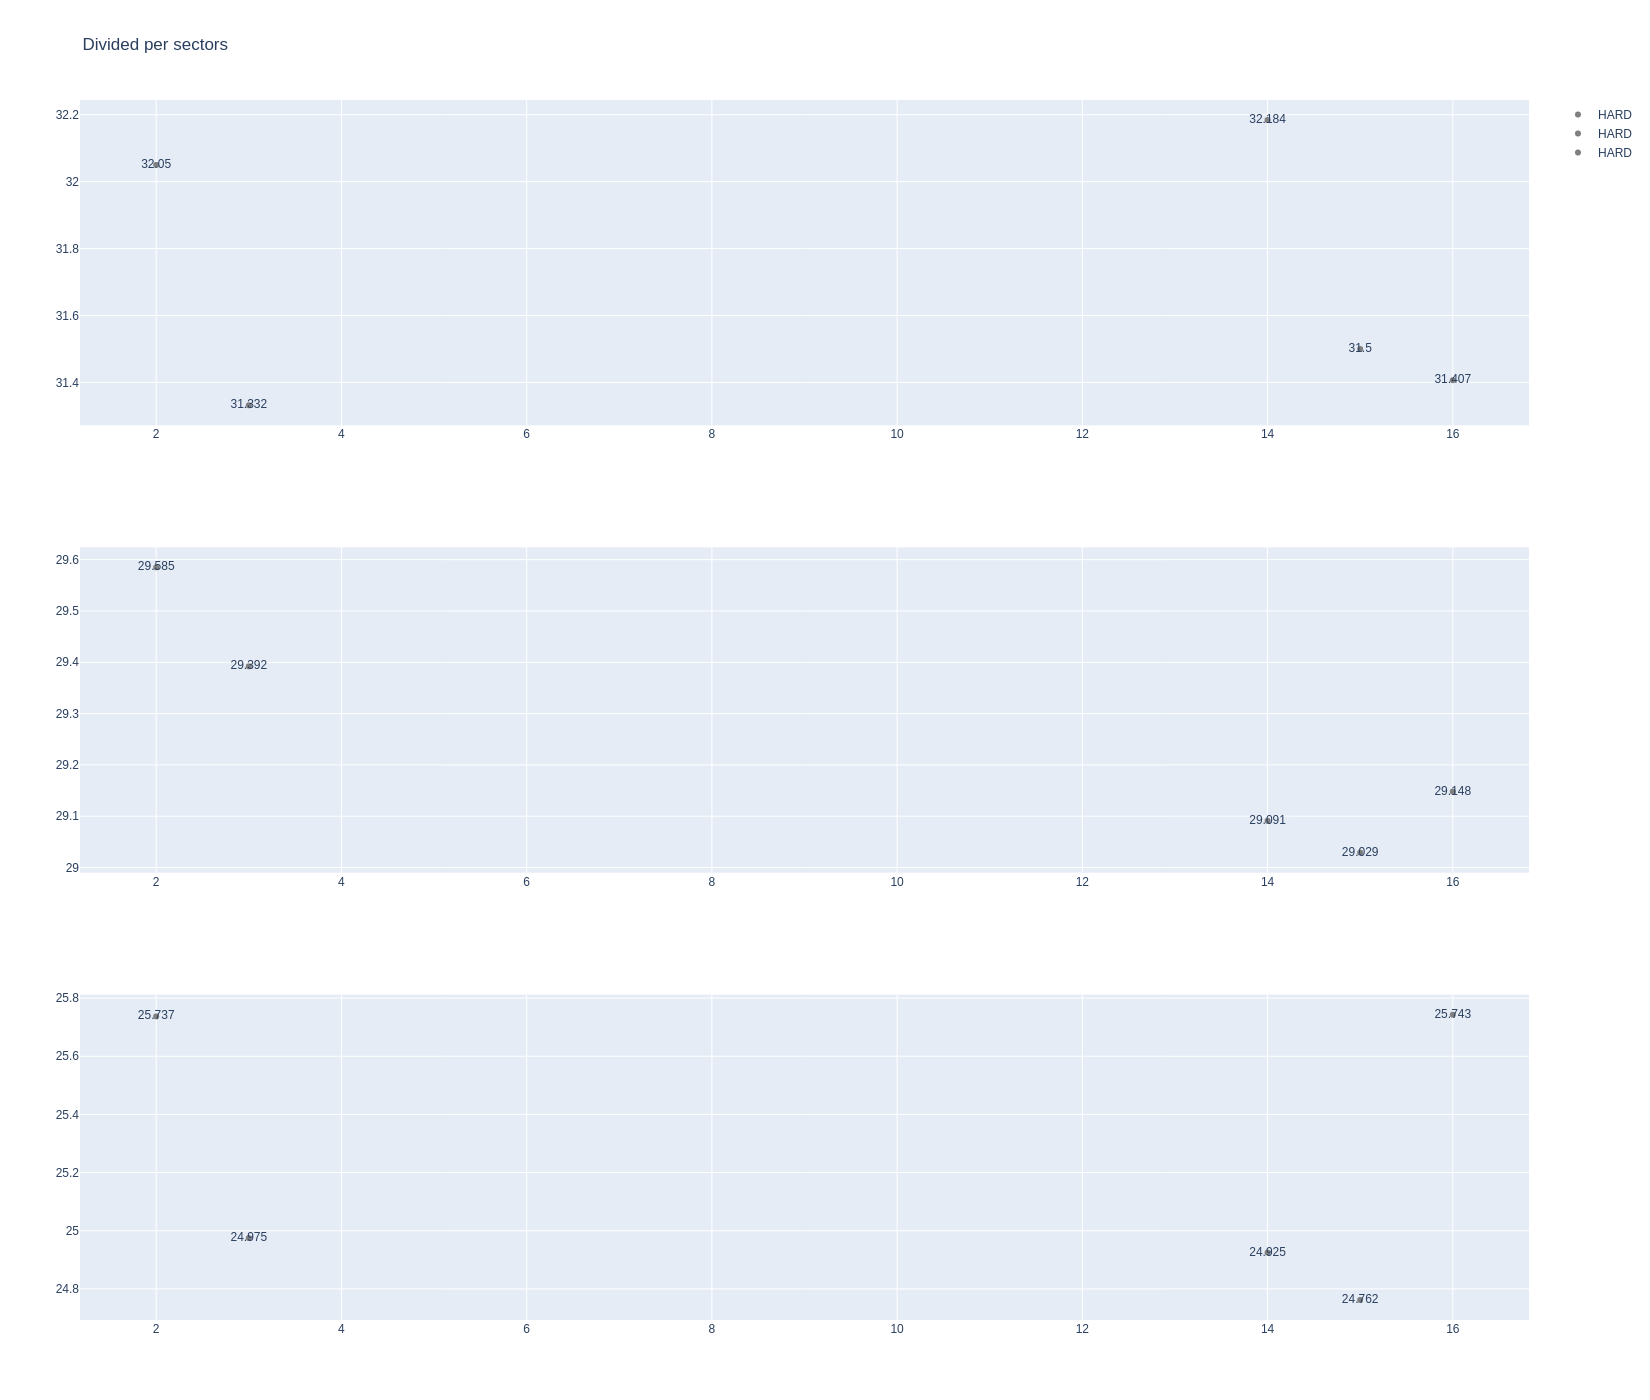

In [72]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [73]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
49   Pierre GASLY     HARD  2025-11-28T13:34:31.909000+00:00           3   
311  Pierre GASLY     HARD  2025-11-28T14:04:48.371000+00:00          15   
327  Pierre GASLY     HARD  2025-11-28T14:06:13.668000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
49              31.365             28.958             24.786        85.109  
311             31.509             29.149             24.720        85.378  
327             31.539             28.985             24.663        85.187

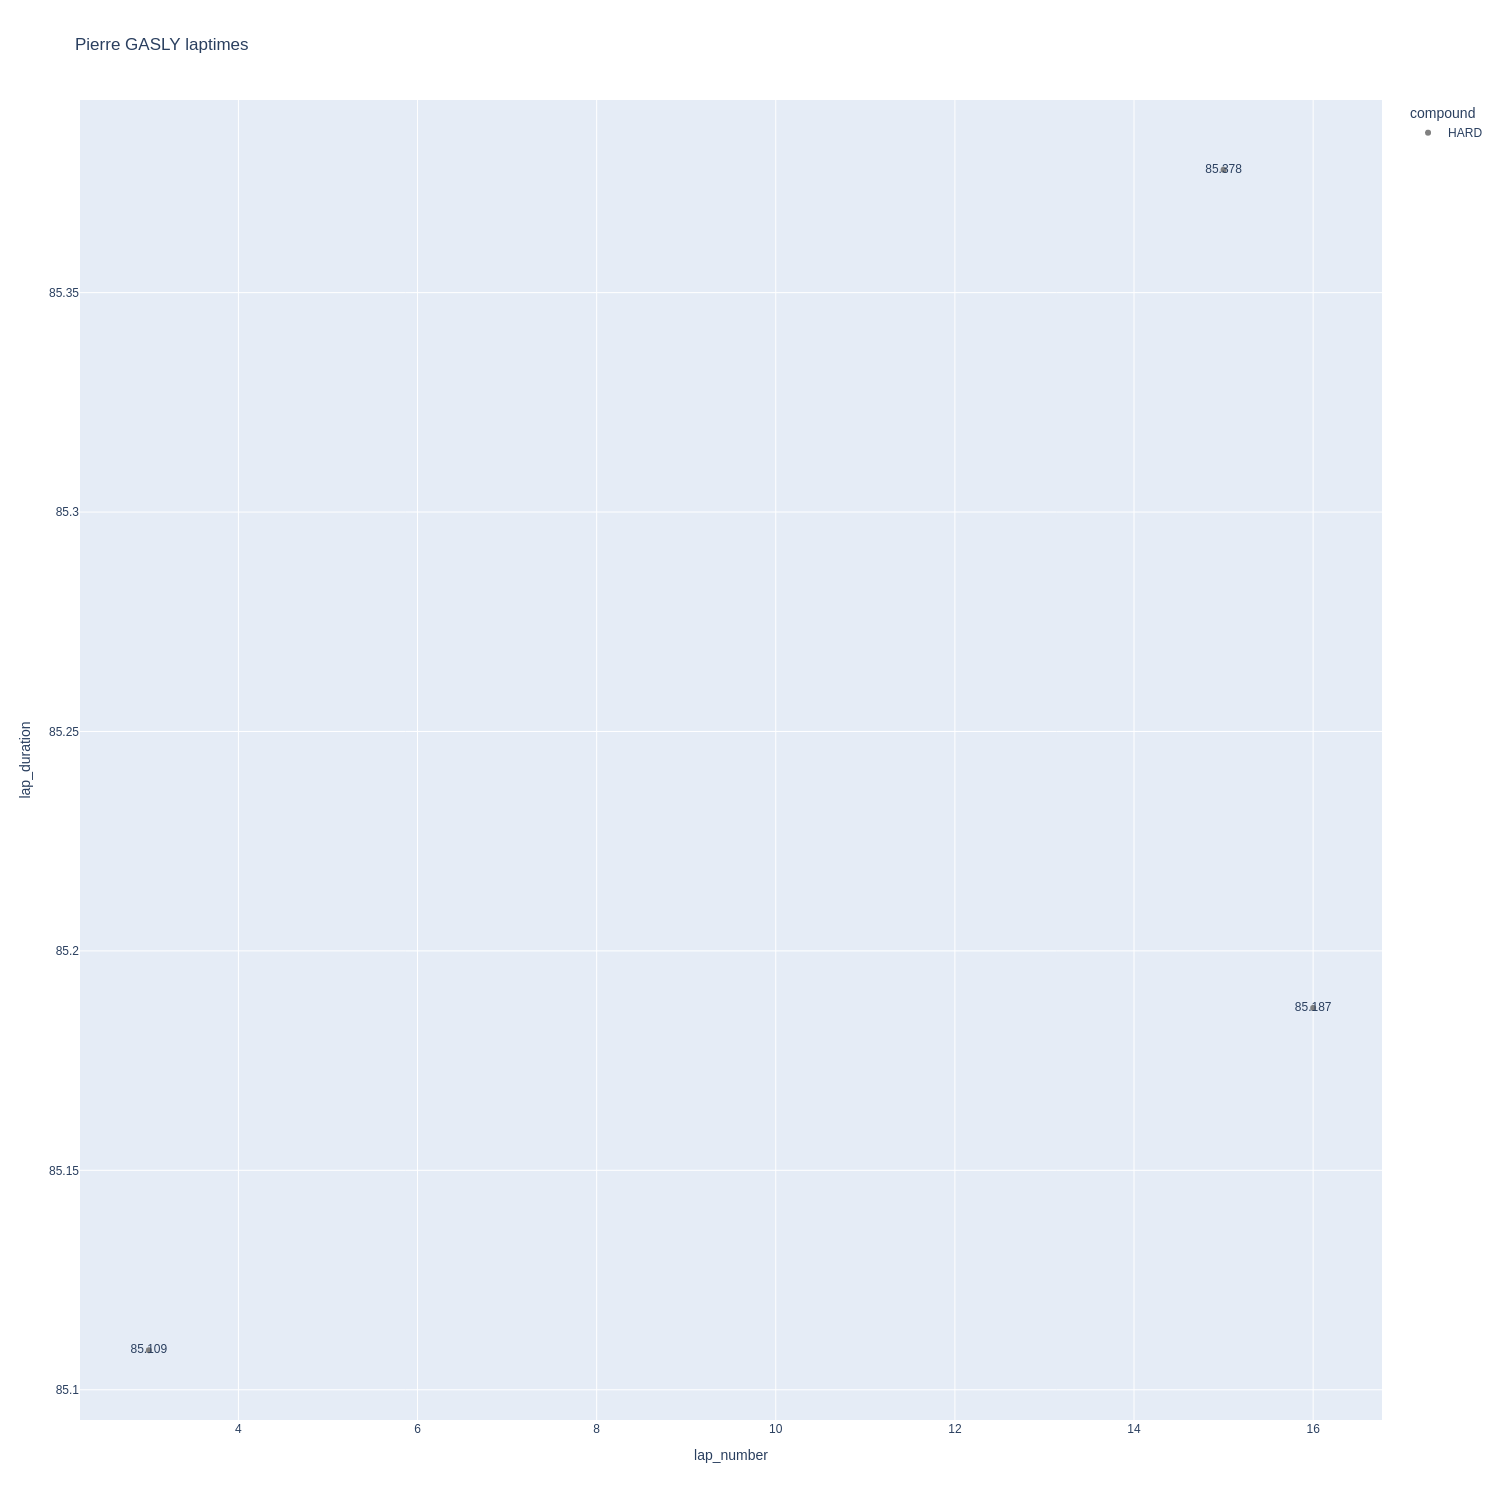

In [74]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

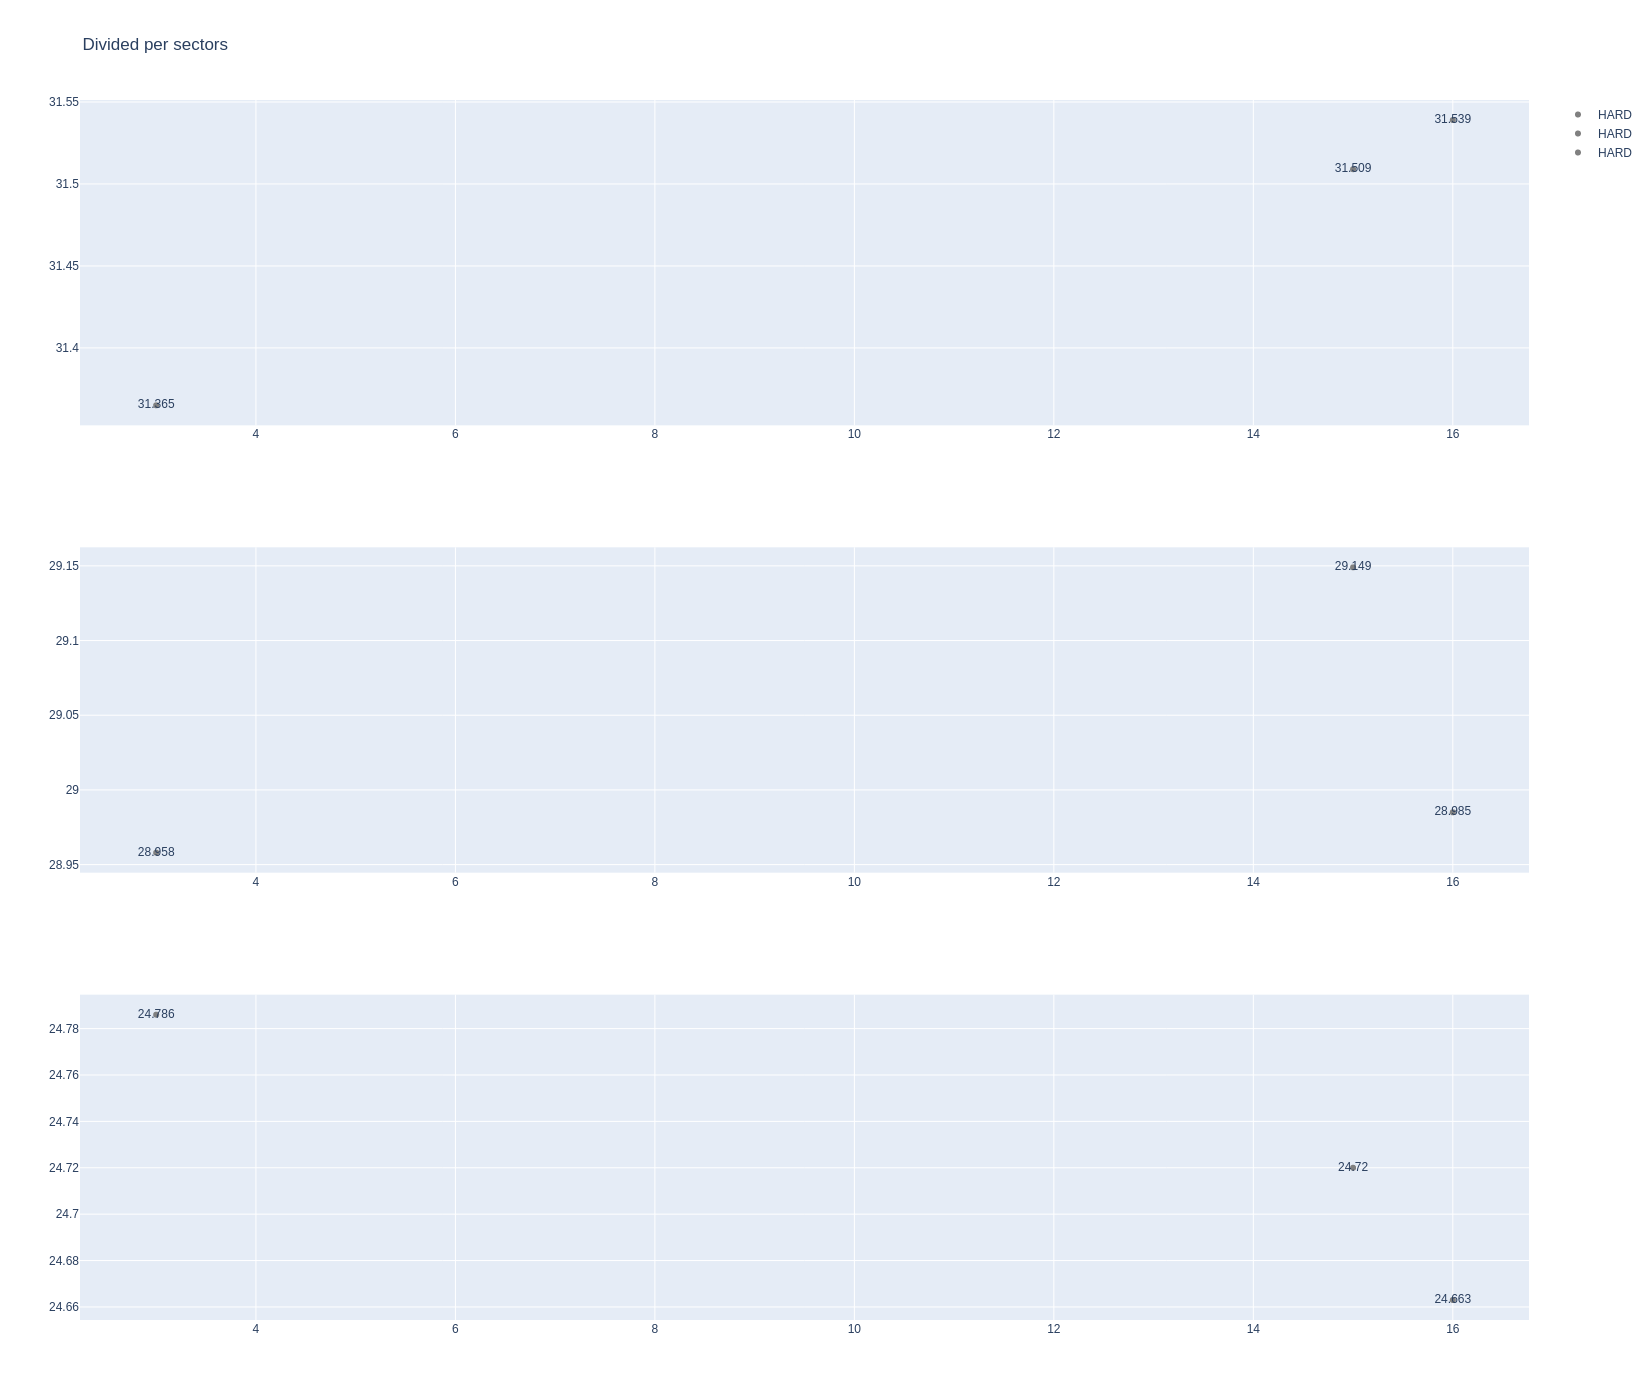

In [75]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [76]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4          1275         9840             1             23          1        7   
6          1275         9840             1             55          1        9   
27         1275         9840             2             23          8       13   
32         1275         9840             2             55         10       13   
36         1275         9840             3             55         14       14   
39         1275         9840             3             23         14       21   
55         1275         9840             4             55         15       17   
57         1275         9840             5             55         18       20   
62         1275         9840             4             23         22       26   
68         1275         9840             5             23         27       29   

   compound  tyre_age_at_start  
4      HARD                  0  
6      HARD                  0  
27     HARD                  7  
32     HARD                  9  
36     HARD                 13  
39     HARD                 13  
55     SOFT                  0  
57     SOFT                  3  
62     SOFT                  0  
68     HARD                 21

In [77]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
62   Alexander ALBON     HARD  2025-11-28T13:35:17.833000+00:00           3   
213  Alexander ALBON     HARD  2025-11-28T13:54:10.156000+00:00          13   
312  Alexander ALBON     HARD  2025-11-28T14:04:51.090000+00:00          15   
344  Alexander ALBON     HARD  2025-11-28T14:07:43.126000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
62              31.409             28.792             25.004        85.205  
213             30.350             28.092             29.455        87.897  
312             31.283             28.877             27.058        87.218  
344             31.319             28.891             24.926        85.136

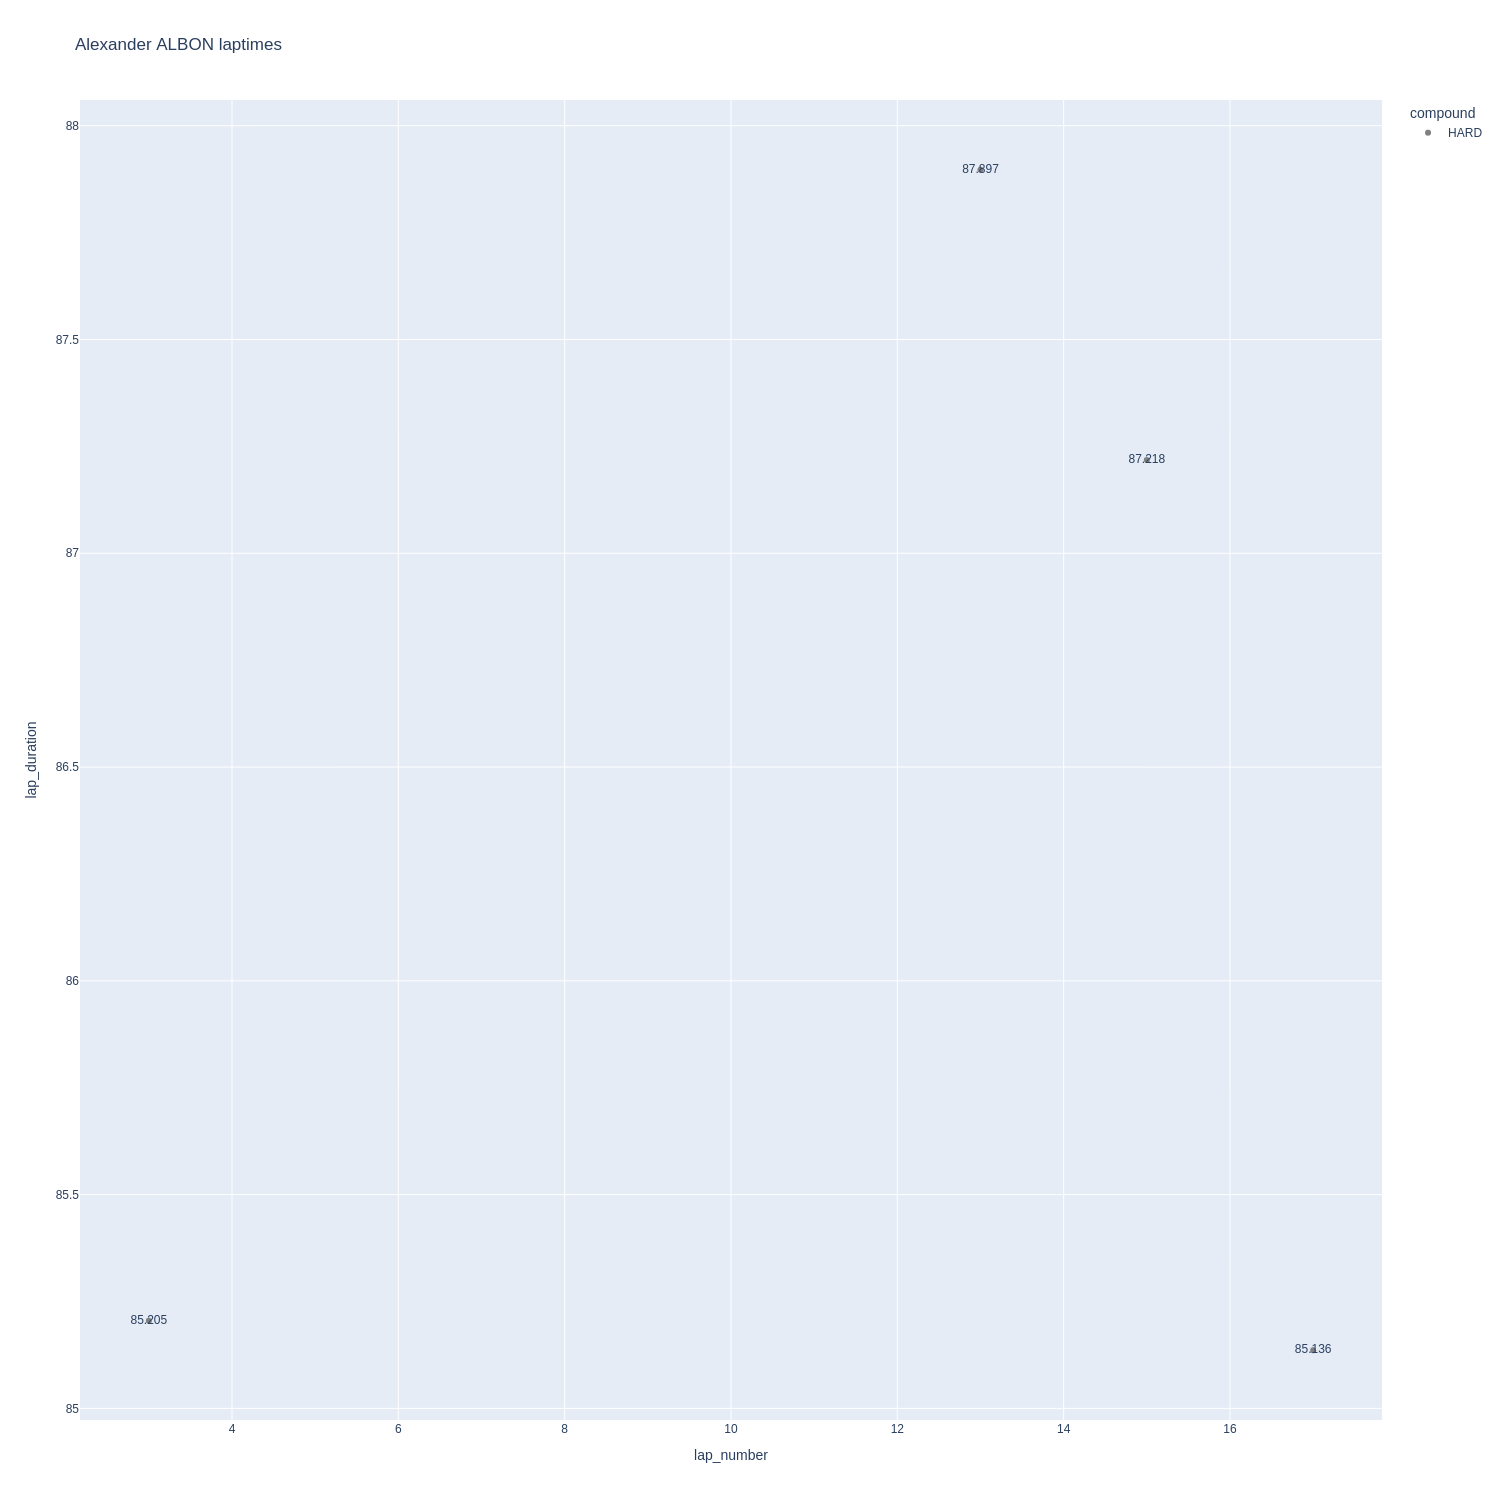

In [78]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

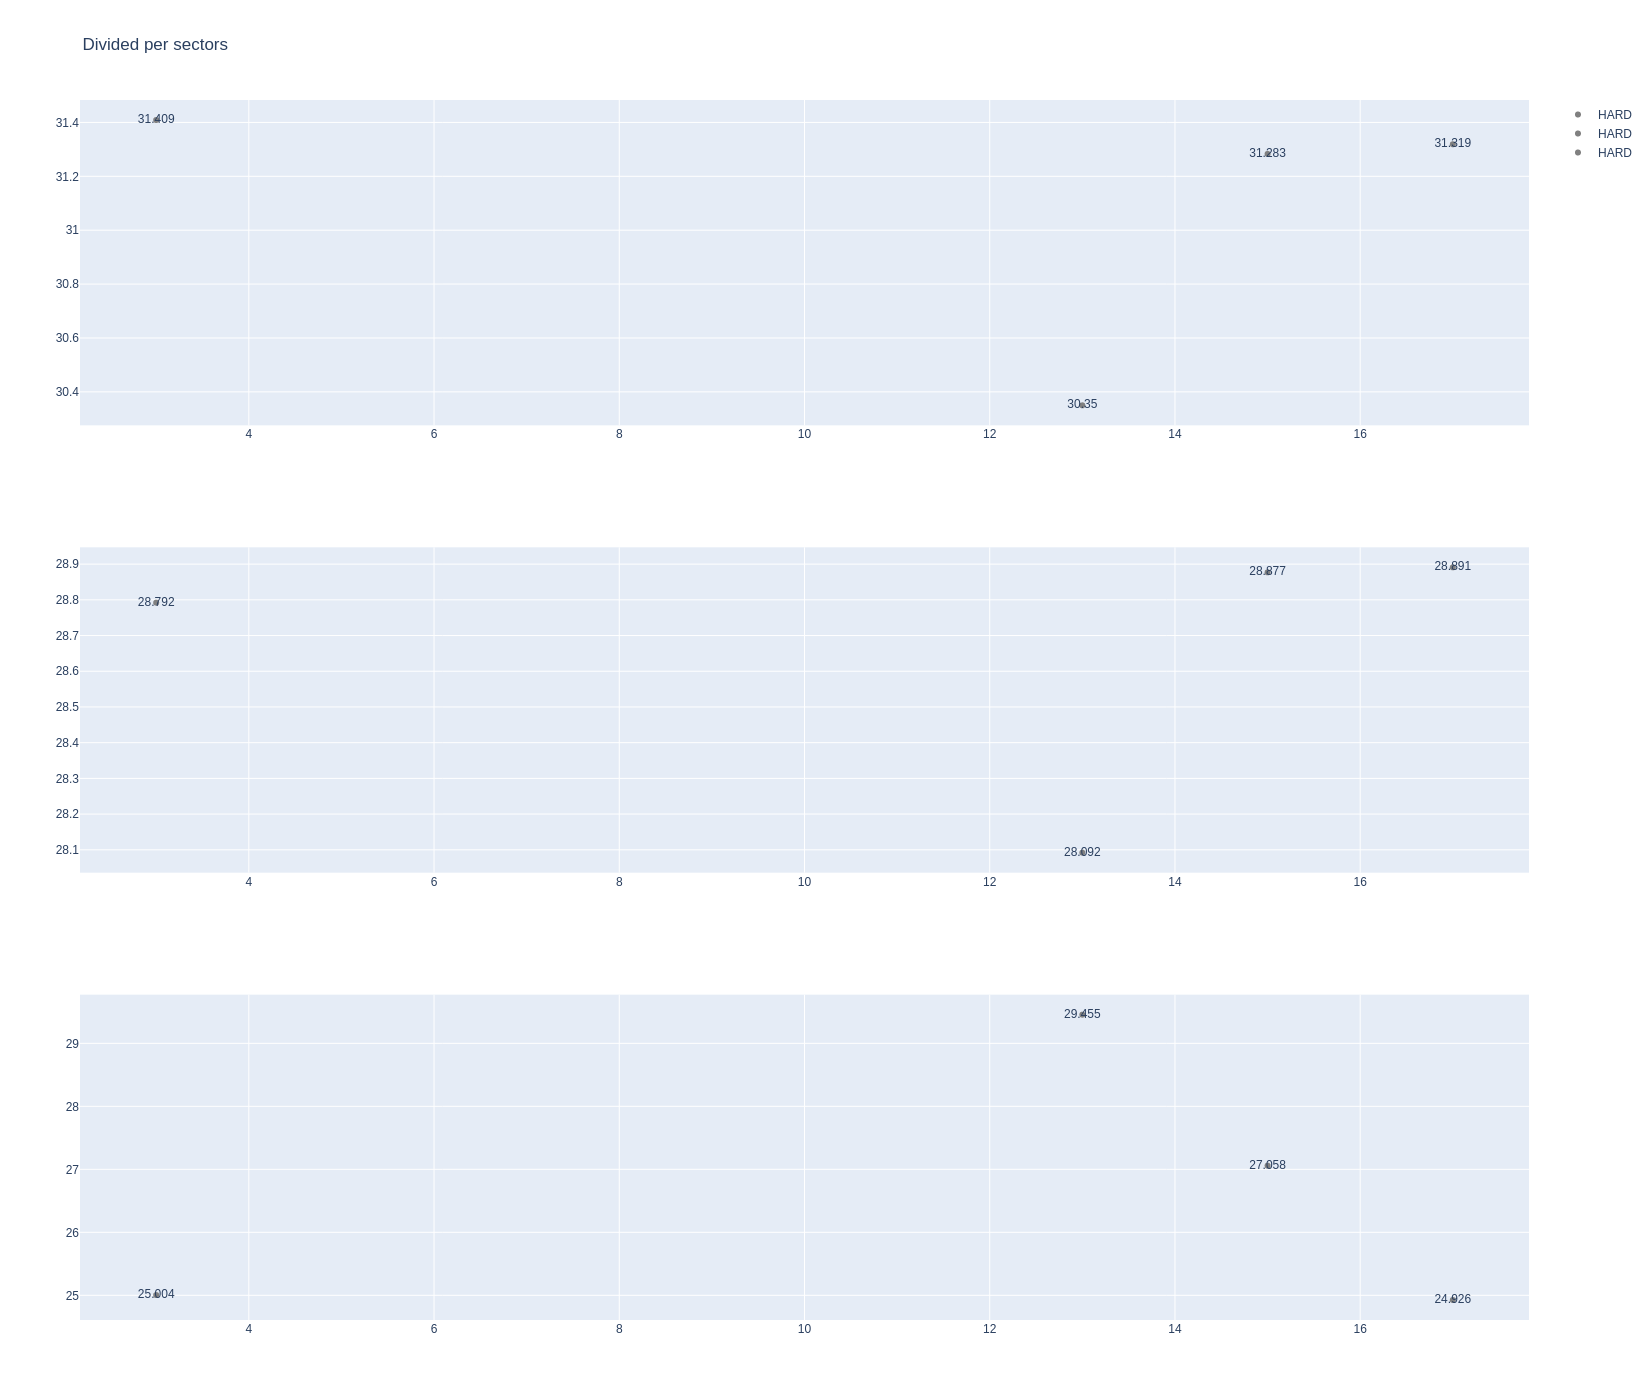

In [79]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [80]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
28   Carlos SAINZ     HARD  2025-11-28T13:32:54.168000+00:00           2   
208  Carlos SAINZ     HARD  2025-11-28T13:52:46.396000+00:00          13   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
28              31.625             29.291             27.046        87.962  
208             30.343             28.199             29.420        87.962

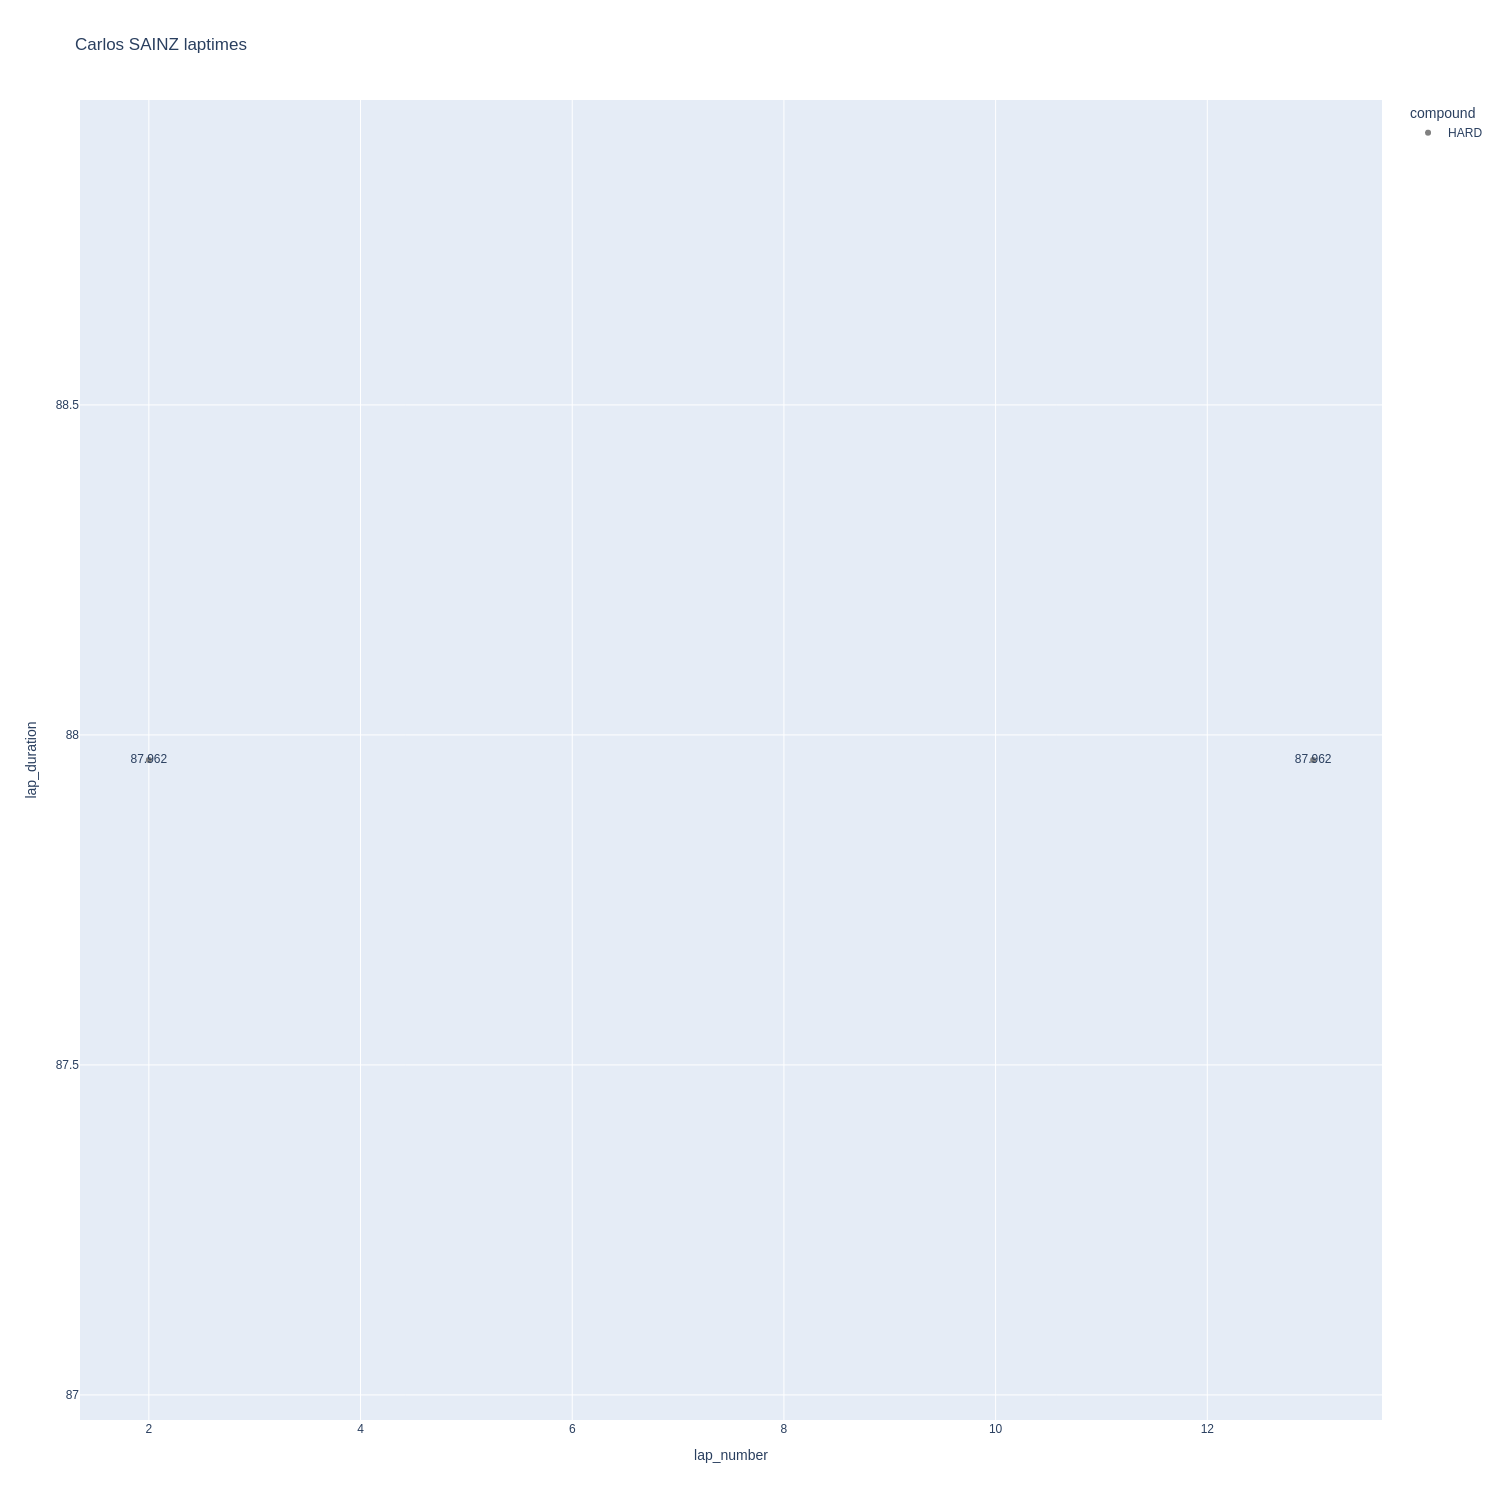

In [81]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

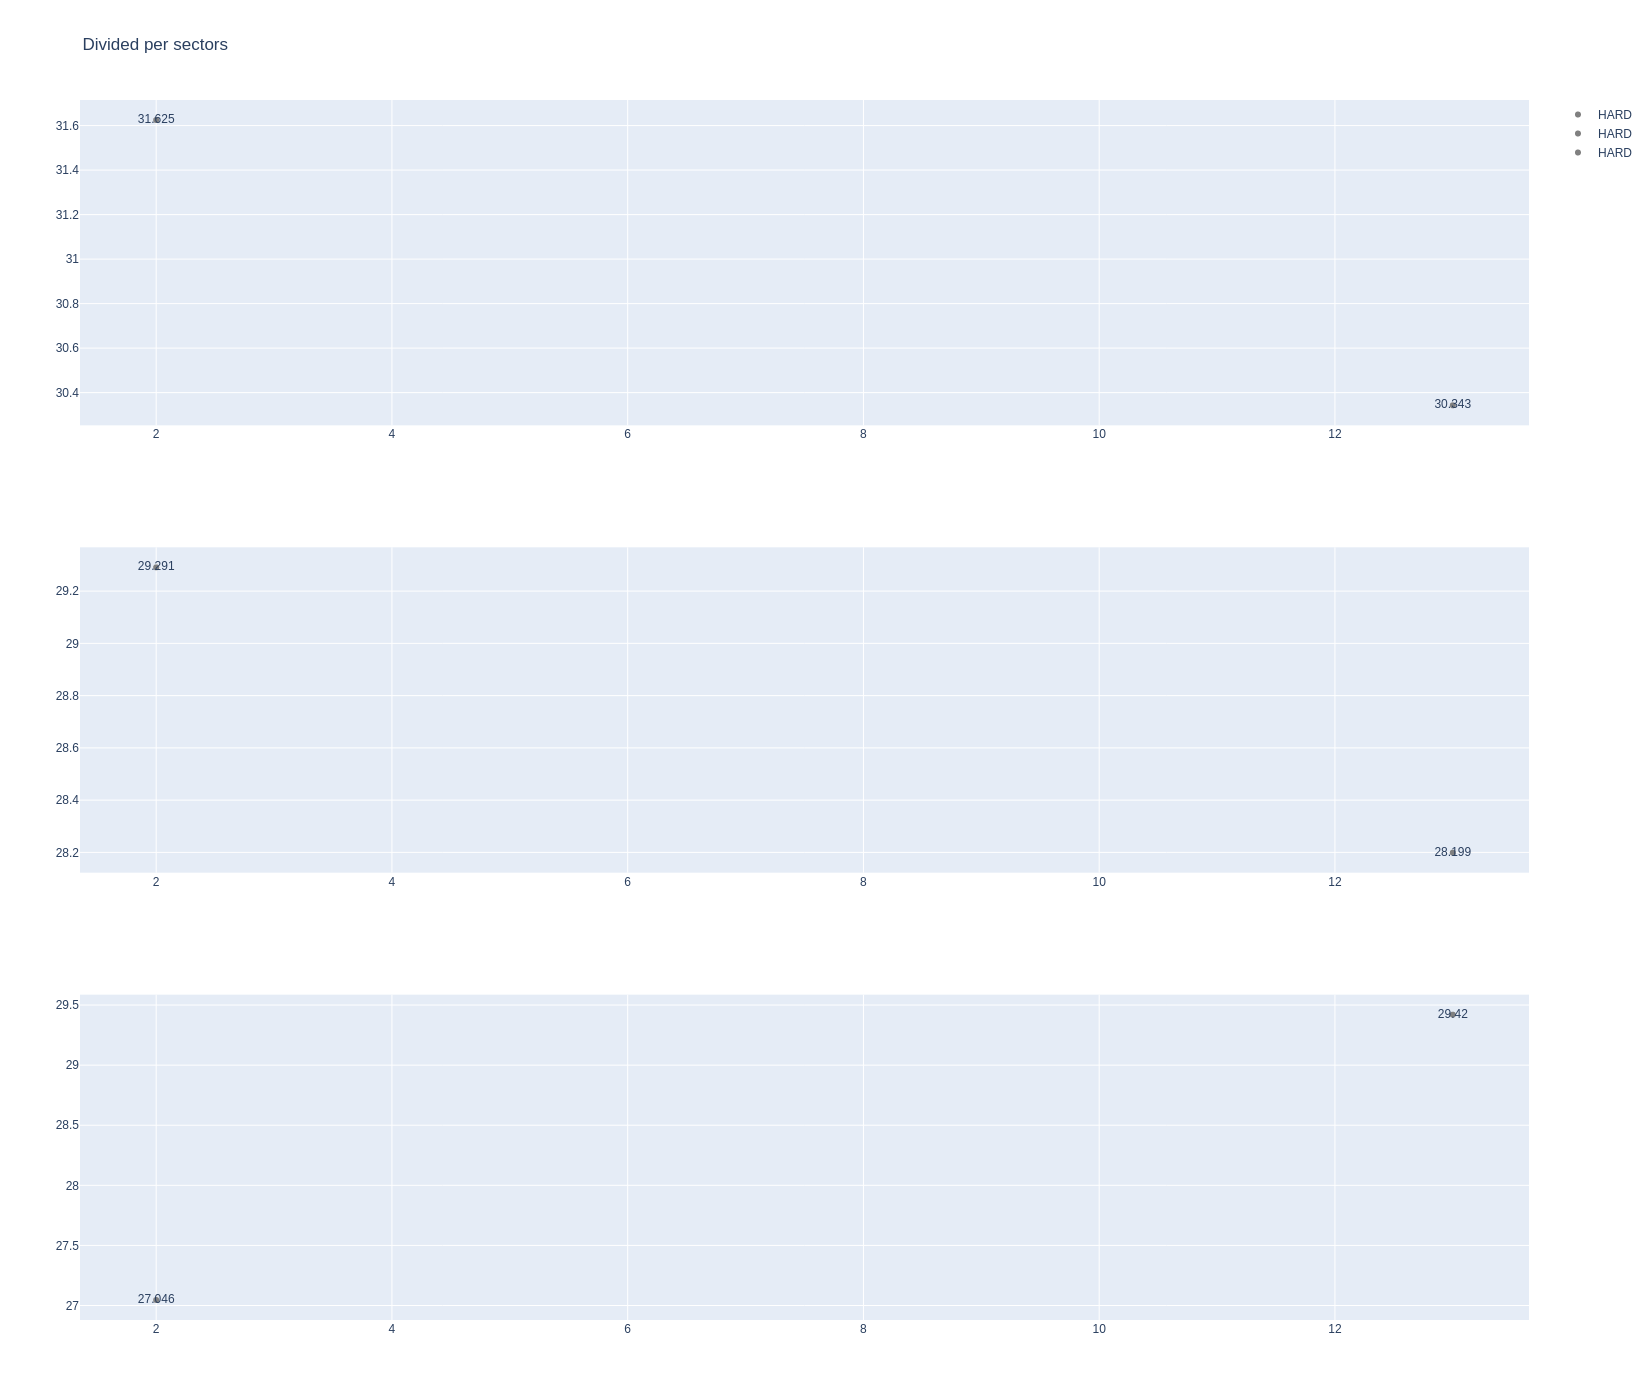

In [82]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [83]:
stintInformation.query('driver_number == 27 or driver_number == 5')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1275         9840             1              5          1        5   
12         1275         9840             1             27          1        8   
18         1275         9840             2              5          6       11   
29         1275         9840             2             27          9       15   
49         1275         9840             3             27         16       18   
51         1275         9840             3              5         12       22   
58         1275         9840             4              5         23       25   
59         1275         9840             4             27         19       23   
74         1275         9840             5              5         26       29   

   compound  tyre_age_at_start  
3      HARD                  0  
12     HARD                  0  
18     HARD                  0  
29     HARD                  8  
49     HARD                 15  
51     HARD                 11  
58     SOFT                  0  
59     SOFT                  0  
74     SOFT                  3

In [84]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
16   Nico HULKENBERG     HARD  2025-11-28T13:31:41.920000+00:00           2   
284  Nico HULKENBERG     HARD  2025-11-28T14:02:34.589000+00:00          14   
486  Nico HULKENBERG     SOFT  2025-11-28T14:26:40.489000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
16              31.975             29.132             25.416        86.523  
284             31.431             28.591             25.037        85.059  
486             29.785             27.686             28.336        85.807

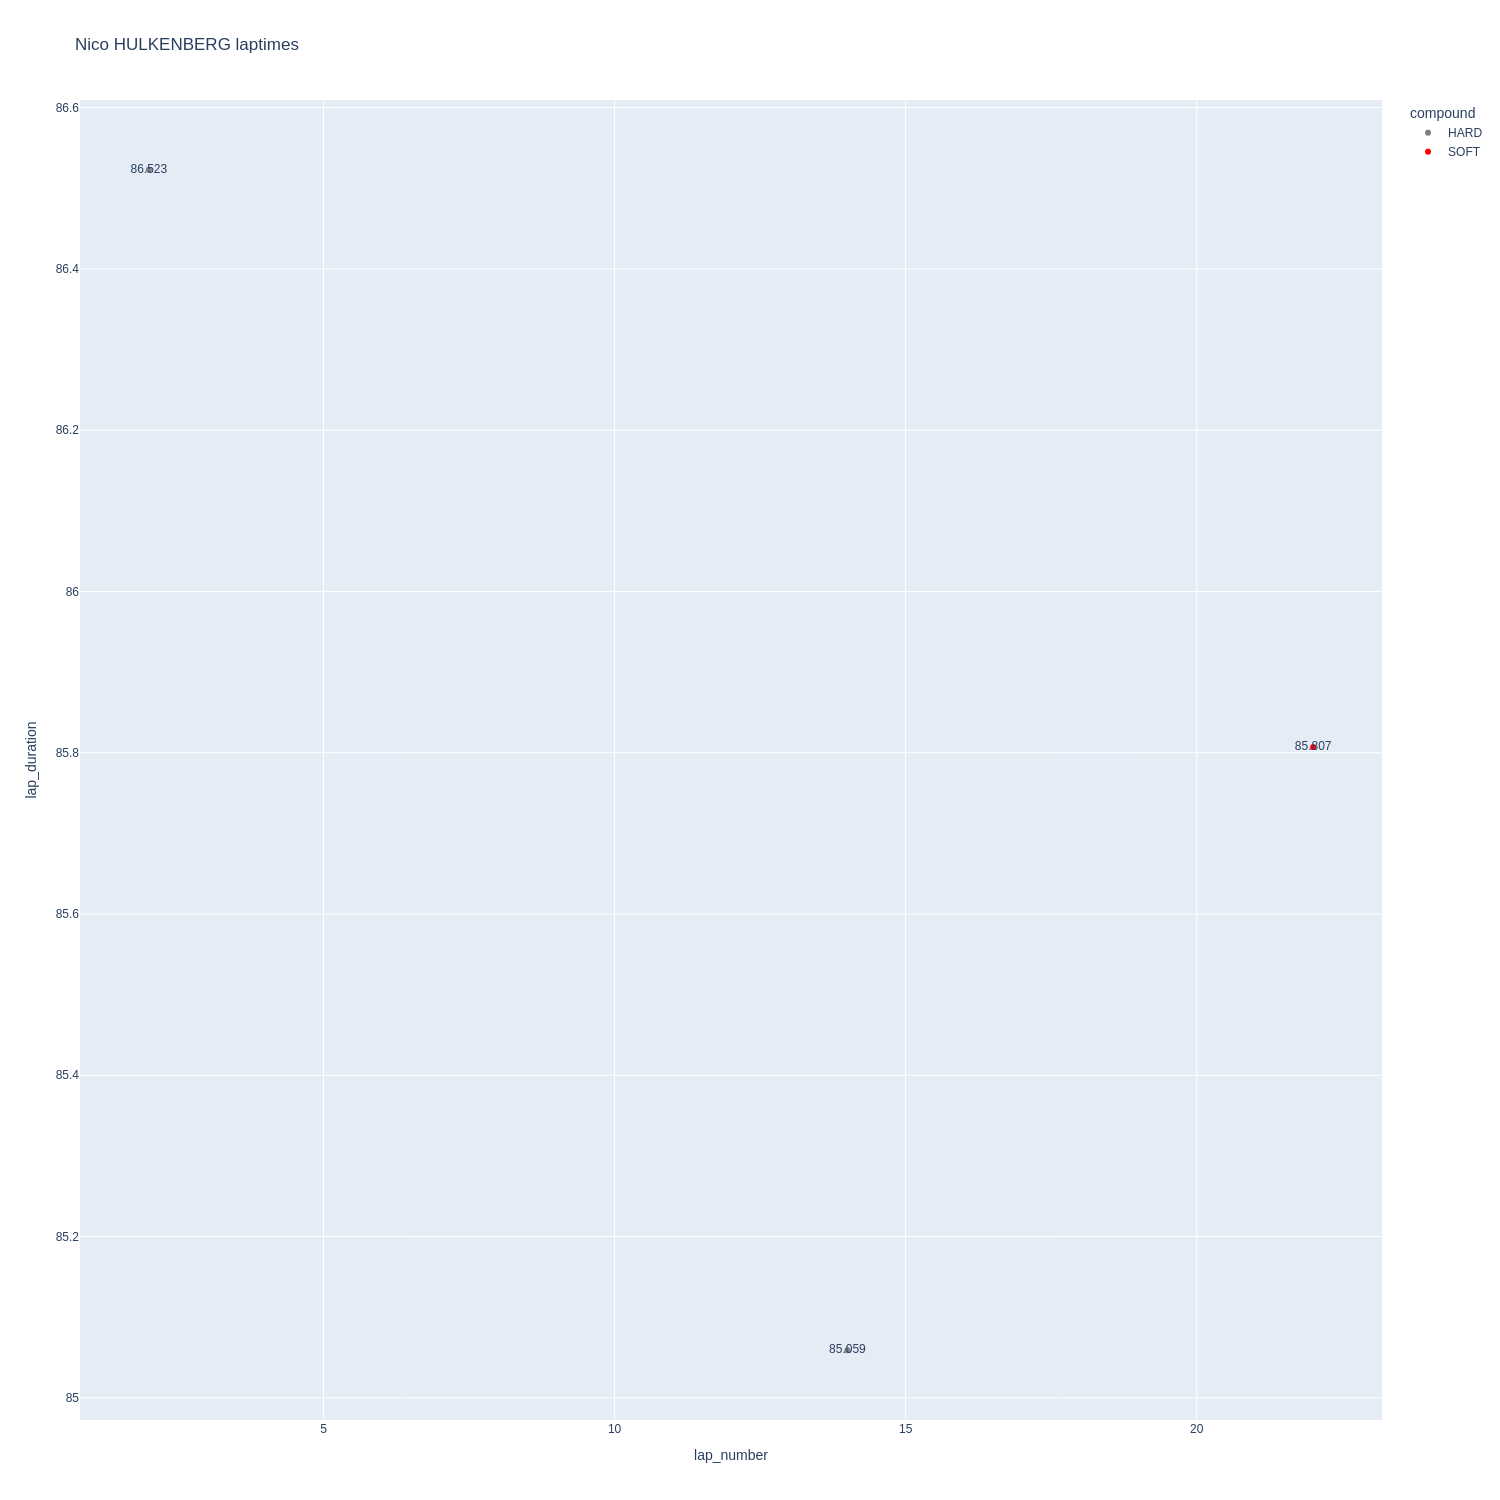

In [85]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

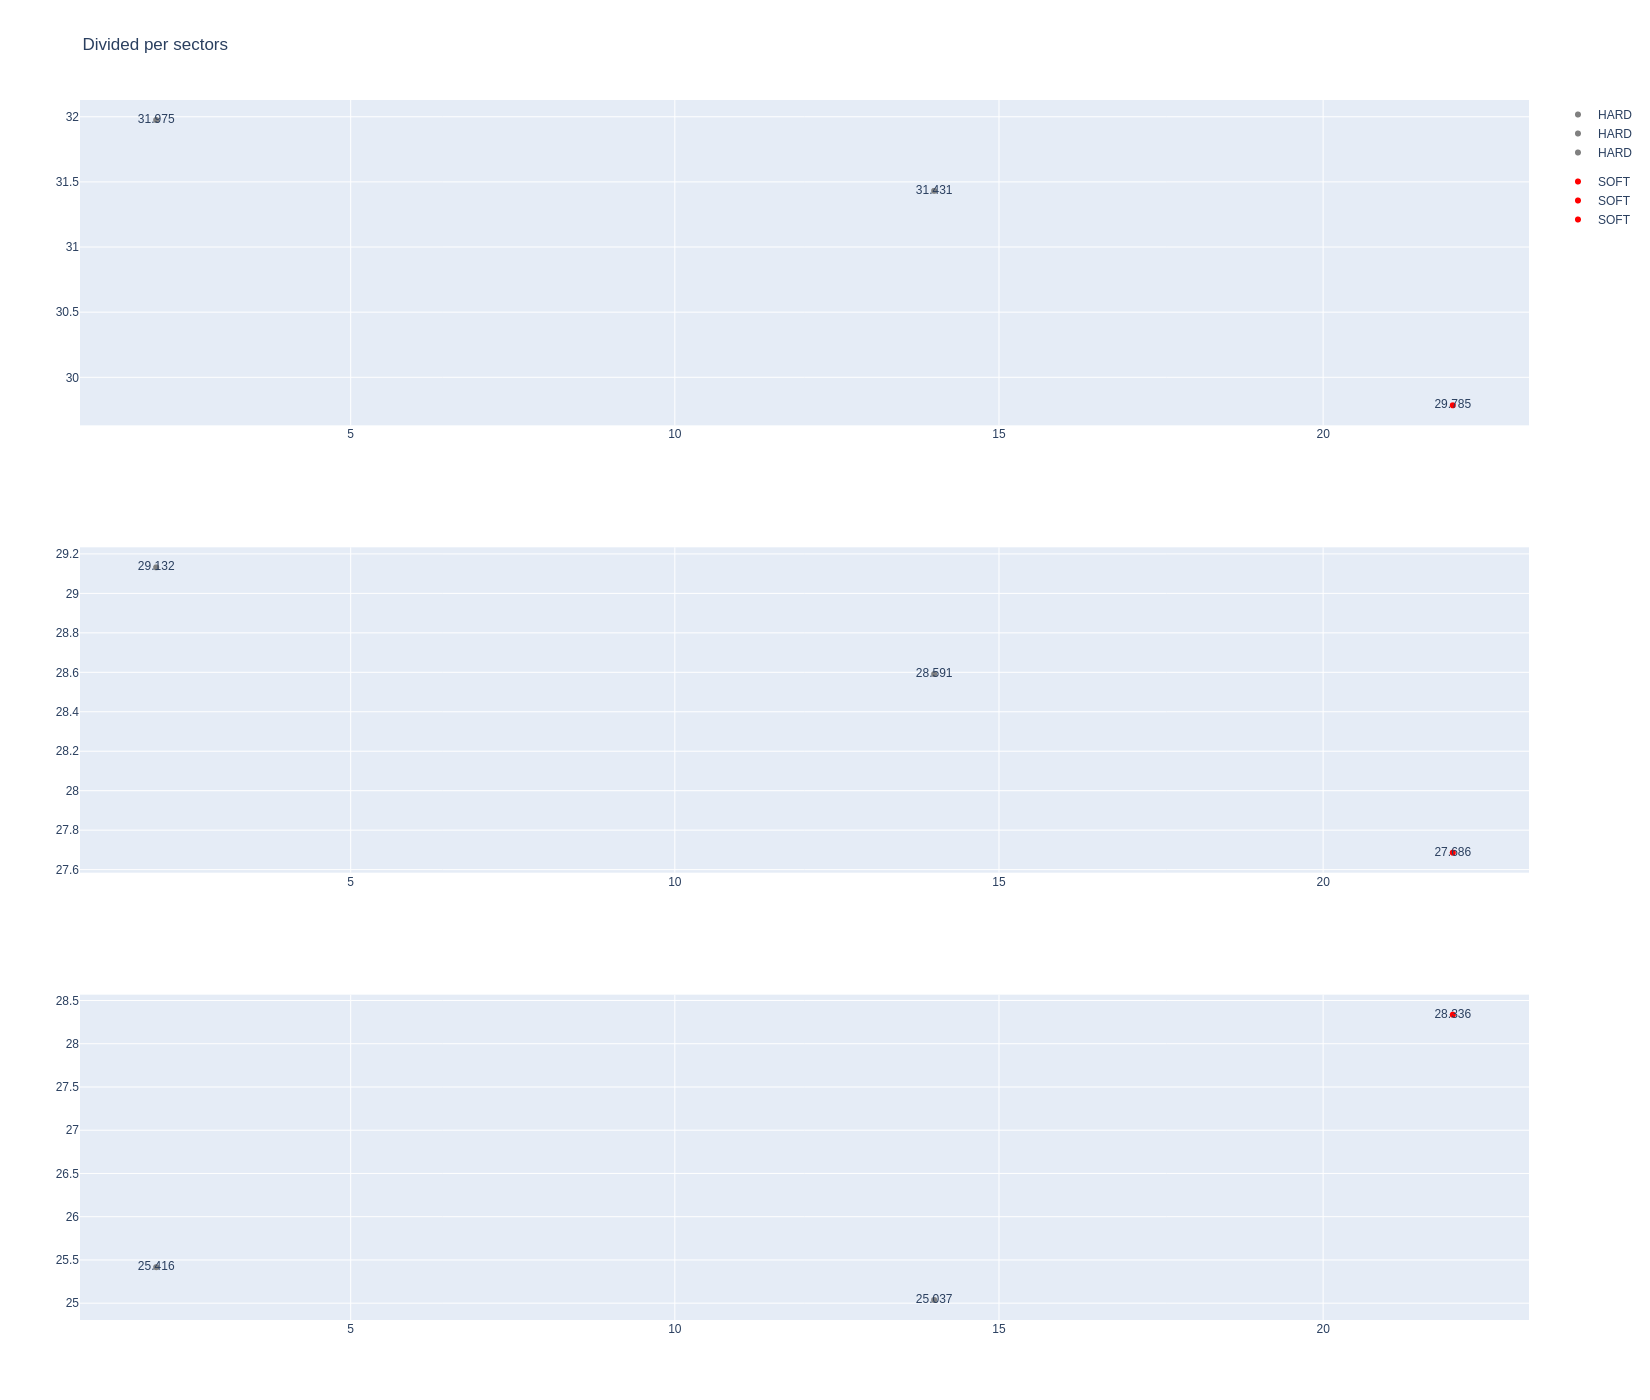

In [86]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [87]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
59   Gabriel BORTOLETO     HARD  2025-11-28T13:35:11.490000+00:00           3   
330  Gabriel BORTOLETO     HARD  2025-11-28T14:06:27.450000+00:00          17   
346  Gabriel BORTOLETO     HARD  2025-11-28T14:07:53.841000+00:00          18   
360  Gabriel BORTOLETO     HARD  2025-11-28T14:09:19.790000+00:00          19   
371  Gabriel BORTOLETO     HARD  2025-11-28T14:10:46.306000+00:00          20   
380  Gabriel BORTOLETO     HARD  2025-11-28T14:12:10.865000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
59              31.561             29.073             25.649        86.283  
330             31.681             29.200             25.560        86.441  
346             31.638             28.962             25.399        85.999  
360             31.564             28.842             25.253        85.659  
371             31.490             28.760             25.079        85.329  
380             31.326             28.864             25.087        85.277

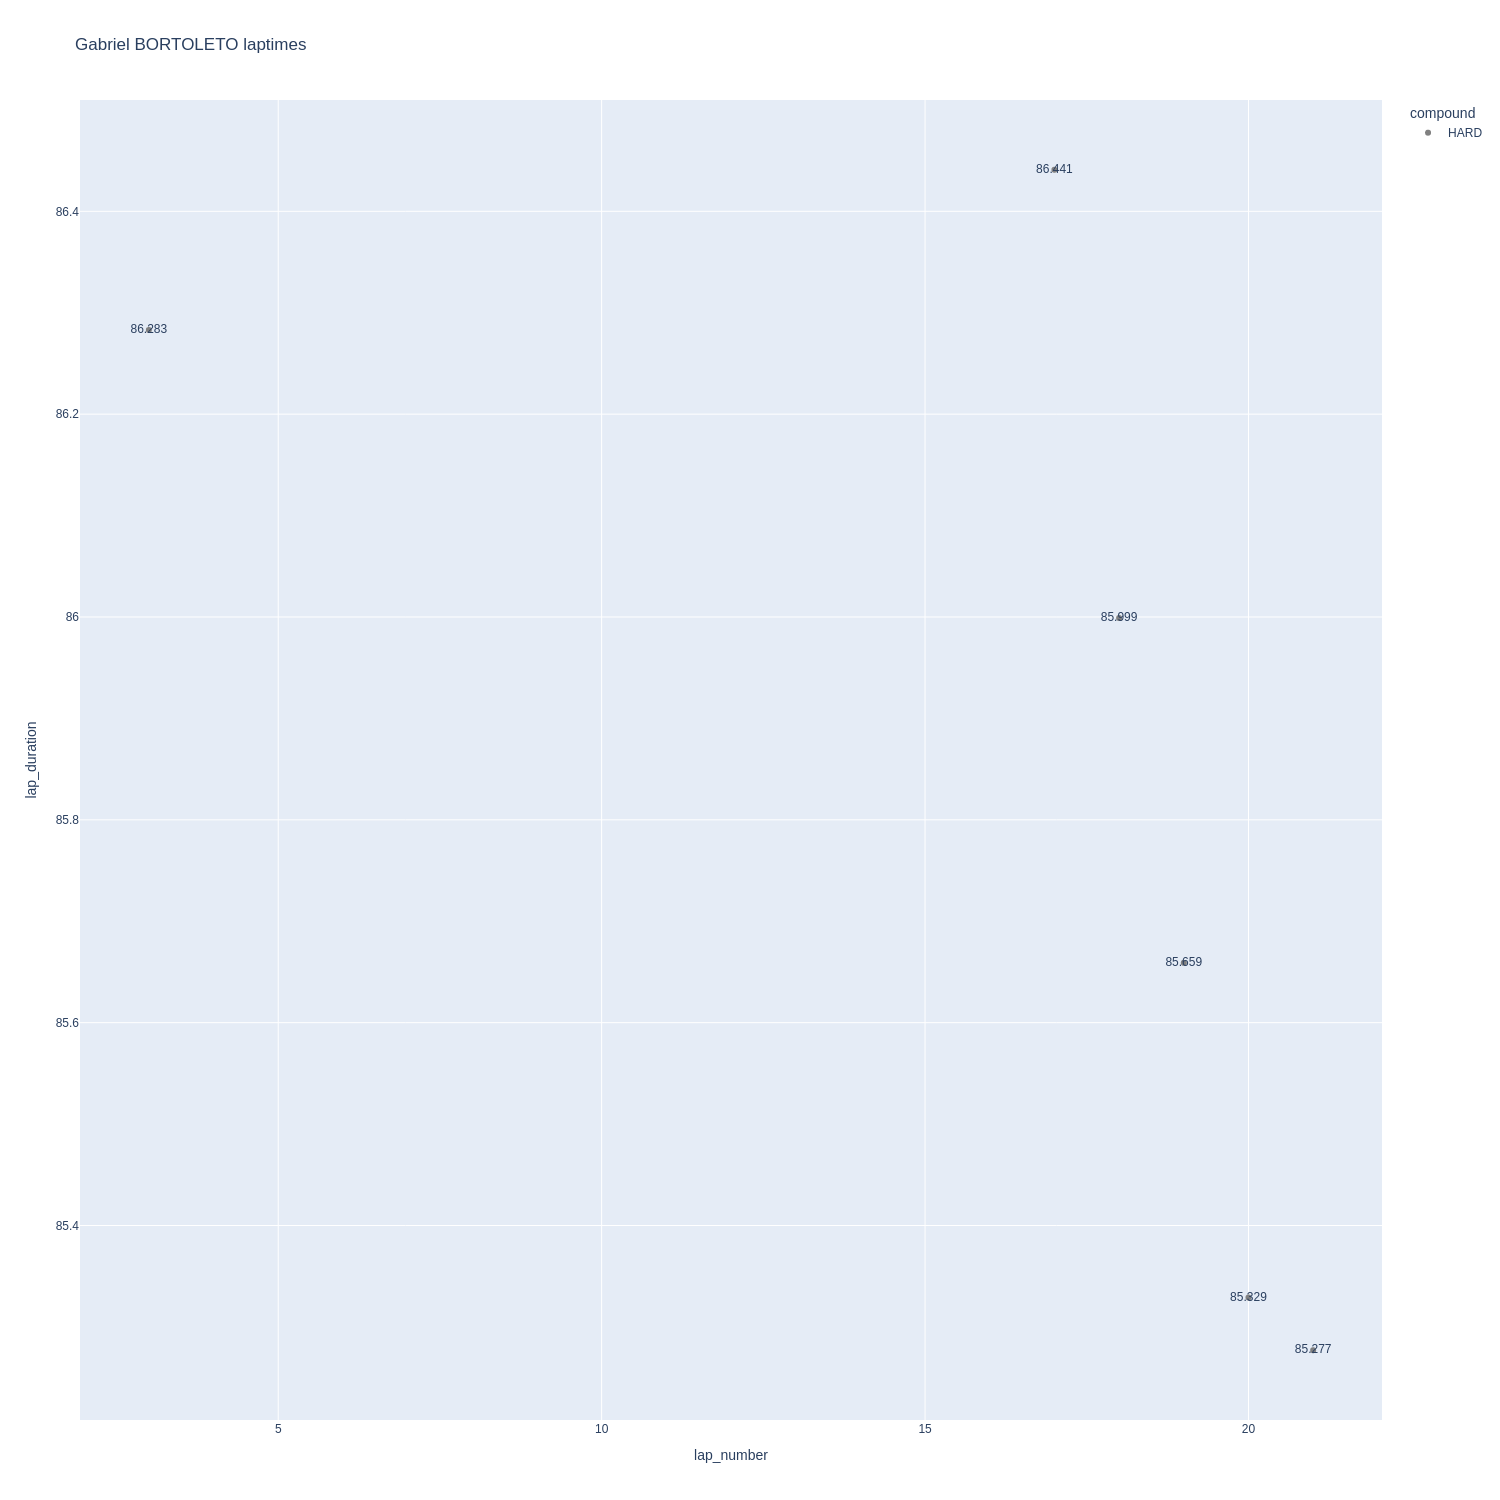

In [88]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

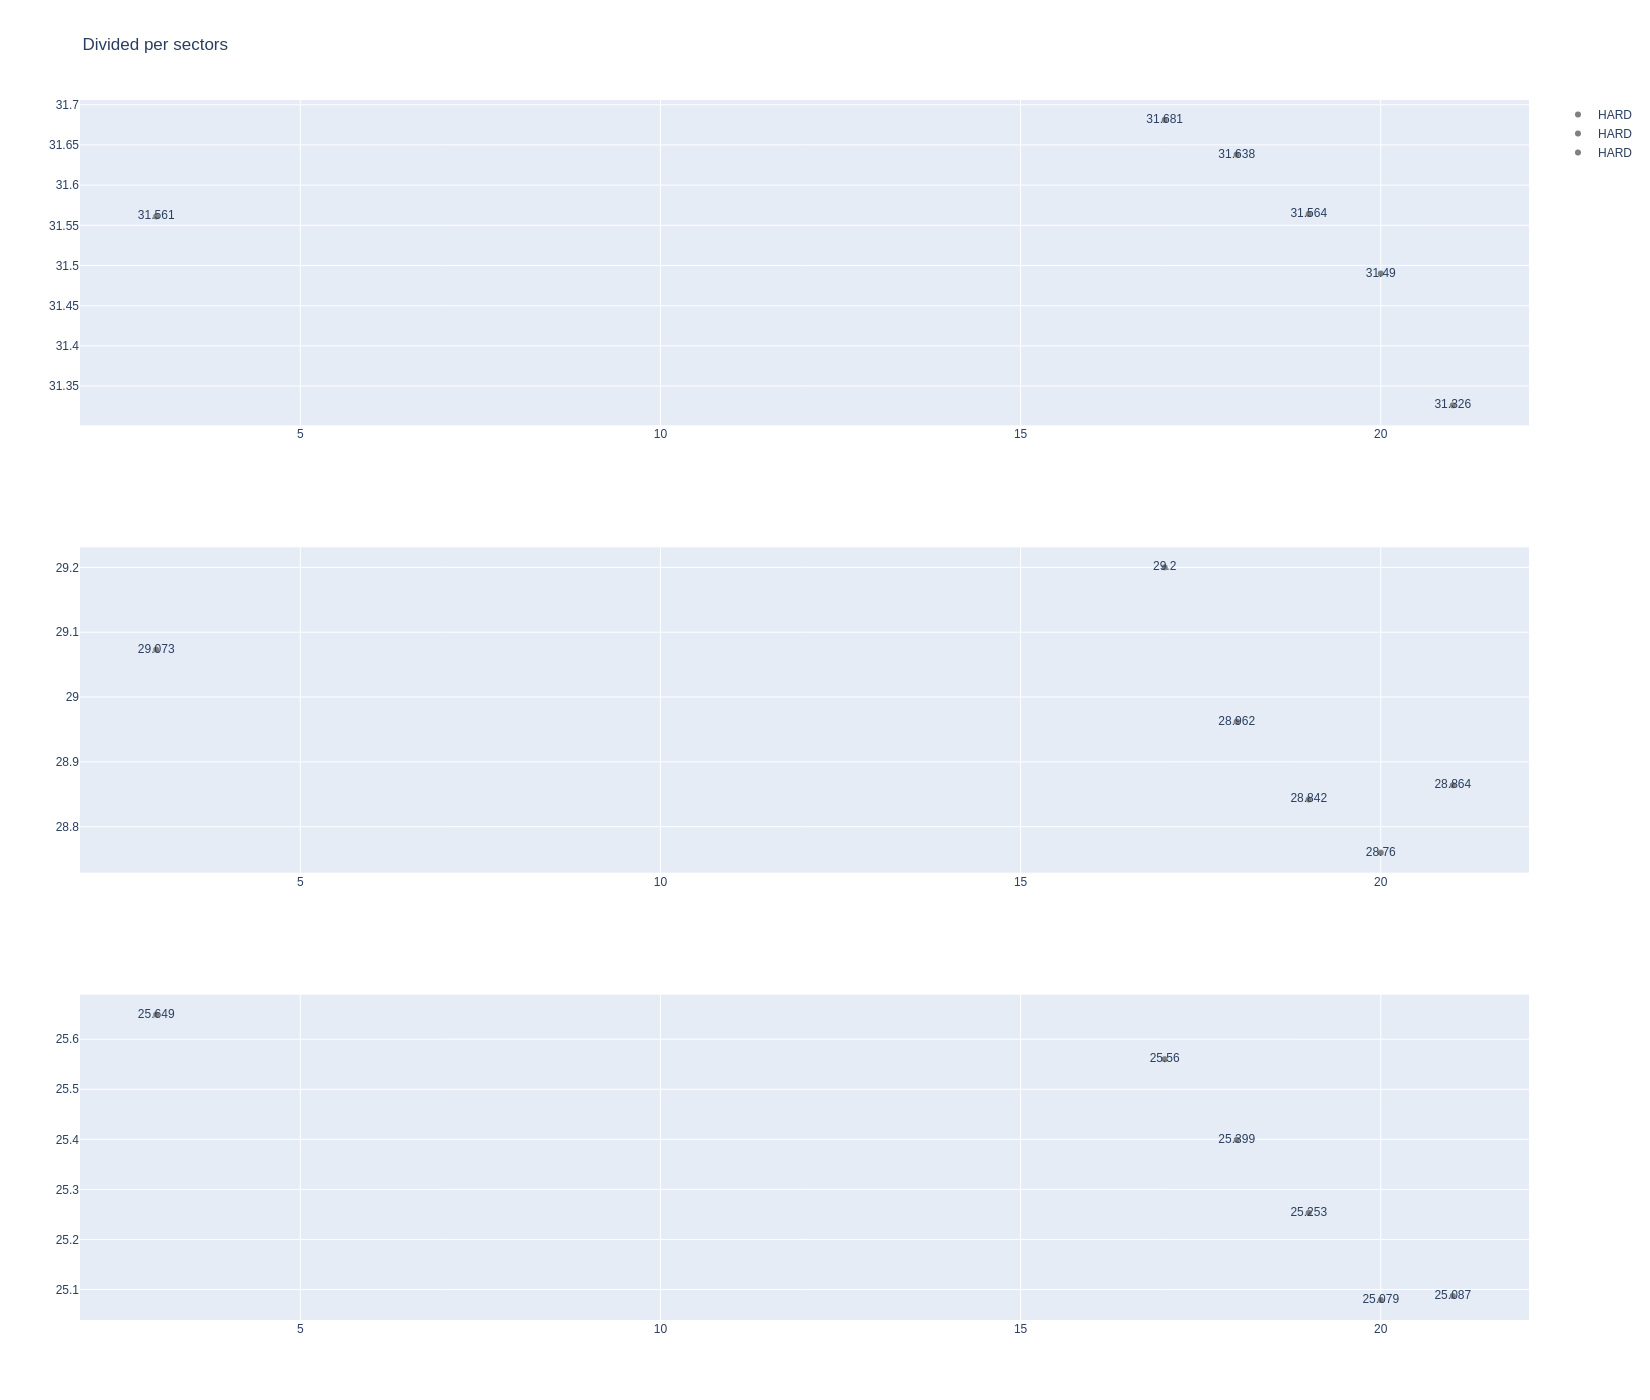

In [89]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [90]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [91]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [92]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
18      Oscar PIASTRI     HARD     85.162667  31.150333  29.234333  24.778000
4        Pierre GASLY     HARD     85.224667  31.471000  29.030667  24.723000
8        Lance STROLL     HARD     85.384500  31.516000  29.017000  24.851500
6     Fernando ALONSO     HARD     85.386250  31.477000  29.019250  24.890000
1        Lando NORRIS     HARD     85.432000  31.418000  29.132333  24.881667
17     George RUSSELL     HARD     85.530667  31.438333  29.285778  24.806556
7     Charles LECLERC     HARD     85.594000  30.310500  28.940000  26.343500
0      Max VERSTAPPEN     HARD     85.618778  31.458111  29.242111  24.918556
13       Esteban OCON     HARD     85.729900  31.578700  29.064600  25.086600
5      Kimi ANTONELLI     HARD     85.754000  31.464000  29.244400  25.045600
11    Nico HULKENBERG     HARD     85.796333  31.063667  28.469667  26.263000
2   Gabriel BORTOLETO     HARD     85.831333  31.543333  28.950167  25.337833
19     Oliver BEARMAN     HARD     85.887286  31.589714  29.218286  25.079286
12        Liam LAWSON     HARD     85.896700  31.684500  29.245600  24.966600
9        Yuki TSUNODA     HARD     86.167444  31.679556  29.327444  25.160444
14   Franco COLAPINTO     HARD     86.172000  31.694600  29.249000  25.228400
3        Isack HADJAR     HARD     86.191333  31.713333  29.153333  25.324667
10    Alexander ALBON     HARD     86.364000  31.090250  28.663000  26.610750
15     Lewis HAMILTON     HARD     86.416000  31.968000  29.164000  25.284000
16       Carlos SAINZ     HARD     87.962000  30.984000  28.745000  28.233000

##### Sorted by sector 1

In [93]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
7     Charles LECLERC     HARD  30.310500
16       Carlos SAINZ     HARD  30.984000
11    Nico HULKENBERG     HARD  31.063667
10    Alexander ALBON     HARD  31.090250
18      Oscar PIASTRI     HARD  31.150333
1        Lando NORRIS     HARD  31.418000
17     George RUSSELL     HARD  31.438333
0      Max VERSTAPPEN     HARD  31.458111
5      Kimi ANTONELLI     HARD  31.464000
4        Pierre GASLY     HARD  31.471000
6     Fernando ALONSO     HARD  31.477000
8        Lance STROLL     HARD  31.516000
2   Gabriel BORTOLETO     HARD  31.543333
13       Esteban OCON     HARD  31.578700
19     Oliver BEARMAN     HARD  31.589714
9        Yuki TSUNODA     HARD  31.679556
12        Liam LAWSON     HARD  31.684500
14   Franco COLAPINTO     HARD  31.694600
3        Isack HADJAR     HARD  31.713333
15     Lewis HAMILTON     HARD  31.968000

##### Sorted by sector 2

In [94]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
11    Nico HULKENBERG     HARD  28.469667
10    Alexander ALBON     HARD  28.663000
16       Carlos SAINZ     HARD  28.745000
7     Charles LECLERC     HARD  28.940000
2   Gabriel BORTOLETO     HARD  28.950167
8        Lance STROLL     HARD  29.017000
6     Fernando ALONSO     HARD  29.019250
4        Pierre GASLY     HARD  29.030667
13       Esteban OCON     HARD  29.064600
1        Lando NORRIS     HARD  29.132333
3        Isack HADJAR     HARD  29.153333
15     Lewis HAMILTON     HARD  29.164000
19     Oliver BEARMAN     HARD  29.218286
18      Oscar PIASTRI     HARD  29.234333
0      Max VERSTAPPEN     HARD  29.242111
5      Kimi ANTONELLI     HARD  29.244400
12        Liam LAWSON     HARD  29.245600
14   Franco COLAPINTO     HARD  29.249000
17     George RUSSELL     HARD  29.285778
9        Yuki TSUNODA     HARD  29.327444

##### Sorted by sector 3

In [95]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
4        Pierre GASLY     HARD  24.723000
18      Oscar PIASTRI     HARD  24.778000
17     George RUSSELL     HARD  24.806556
8        Lance STROLL     HARD  24.851500
1        Lando NORRIS     HARD  24.881667
6     Fernando ALONSO     HARD  24.890000
0      Max VERSTAPPEN     HARD  24.918556
12        Liam LAWSON     HARD  24.966600
5      Kimi ANTONELLI     HARD  25.045600
19     Oliver BEARMAN     HARD  25.079286
13       Esteban OCON     HARD  25.086600
9        Yuki TSUNODA     HARD  25.160444
14   Franco COLAPINTO     HARD  25.228400
15     Lewis HAMILTON     HARD  25.284000
3        Isack HADJAR     HARD  25.324667
2   Gabriel BORTOLETO     HARD  25.337833
11    Nico HULKENBERG     HARD  26.263000
7     Charles LECLERC     HARD  26.343500
10    Alexander ALBON     HARD  26.610750
16       Carlos SAINZ     HARD  28.233000

#### Long runs mean

In [96]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [97]:
#libraryDataF1.showDataLongRuns(longruns_summary,"INTERMEDIATE","mean_lap_time",['driver','mean_lap_time'])

In [98]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

Empty DataFrame
Columns: [driver, mean_lap_time]
Index: []

In [99]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

Empty DataFrame
Columns: [driver, mean_lap_time]
Index: []

In [100]:
libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
18     O PIASTRI         85.163
4        P GASLY         85.225
8       L STROLL         85.384
6       F ALONSO         85.386
1       L NORRIS         85.432
17     G RUSSELL         85.531
7      C LECLERC         85.594
0   M VERSTAPPEN         85.619
13        E OCON         85.730
5    K ANTONELLI         85.754
11  N HULKENBERG         85.791
2    G BORTOLETO         85.831
19     O BEARMAN         85.887
12      L LAWSON         85.897
9      Y TSUNODA         86.167
14   F COLAPINTO         86.172
3       I HADJAR         86.191
10       A ALBON         86.364
15    L HAMILTON         86.416
16       C SAINZ         87.962

## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9650)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9650)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9650)
drivers = libraryDataF1.obtain_information('drivers',session_key=9650)
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==30,'team_colour'] = '6692FF'
drivers.loc[drivers['driver_number']==43,'team_colour'] = '64C4FF'
libraryDataF1.obtain_drivers_colours(drivers)

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted ,within the 107%, were deleted from dataset in order to obtain only the valid laps for the analysis.

In [ ]:
laptimes_deleted = [84.293,82.901,82.050,81.238,82.082]
driver_number_lap_deleted = [30,20,81,81,30]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

The fastest lap is 81.012 seconds (1.21.012= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (86.68 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 86.68")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In [ ]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2024-11-29T17:49:00+00:00'"
maximumDateQ2 = "date_start <'2024-11-29T18:06:00+00:00' and date_start >='2024-11-29T17:49:00+00:00'"
maximumDateQ3 = "date_start >'2024-11-29T18:06:00+00:00'"

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Sprint Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 =  libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

### Best sector in the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

## Predictions

In [ ]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9650)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9650)
drivers = libraryDataF1.obtain_information('drivers',session_key=9650)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
# practice = libraryDataF1.obtain_information('laps',session_key=9600)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9600)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9600)


# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 3
# practice = libraryDataF1.obtain_information('laps',session_key=9591)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9591)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9591)

# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [ ]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice1],drivers,0.05,0.07,0.08)
qualy_simulation.sort_values(by='qualy_lap_time')

### Race prediction

In [ ]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice1,drivers,83,89)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

## Sprint

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9654)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9654)
drivers = libraryDataF1.obtain_information('drivers',session_key=9654)
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==30,'team_colour'] = '6692FF'
drivers.loc[drivers['driver_number']==43,'team_colour'] = '64C4FF'

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Top speed captured in the speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=89").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=89").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=89").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=89").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

##### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

##### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

##### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 84
MAXIMUM_SECONDS = 89

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 43 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9646)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9646)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9646)
drivers = libraryDataF1.obtain_information('drivers',session_key=9646)

In [ ]:
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==30,'team_colour'] = '6692FF'
drivers.loc[drivers['driver_number']==43,'team_colour'] = '64C4FF'
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 23, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In [ ]:
laptimes_deleted = [83.505,83.525,82.873,81.437,81.320]
driver_number_lap_deleted = [20,43,23,4,14]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

In this case, the fastest lap is 80.52 seconds (1.20.52= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 86.15 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 86.15")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-11-30T18:25:00+00:00'"
maximumDateQ2 = "date_start <'2024-11-30T18:48:00+00:00' and date_start >'2024-11-30T18:25:00+00:00'"
maximumDateQ3 = "date_start >'2024-11-30T18:48:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 



In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:

#libraryDataF1.draw_gap(P10,11,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9655)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9655)
drivers = libraryDataF1.obtain_information('drivers',session_key=9655)
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==30,'team_colour'] = '6692FF'
drivers.loc[drivers['driver_number']==43,'team_colour'] = '64C4FF'
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax().dropna()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax().dropna()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <=89").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <=89").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <=89").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <=89").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >82 and lap_duration <=89").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 82
MAXIMUM_SECONDS = 89

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 43 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9655)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration